In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#Preparacion de los datos

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/Shared drives/Equipo Turquesa/Experimentacion/airbike-ny-2019.csv')
data.head()

Unnamed: 0  hour  ...            starttime        o3
0           0     0  ...  2019-01-03 00:00:00  0.014000
1           1     0  ...  2019-01-26 00:00:00  0.027000
2           2     0  ...  2019-01-01 00:00:00  0.014800
3           3     0  ...  2019-01-27 00:00:00  0.013000
4           4     0  ...  2019-01-01 00:00:00  0.017625

[5 rows x 8 columns]

In [ ]:
data = data[['hour', 'startstationid', 'trips', 'tripdistance',
       'tripduration', 'starttime', 'o3']]

In [ ]:
data.describe()

hour  startstationid  ...  tripduration            o3
count  33877.000000    33877.000000  ...  3.387700e+04  33877.000000
mean      12.023408     3388.310830  ...  6.038013e+04      0.024340
std        6.723703      164.317686  ...  1.427153e+05      0.012621
min        0.000000     3131.000000  ...  6.800000e+01      0.000000
25%        7.000000     3286.000000  ...  5.051000e+03      0.015387
50%       12.000000     3372.000000  ...  1.984500e+04      0.021429
75%       18.000000     3521.000000  ...  6.218800e+04      0.030568
max       23.000000     3881.000000  ...  4.154054e+06      0.083091

[8 rows x 6 columns]

In [ ]:
features = data[['trips', 'tripdistance', 'tripduration','hour']]
label = data[['o3']]

In [ ]:
data.groupby('startstationid').size()

startstationid
3131    194
3135    203
3137    199
3139    192
3140    213
       ... 
3747    118
3805     68
3810    110
3811     77
3881     55
Length: 178, dtype: int64

In [ ]:
features.head()

trips  tripdistance  tripduration  hour
0      4        4.0282           663     0
1      1        0.8481           130     0
2      5       13.6826          3465     0
3      1        0.5601           187     0
4      8       16.5086          7130     0

In [ ]:
label.head()

o3
0  0.014000
1  0.027000
2  0.014800
3  0.013000
4  0.017625

In [ ]:
scaler = MinMaxScaler()
features[features.columns] = scaler.fit_transform(features[features.columns])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [ ]:
features.head()

trips  tripdistance  tripduration  hour
0  0.003759      0.001603      0.000143   0.0
1  0.000000      0.000338      0.000015   0.0
2  0.005013      0.005446      0.000818   0.0
3  0.000000      0.000223      0.000029   0.0
4  0.008772      0.006571      0.001700   0.0

In [ ]:
data_set = features
data_set['label'] = label
data_set.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


trips  tripdistance  tripduration  hour     label
0  0.003759      0.001603      0.000143   0.0  0.014000
1  0.000000      0.000338      0.000015   0.0  0.027000
2  0.005013      0.005446      0.000818   0.0  0.014800
3  0.000000      0.000223      0.000029   0.0  0.013000
4  0.008772      0.006571      0.001700   0.0  0.017625

#Todas las estaciones

In [ ]:
train, test = train_test_split(data_set, test_size=0.2)
test.sort_values(by='trips', ascending=True, inplace=True)
test.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


trips  tripdistance  tripduration      hour  label
30455    0.0      0.000502      0.000062  0.086957  0.017
6519     0.0      0.001568      0.000295  0.956522  0.015
6112     0.0      0.000892      0.000118  0.826087  0.013
4006     0.0      0.000257      0.000567  0.217391  0.002
29915    0.0      0.000293      0.000012  1.000000  0.025

----------------------------------------------------LinearRegression----------------------------------------------------
Coefficients: 
 [ 0.04378472 -0.027461    0.03303922  0.00608786]
Mean squared error: 0.00015
Coefficient of determination: 0.08589


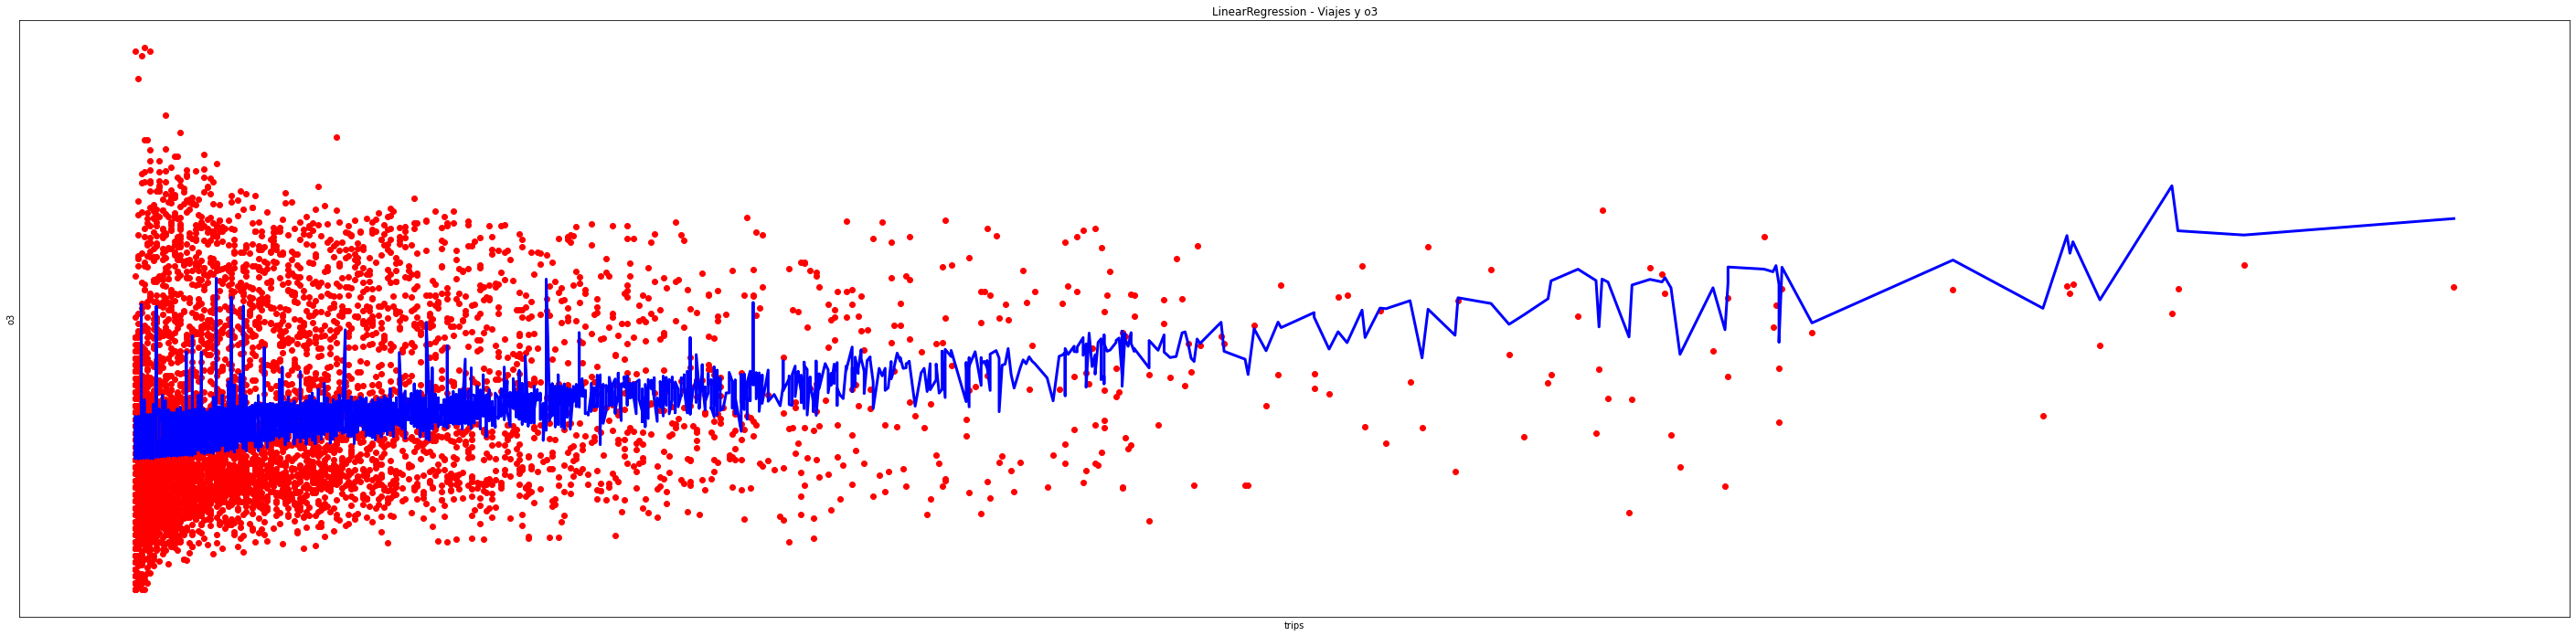

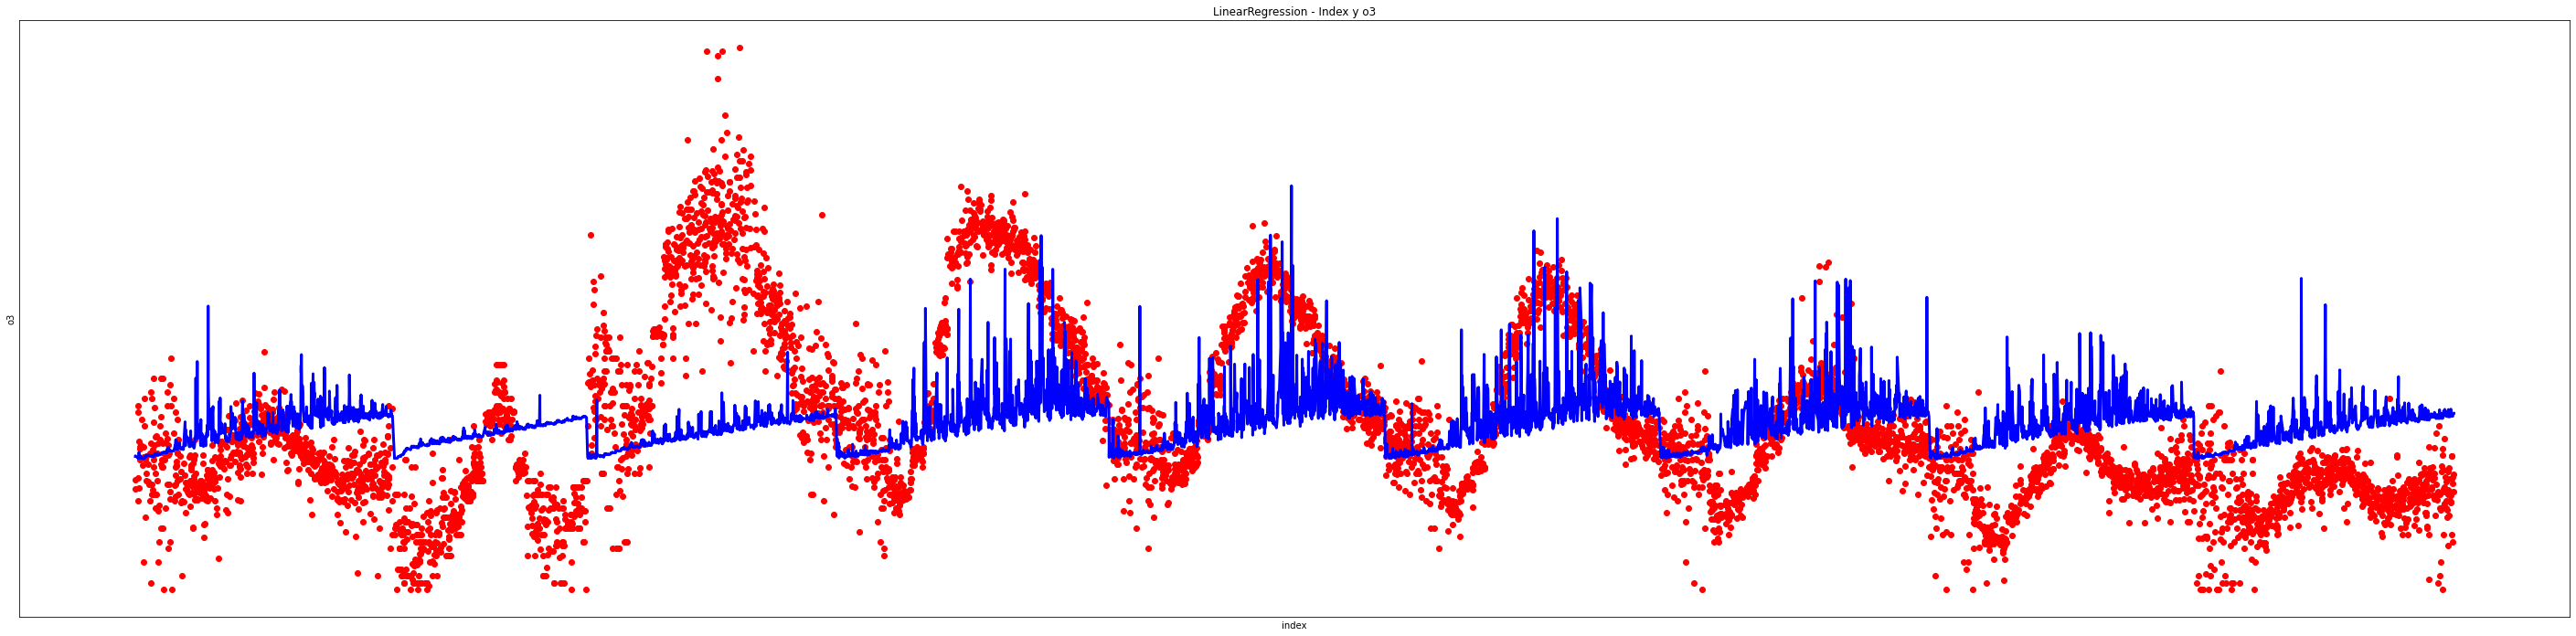

----------------------------------------------------DecisionTreeRegressor----------------------------------------------------
Mean squared error: 0.00019
Coefficient of determination: -0.20261


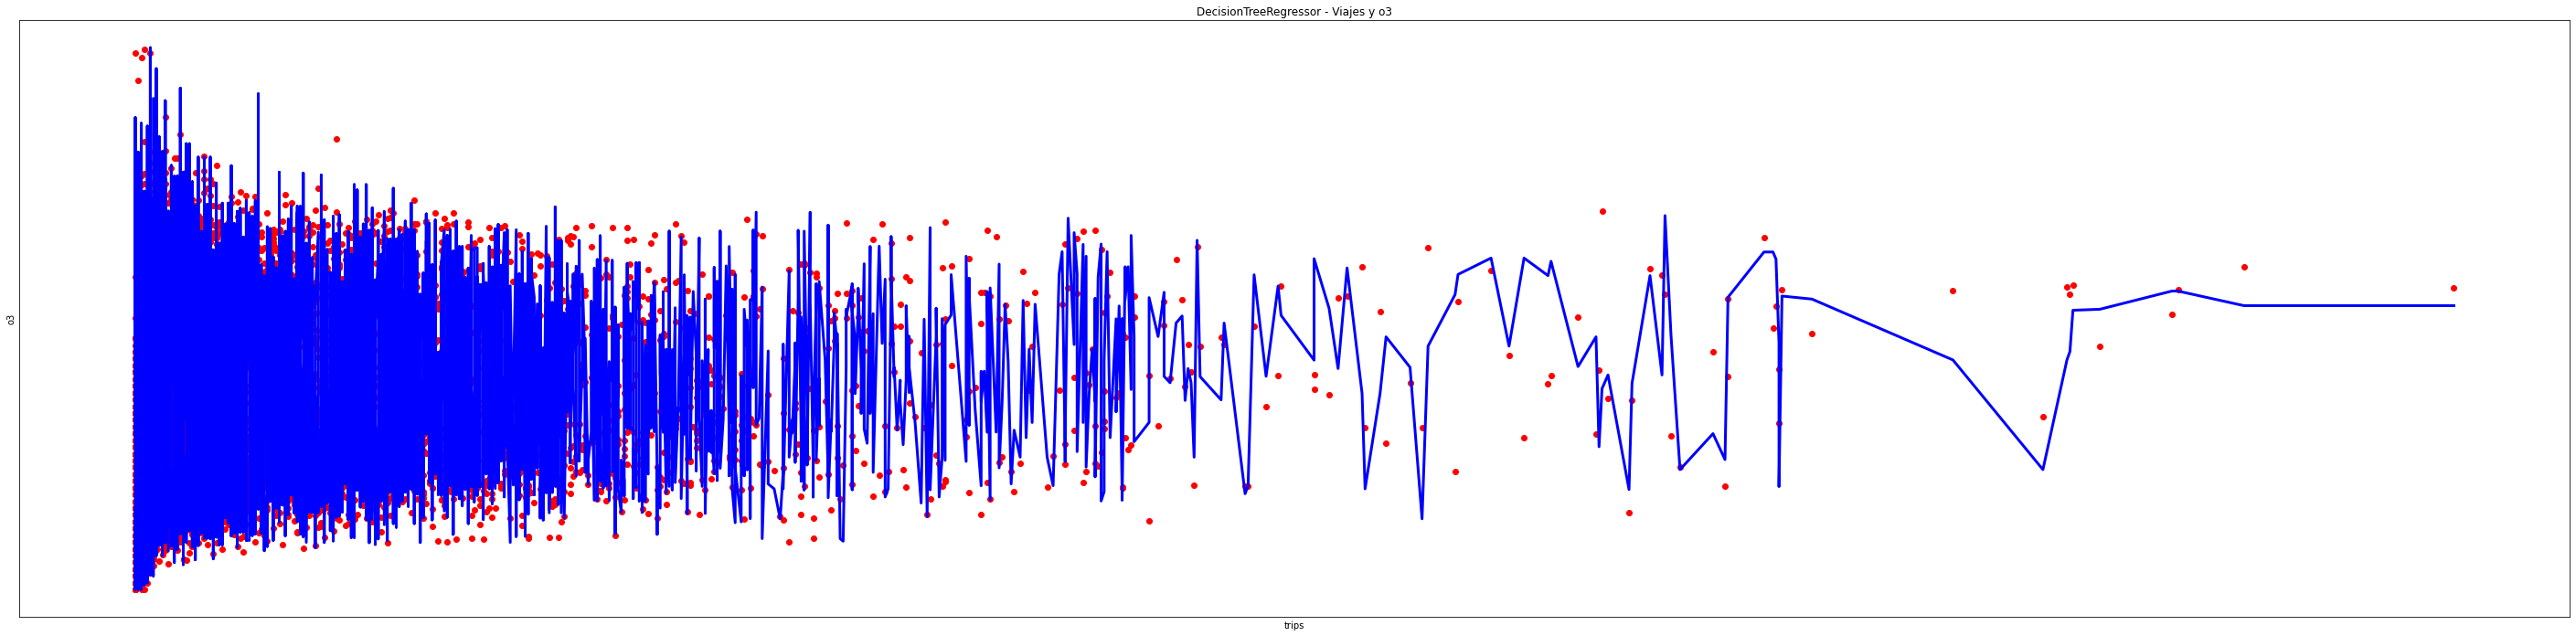

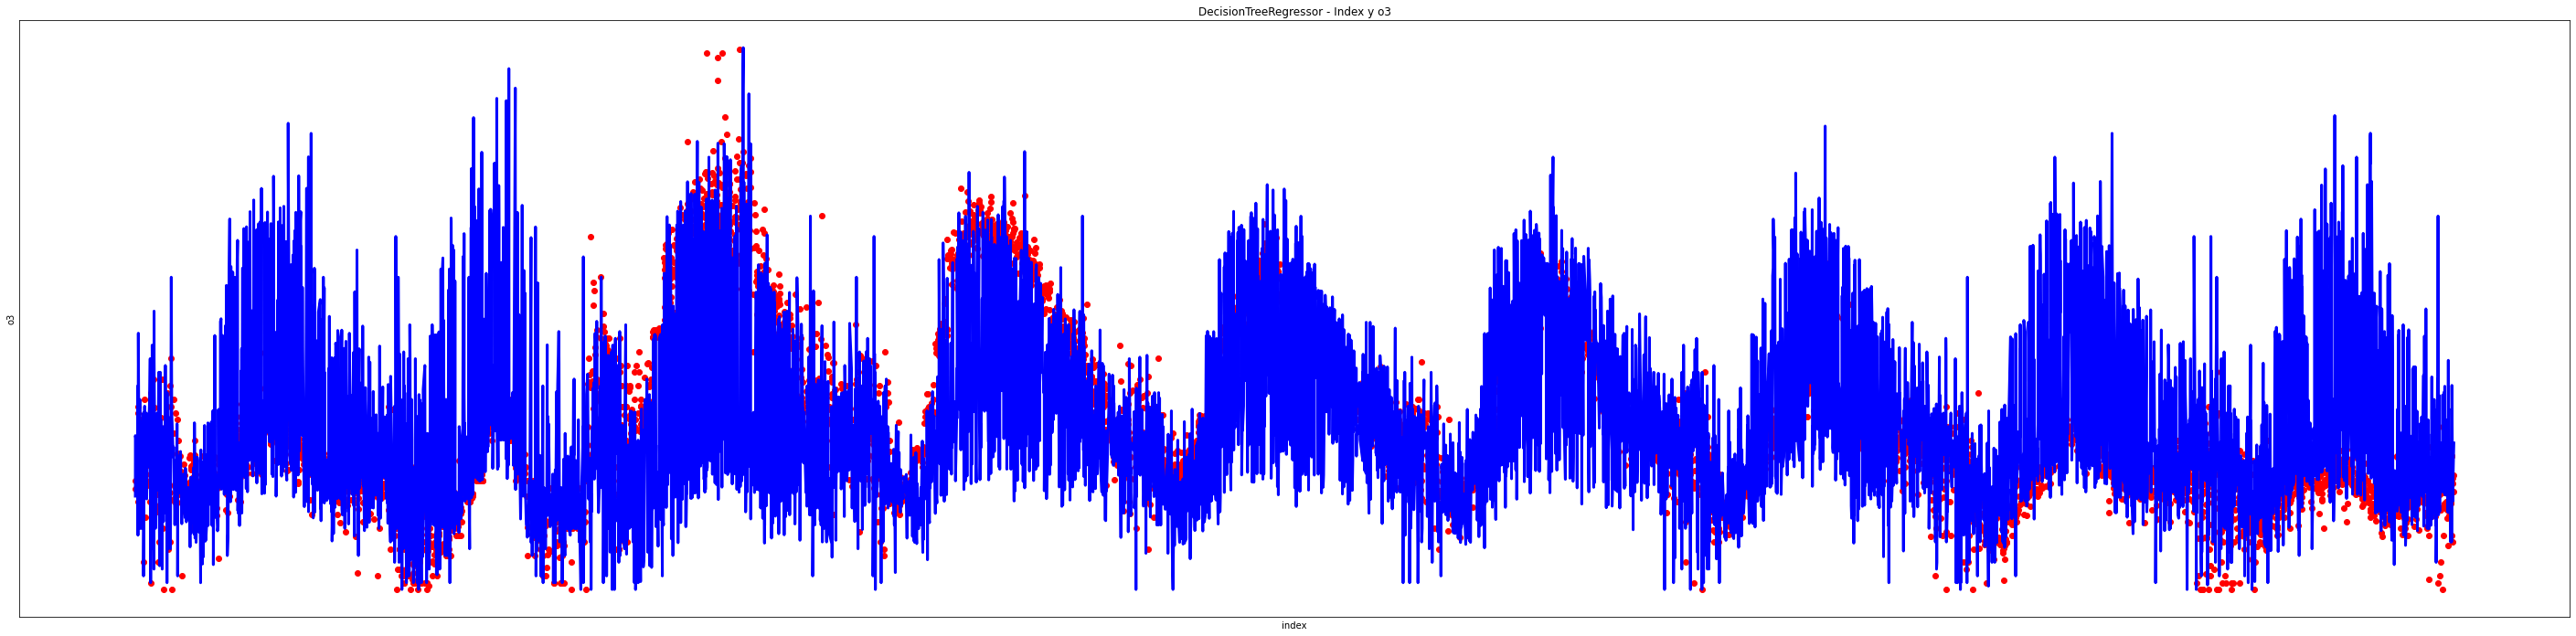

----------------------------------------------------MLPRegressor----------------------------------------------------
Mean squared error: 0.00012
Coefficient of determination: 0.27569


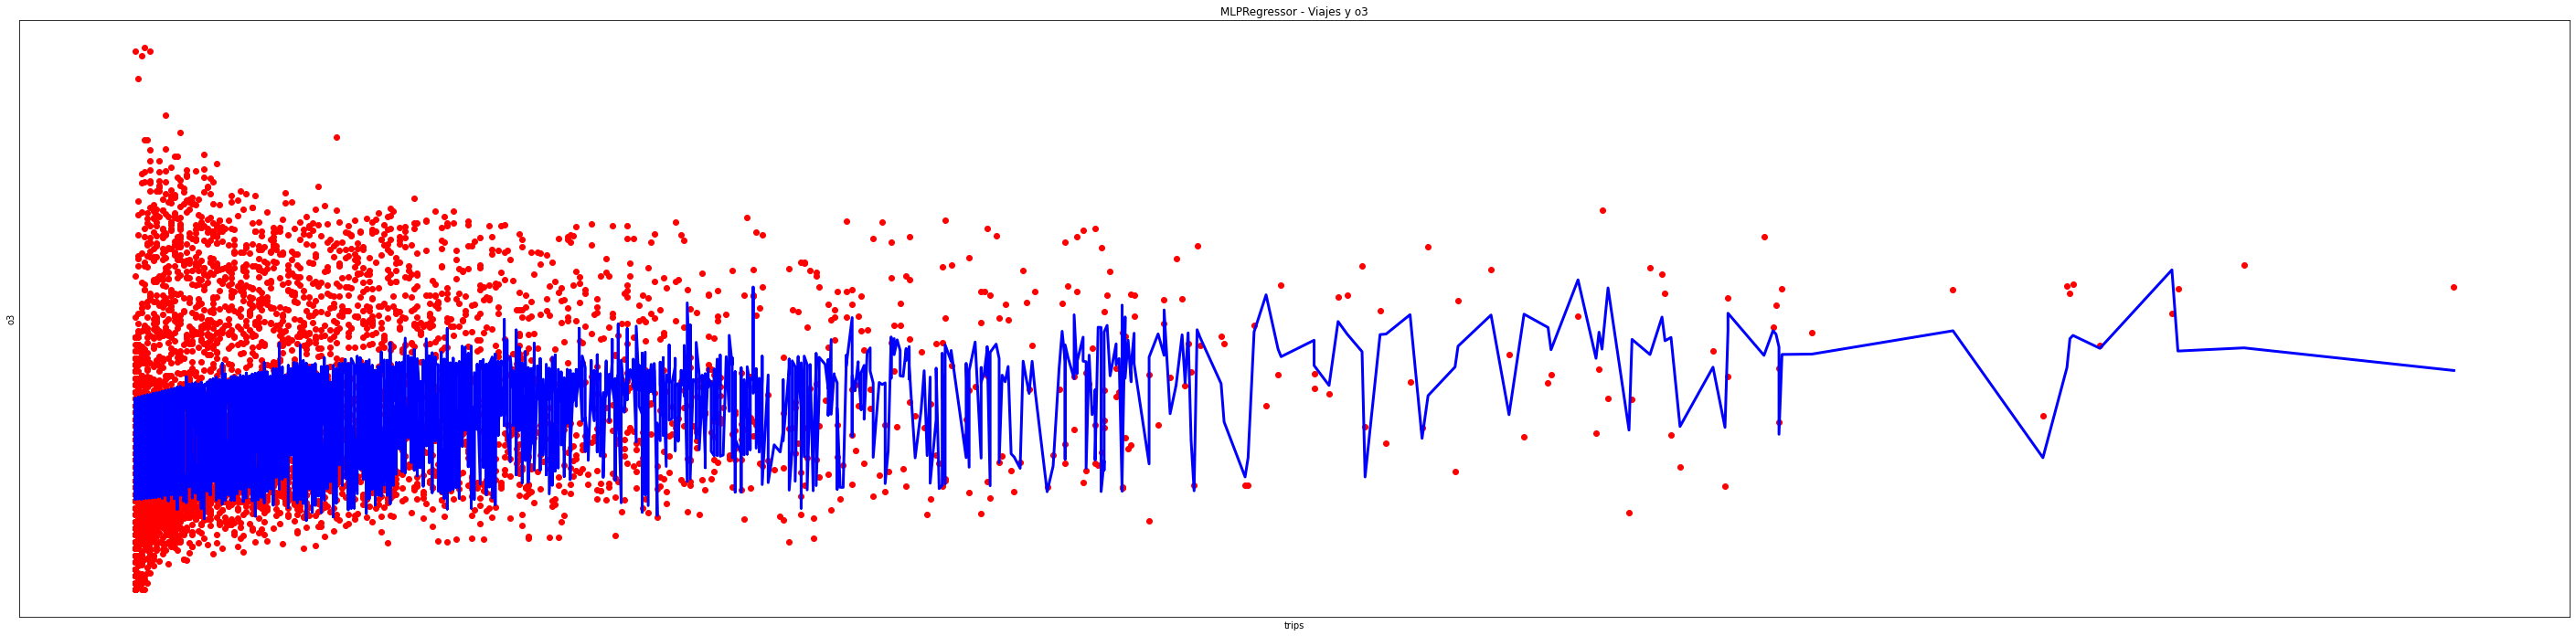

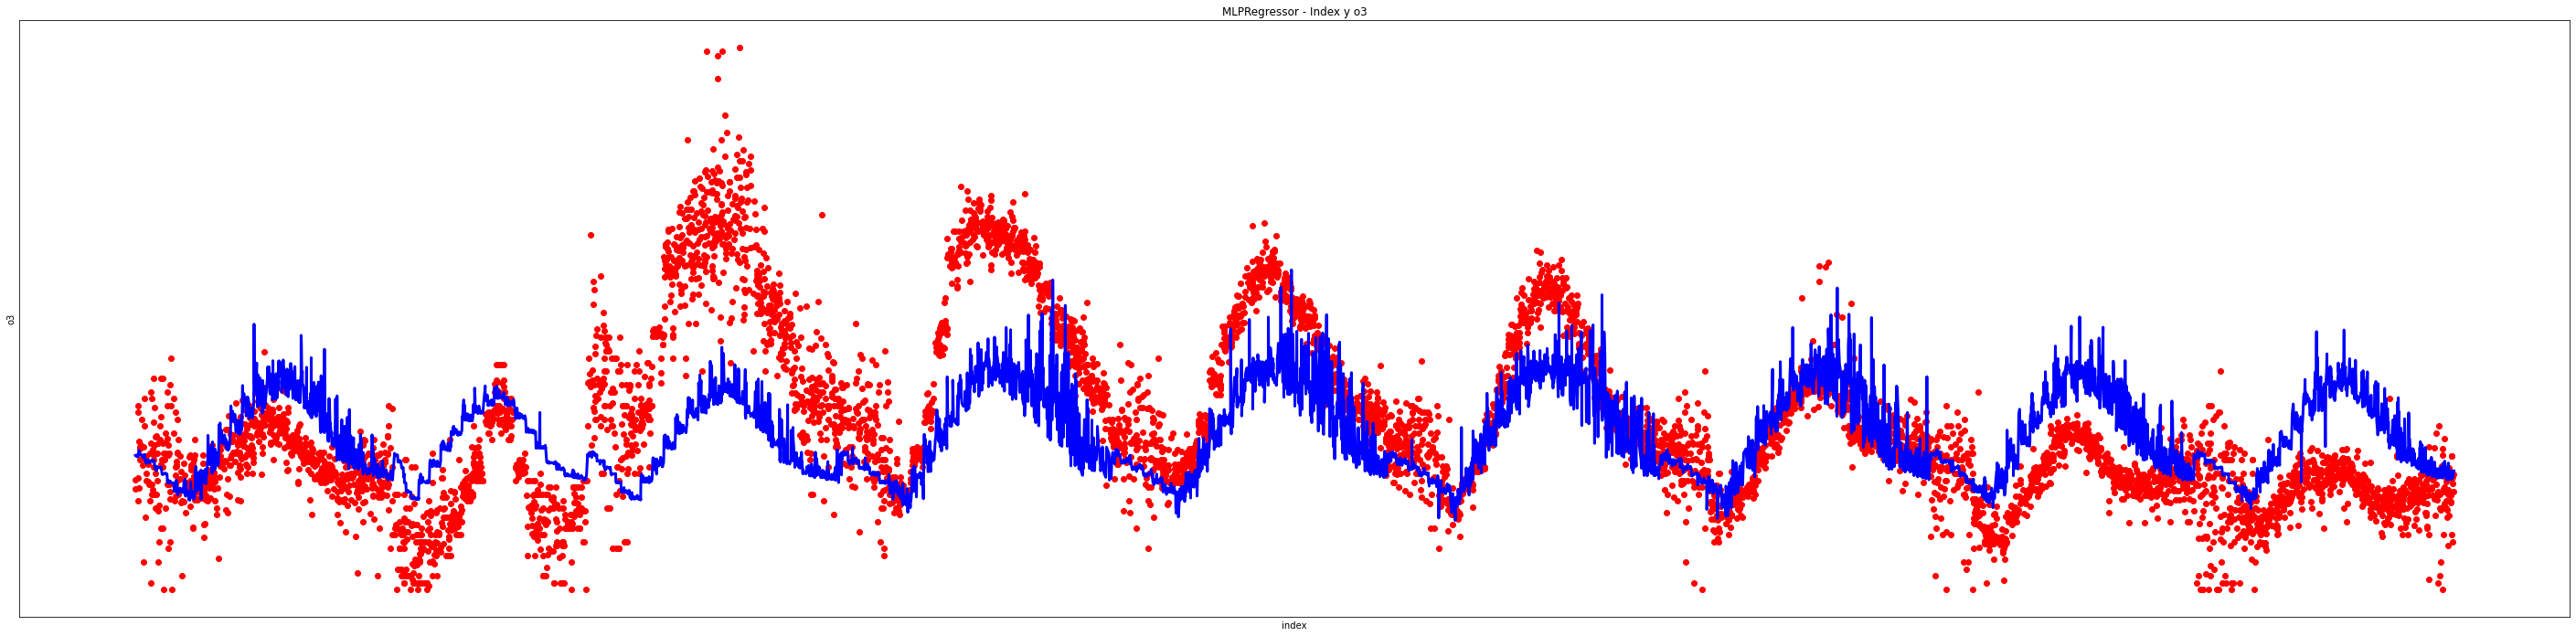

In [ ]:
models = []
models.append(('LinearRegression', linear_model.LinearRegression()))
models.append(('DecisionTreeRegressor', DecisionTreeRegressor(random_state=0)))
models.append(('MLPRegressor', MLPRegressor(random_state=1, max_iter=500)))
for name, model in models:
    model.fit(train.drop('label', axis=1), train['label'])
    test.sort_values(by='trips', ascending=True, inplace=True)
    y_pred = model.predict(test.drop('label', axis=1))

    print(f'----------------------------------------------------{name}----------------------------------------------------')
    if(name == 'LinearRegression'):
      print('Coefficients: \n', model.coef_)
    print('Mean squared error: %.5f'
          % mean_squared_error(test['label'], y_pred))
    print('Coefficient of determination: %.5f'
          % r2_score(test['label'], y_pred))
    plt.scatter(test['trips'], test['label'],  color='red')
    plt.plot(test['trips'], y_pred , color='blue', linewidth=3)

    plt.xticks(())
    plt.yticks(())
    plt.xlabel('trips')
    plt.ylabel('o3')
    plt.title(name + ' - Viajes y o3')
    plt.rcParams["figure.figsize"] = (50,12)
    plt.show()

    test = test.sort_index(axis = 0) 
    y_pred = model.predict(test.drop('label', axis=1))
    # Plot outputs
    plt.scatter(test.index, test['label'],  color='red')
    plt.plot(test.index, y_pred , color='blue', linewidth=3)

    plt.xticks(())
    plt.yticks(())
    plt.xlabel('index')
    plt.ylabel('o3')
    plt.title(name + ' - Index y o3')
    plt.rcParams["figure.figsize"] = (50,12)
    plt.show()

# El mismo modelo, solo para graficar también que tanto aprendió el modelo de las muestras de entrenamiento

----------------------------------------------------LinearRegression----------------------------------------------------
Coefficients: 
 [ 0.04378472 -0.027461    0.03303922  0.00608786]
Mean squared error: 0.00015
Coefficient of determination: 0.08589
------Testing the model------


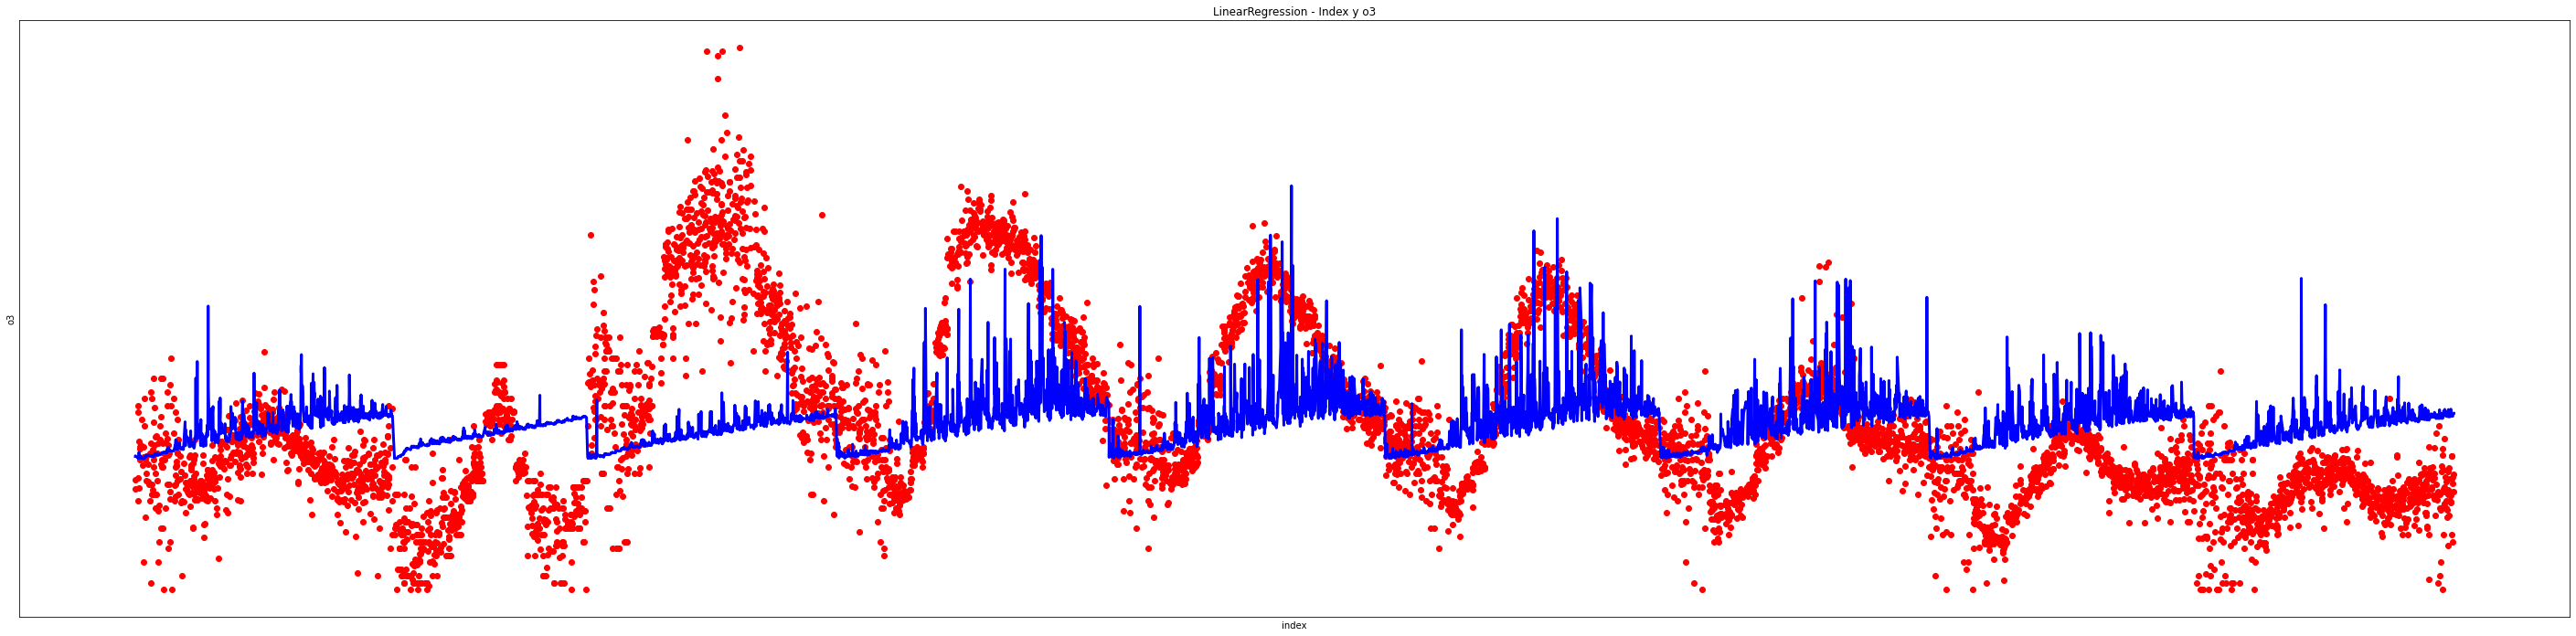

------Samples------


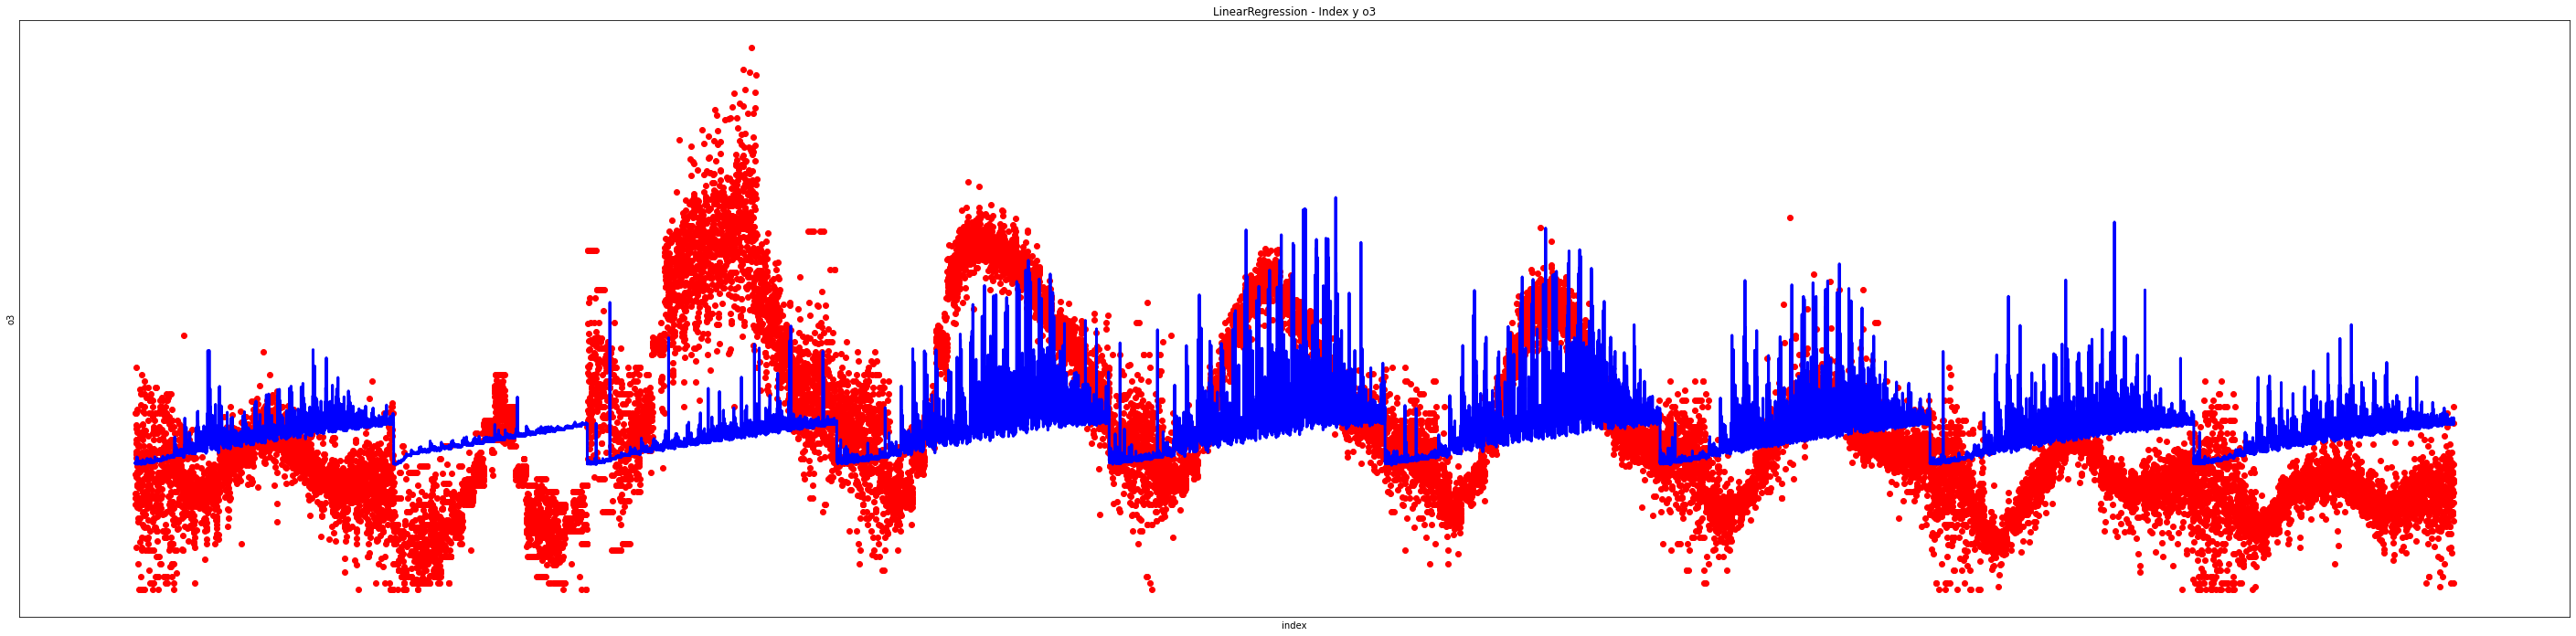

----------------------------------------------------DecisionTreeRegressor----------------------------------------------------
Mean squared error: 0.00019
Coefficient of determination: -0.20261
------Testing the model------


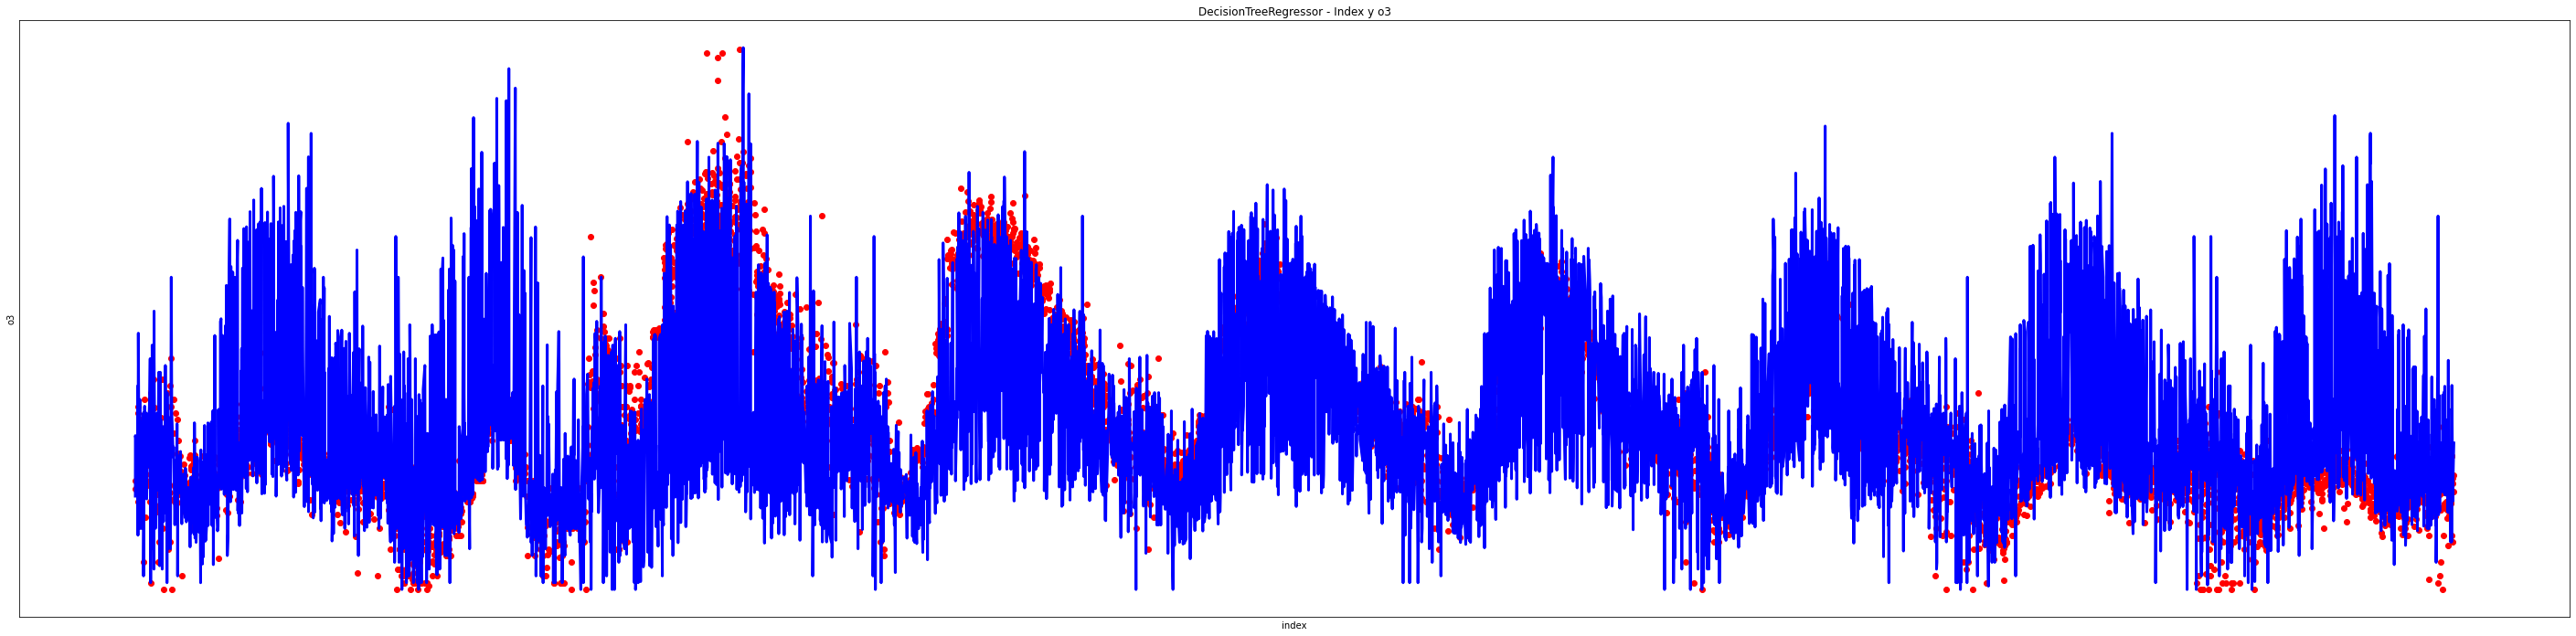

------Samples------


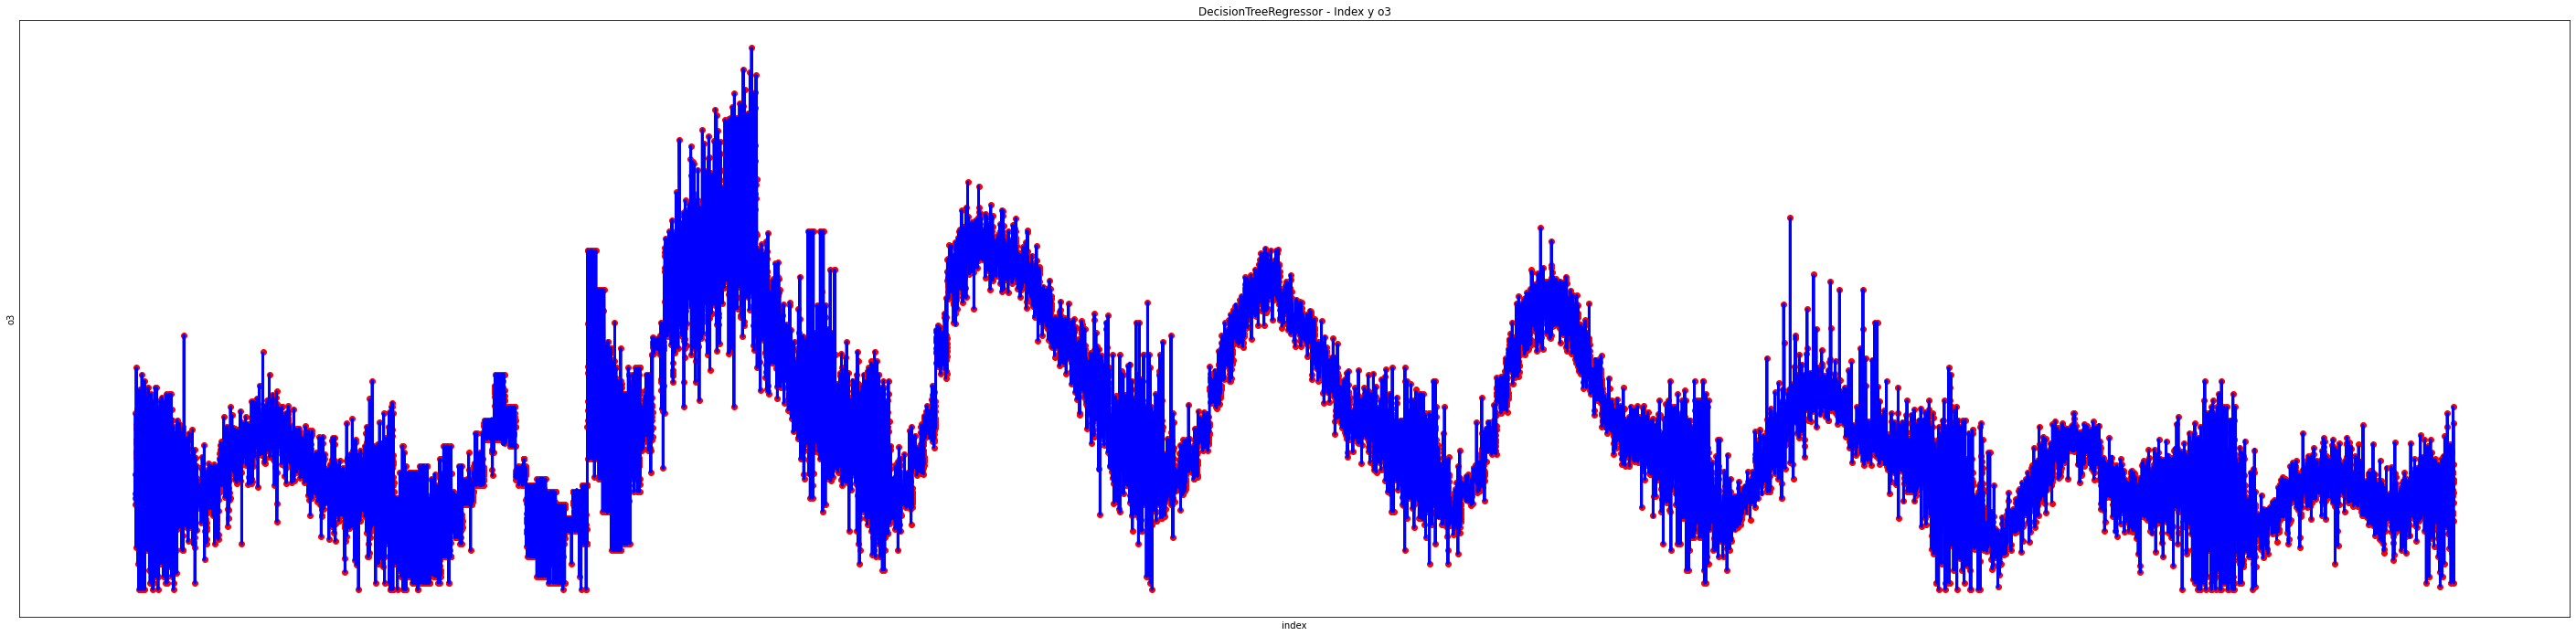

----------------------------------------------------MLPRegressor----------------------------------------------------
Mean squared error: 0.00012
Coefficient of determination: 0.27569
------Testing the model------


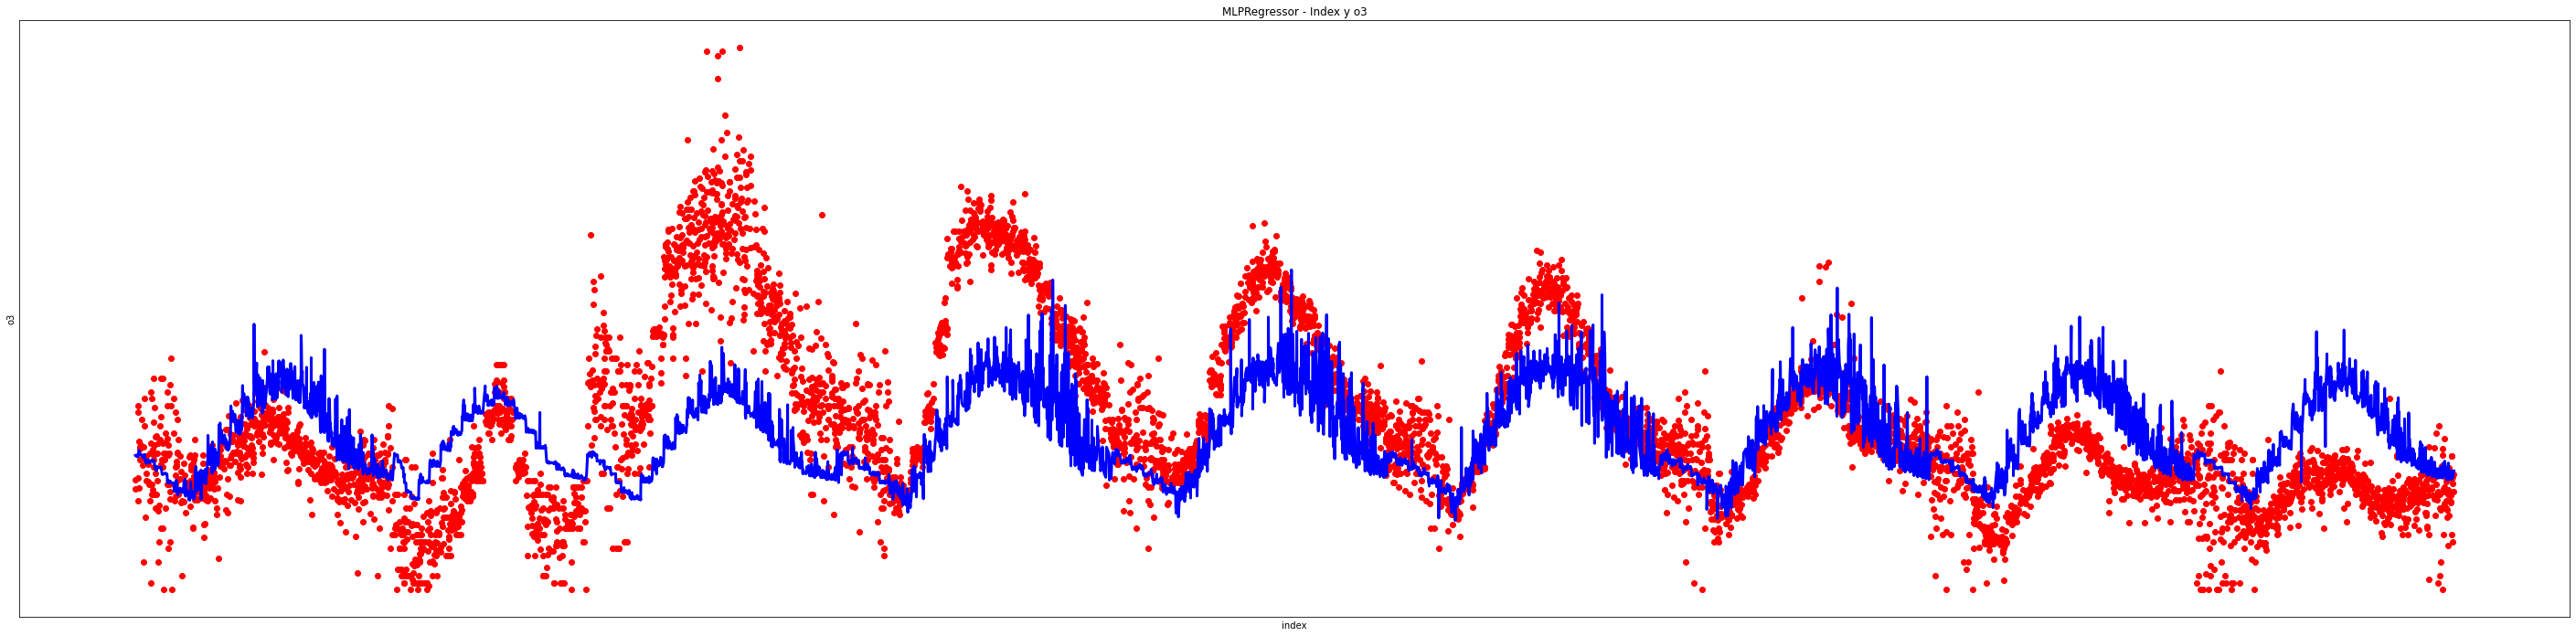

------Samples------


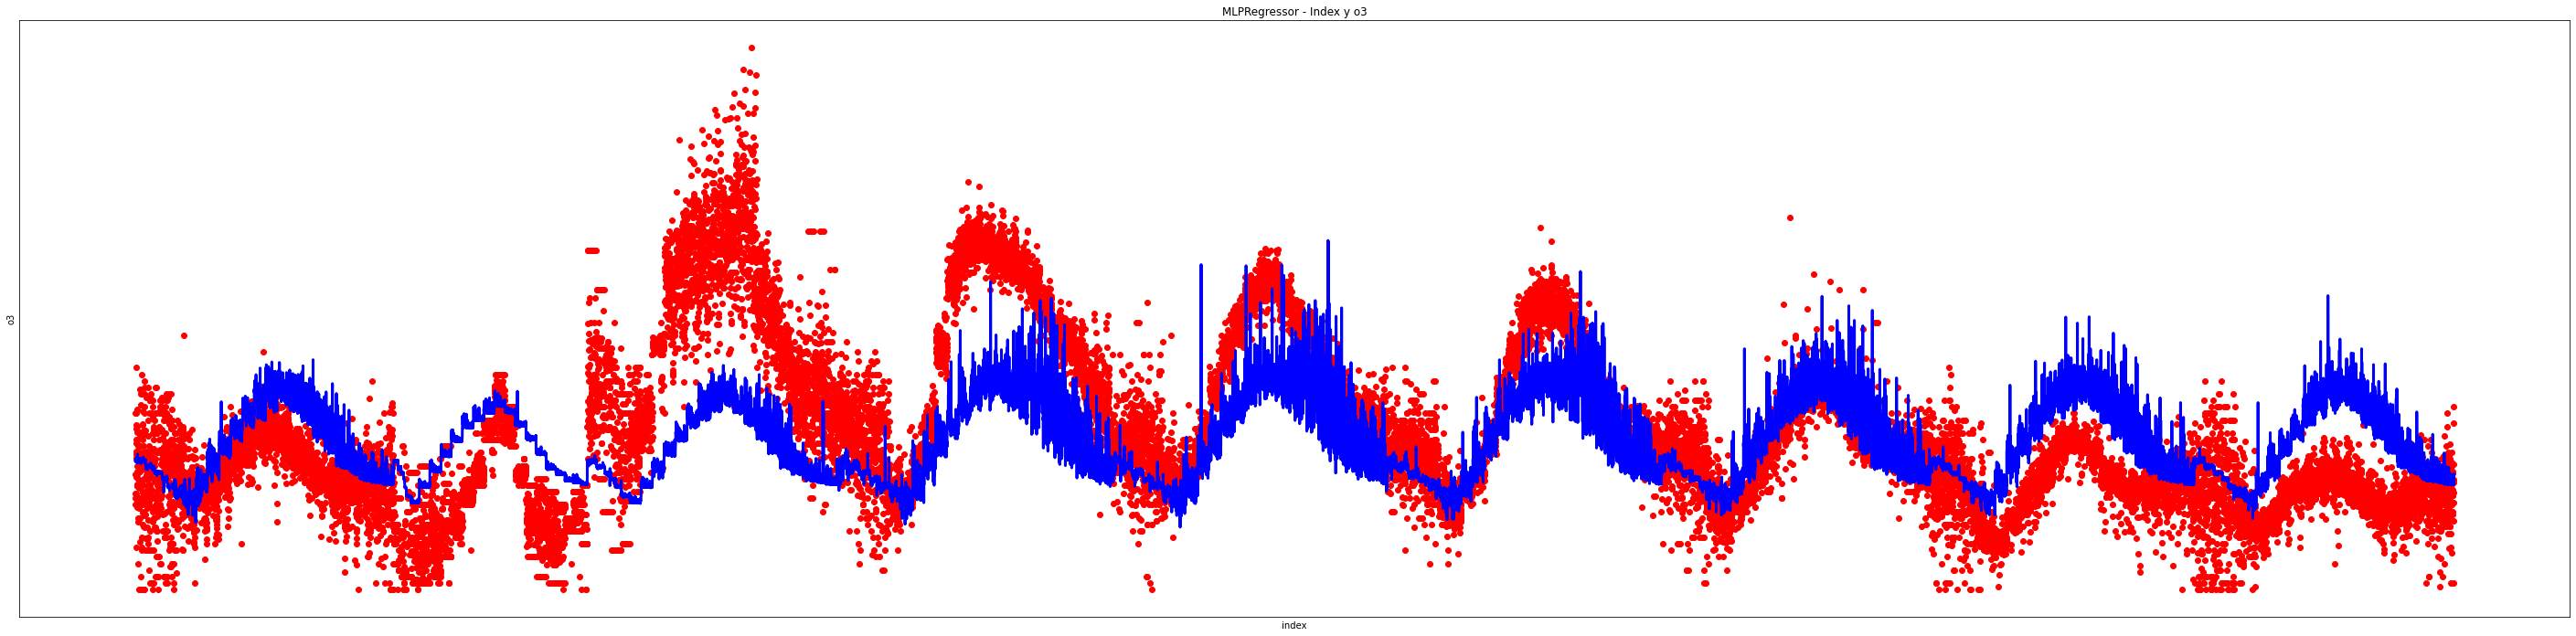

In [ ]:
models = []
models.append(('LinearRegression', linear_model.LinearRegression()))
models.append(('DecisionTreeRegressor', DecisionTreeRegressor(random_state=0)))
models.append(('MLPRegressor', MLPRegressor(random_state=1, max_iter=500)))
results = []
names = []
for name, model in models:
    model.fit(train.drop('label', axis=1), train['label'])
    y_pred = model.predict(test.drop('label', axis=1))

    print(f'----------------------------------------------------{name}----------------------------------------------------')
    if(name == 'LinearRegression'):
      print('Coefficients: \n', model.coef_)
    print('Mean squared error: %.5f'
          % mean_squared_error(test['label'], y_pred))
    print('Coefficient of determination: %.5f'
          % r2_score(test['label'], y_pred))

    test = test.sort_index(axis = 0) 
    y_pred = model.predict(test.drop('label', axis=1))
    # Plot outputs
    print('------Testing the model------')
    plt.scatter(test.index, test['label'],  color='red')
    plt.plot(test.index, y_pred , color='blue', linewidth=3)

    plt.xticks(())
    plt.yticks(())
    plt.xlabel('index')
    plt.ylabel('o3')
    plt.title(name + ' - Index y o3')
    plt.rcParams["figure.figsize"] = (50,12)
    plt.show()

    #the training samples
    print('------Samples------')
    train_sorted = train.sort_index(axis = 0) 
    y_pred = model.predict(train_sorted.drop('label', axis=1))
    plt.scatter(train_sorted.index, train_sorted['label'],  color='red')
    plt.plot(train_sorted.index, y_pred , color='blue', linewidth=3)

    plt.xticks(())
    plt.yticks(())
    plt.xlabel('index')
    plt.ylabel('o3')
    plt.title(name + ' - Index y o3')
    plt.rcParams["figure.figsize"] = (50,12)
    plt.show()

# Top 5 estaciones con mas registros



In [ ]:
#Get top 5 stations
data_station = data.startstationid.value_counts().rename_axis('startstationid').reset_index(name='counts')
data_station.sort_values(by='counts', ascending=False, inplace=True)
data_station.head(5)

startstationid  counts
0            3141     214
1            3285     214
2            3167     213
3            3164     213
4            3140     213

## Estacion 3141


###Preparacion


In [ ]:
#Experiment with station 3141
data_3141 = data.query('startstationid == 3141')
data_3141 = data_3141[['hour', 'trips', 'tripdistance', 'tripduration', 'o3']]
data_3141.head()

hour  trips  tripdistance  tripduration        o3
5       0      9       20.1779          5302  0.014778
154     1      8       23.7459          6277  0.014500
285     2      6       15.9260         57799  0.019500
394     3      3        3.9251          2944  0.020667
472     4      6       12.0524          3403  0.019833

In [ ]:
data_3141.shape

(214, 5)

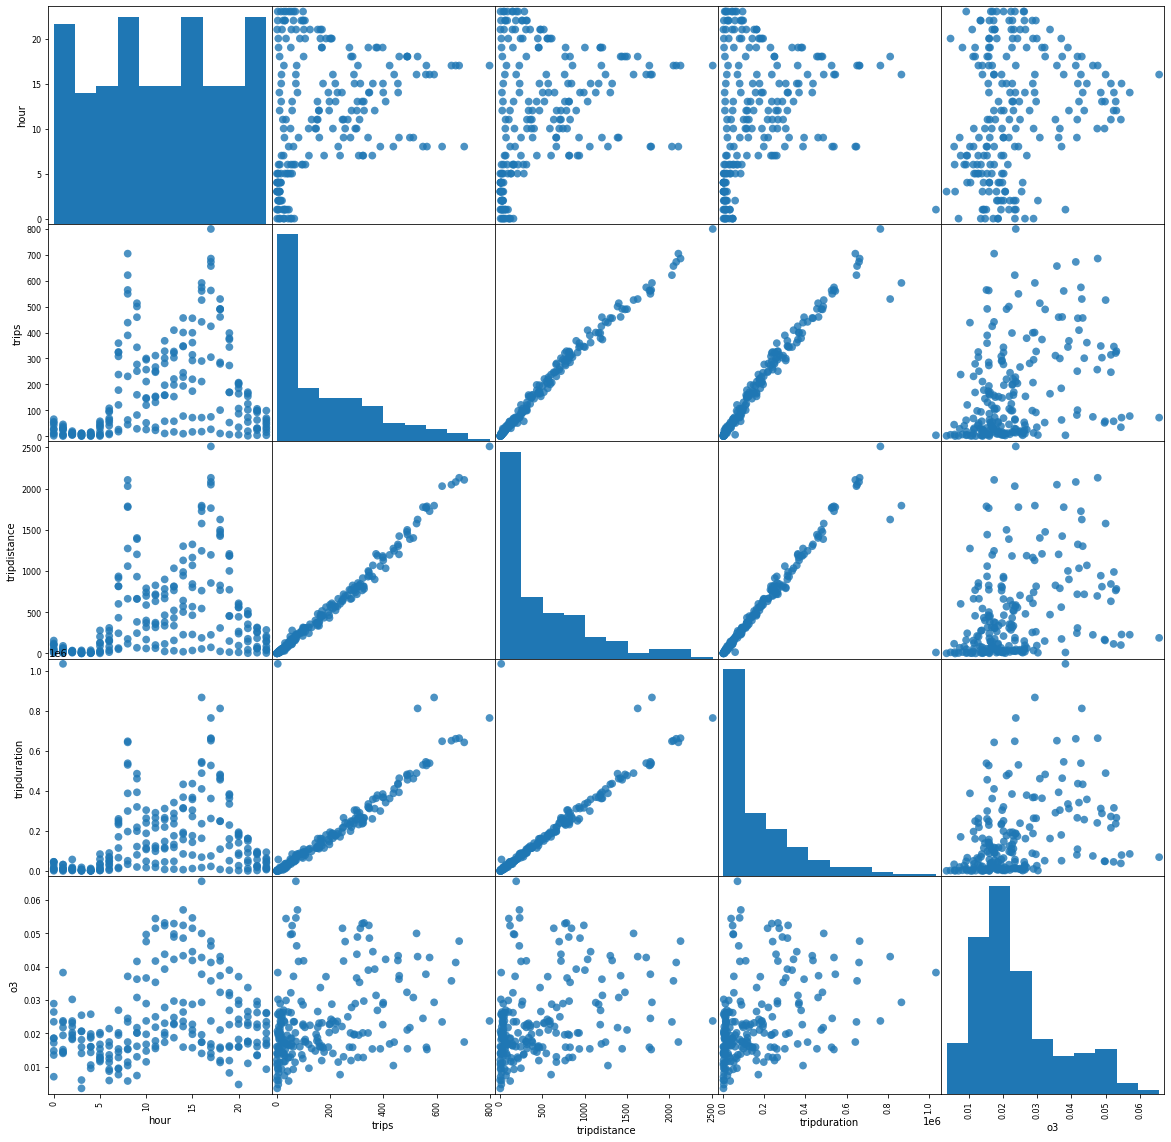

In [ ]:
pd.plotting.scatter_matrix(data_3141, figsize=(20,20), marker = 'o', hist_kwds = {'bins': 10}, s = 60, alpha = 0.8)
plt.show()

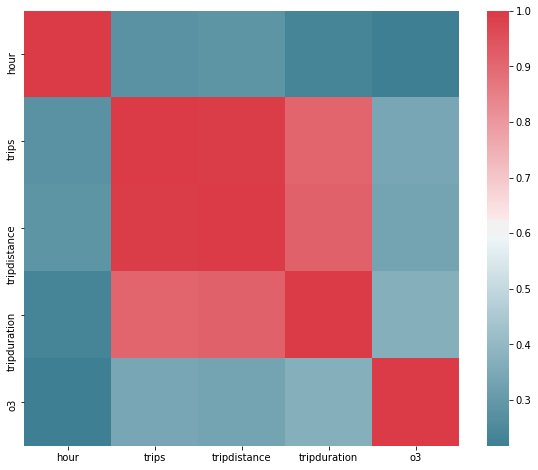

In [ ]:
f, ax = plt.subplots(figsize=(10, 8))
corr = data_3141.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [ ]:
#data_3131.query('tripduration < 18000').tripduration.hist()
print(data_3141.query('tripduration < 18000').shape)
print(data_3141.shape)
#data_3131 = data_3131.query('tripduration < 18000')

(56, 5)
(214, 5)


###Experimentacion

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


----------------------------------------------------LinearRegression----------------------------------------------------
Coefficients: 
 [ 2.93510909e-04  5.50278885e-05 -1.95158079e-05  2.56013618e-08]
Mean squared error: 0.00010
Coefficient of determination: 0.09588


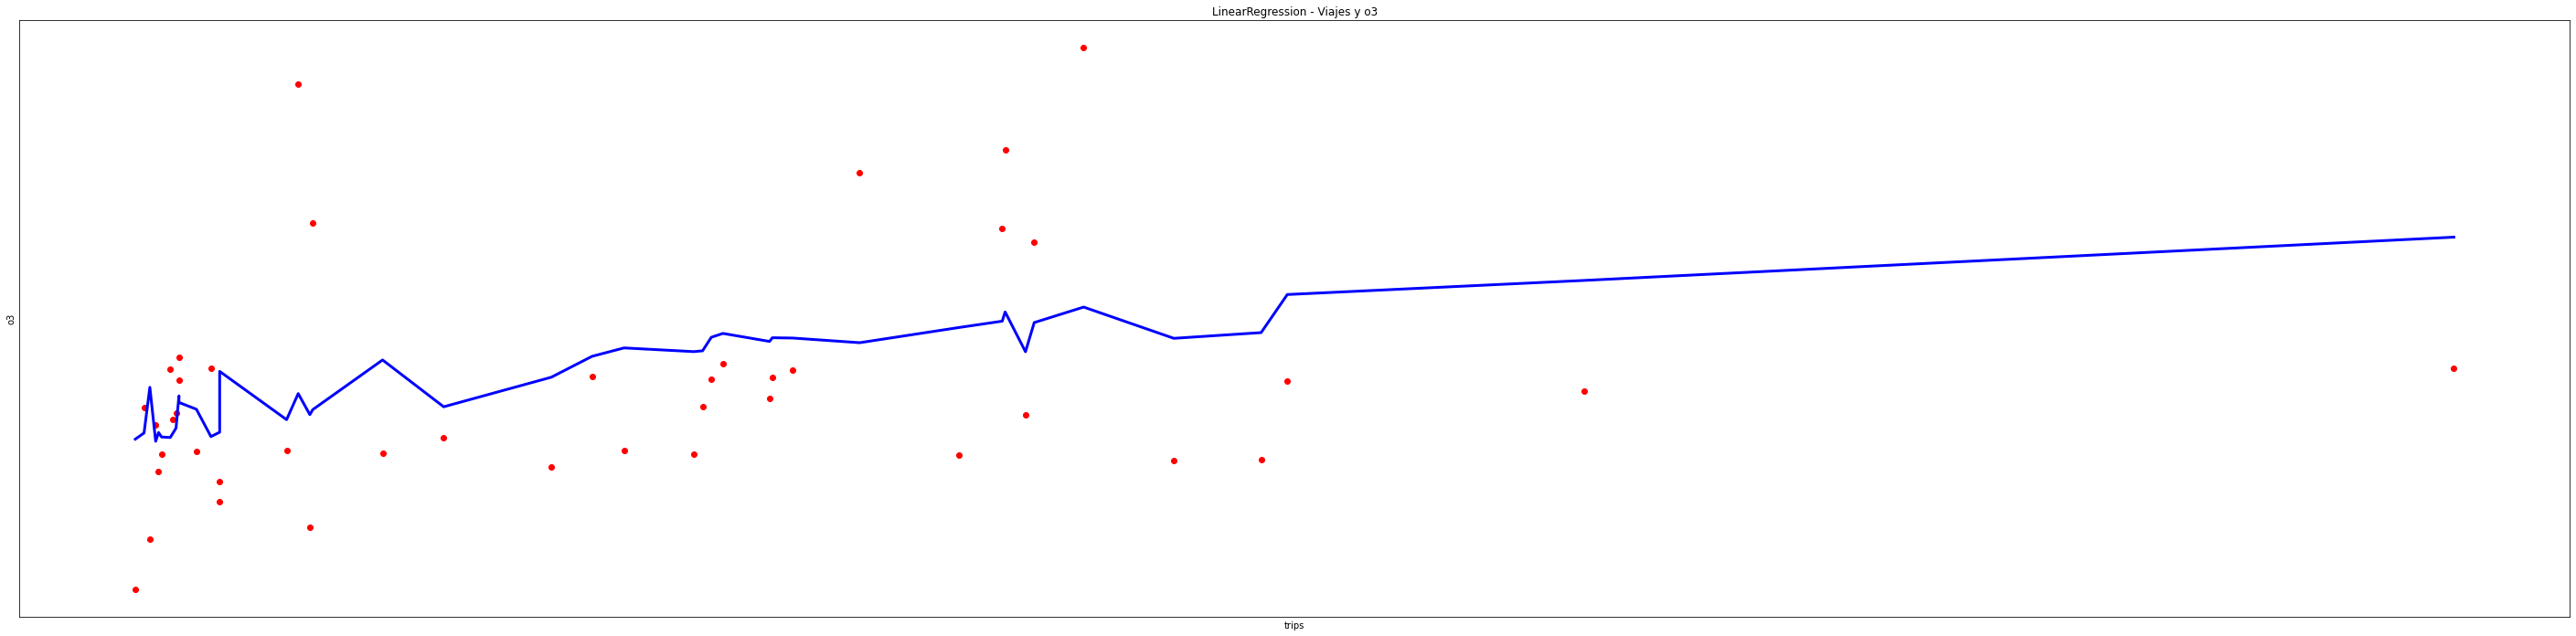

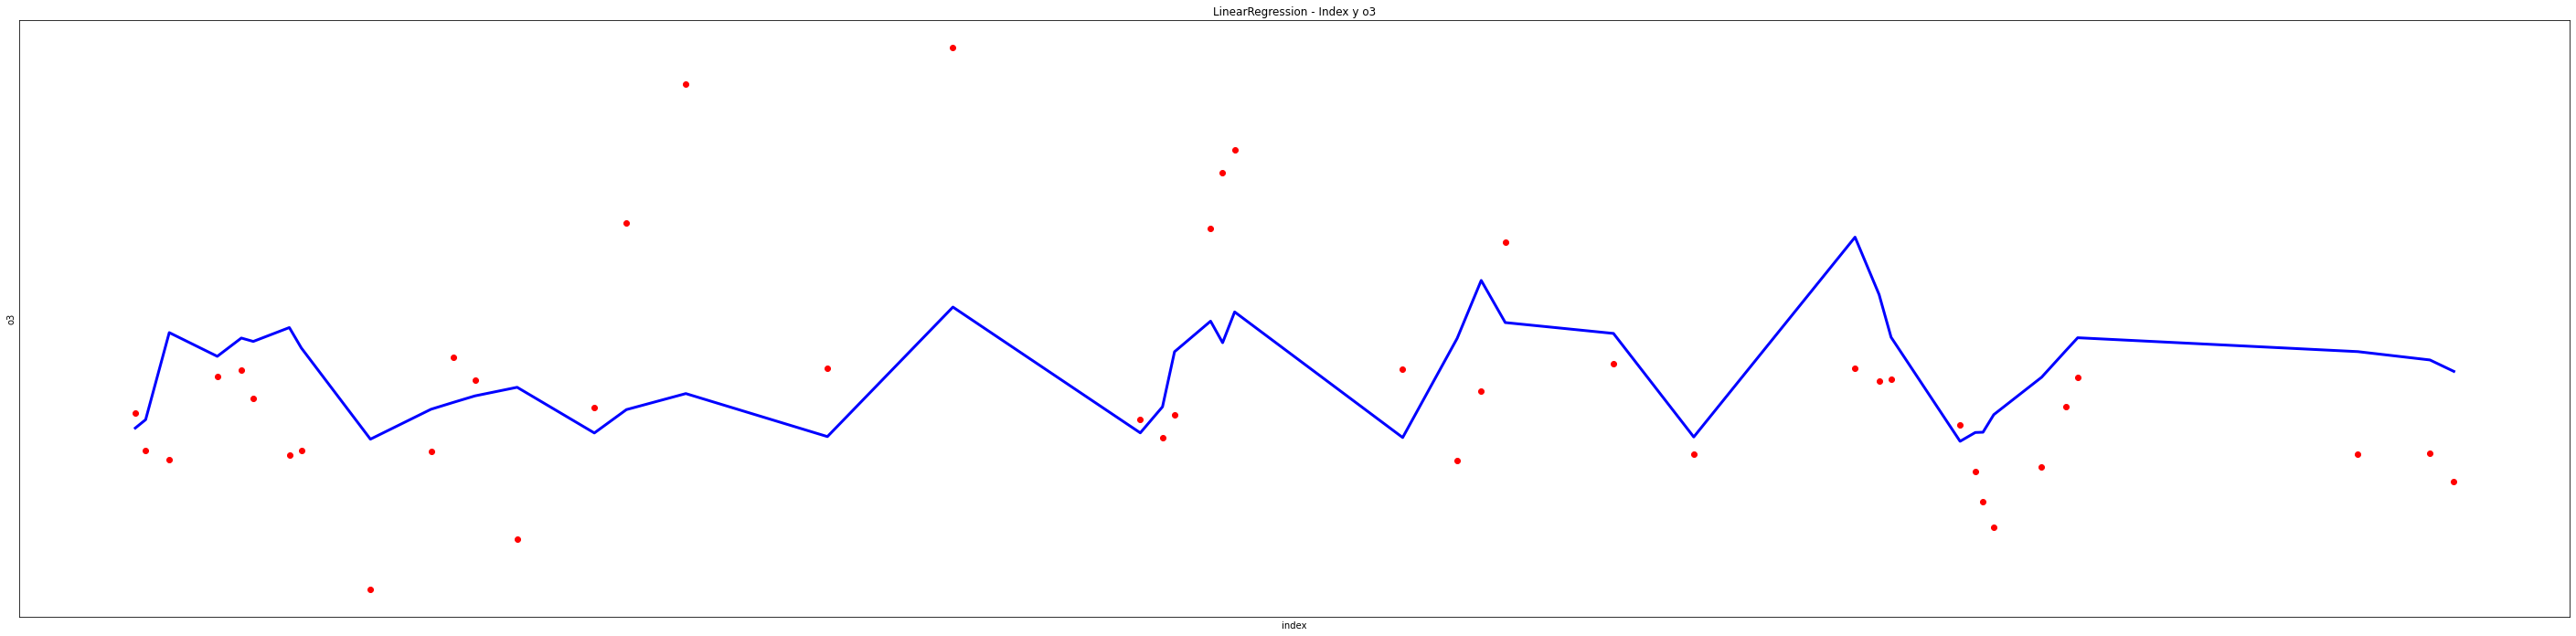

----------------------------------------------------DecisionTreeRegressor----------------------------------------------------
Mean squared error: 0.00008
Coefficient of determination: 0.25489


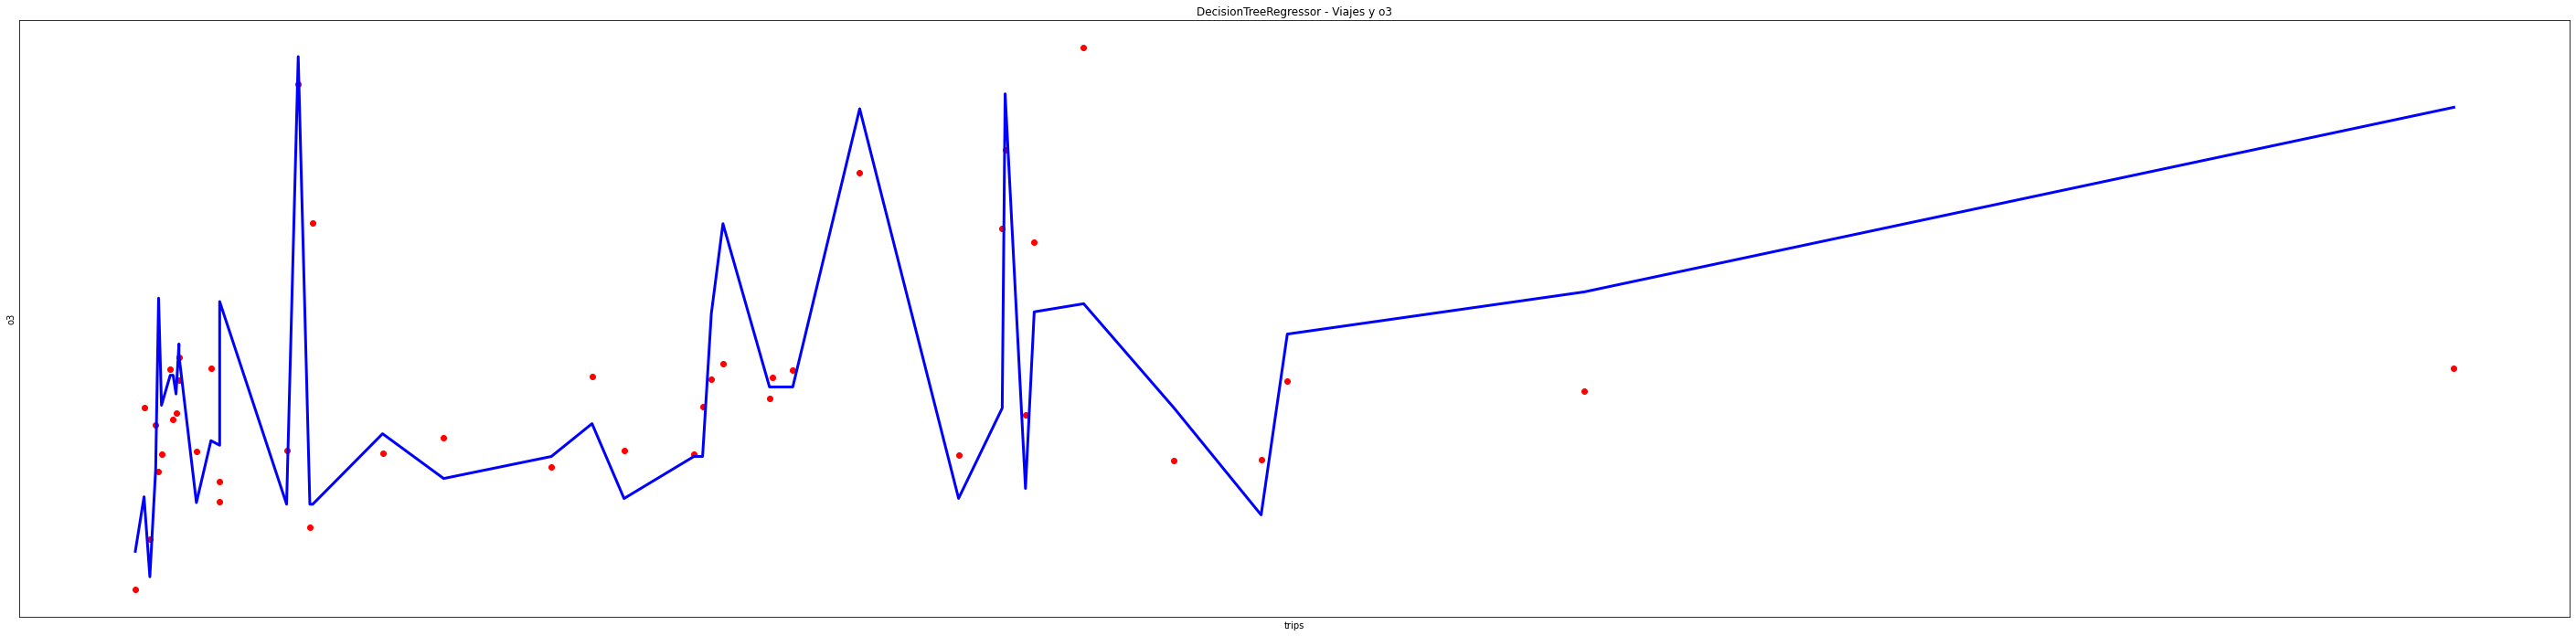

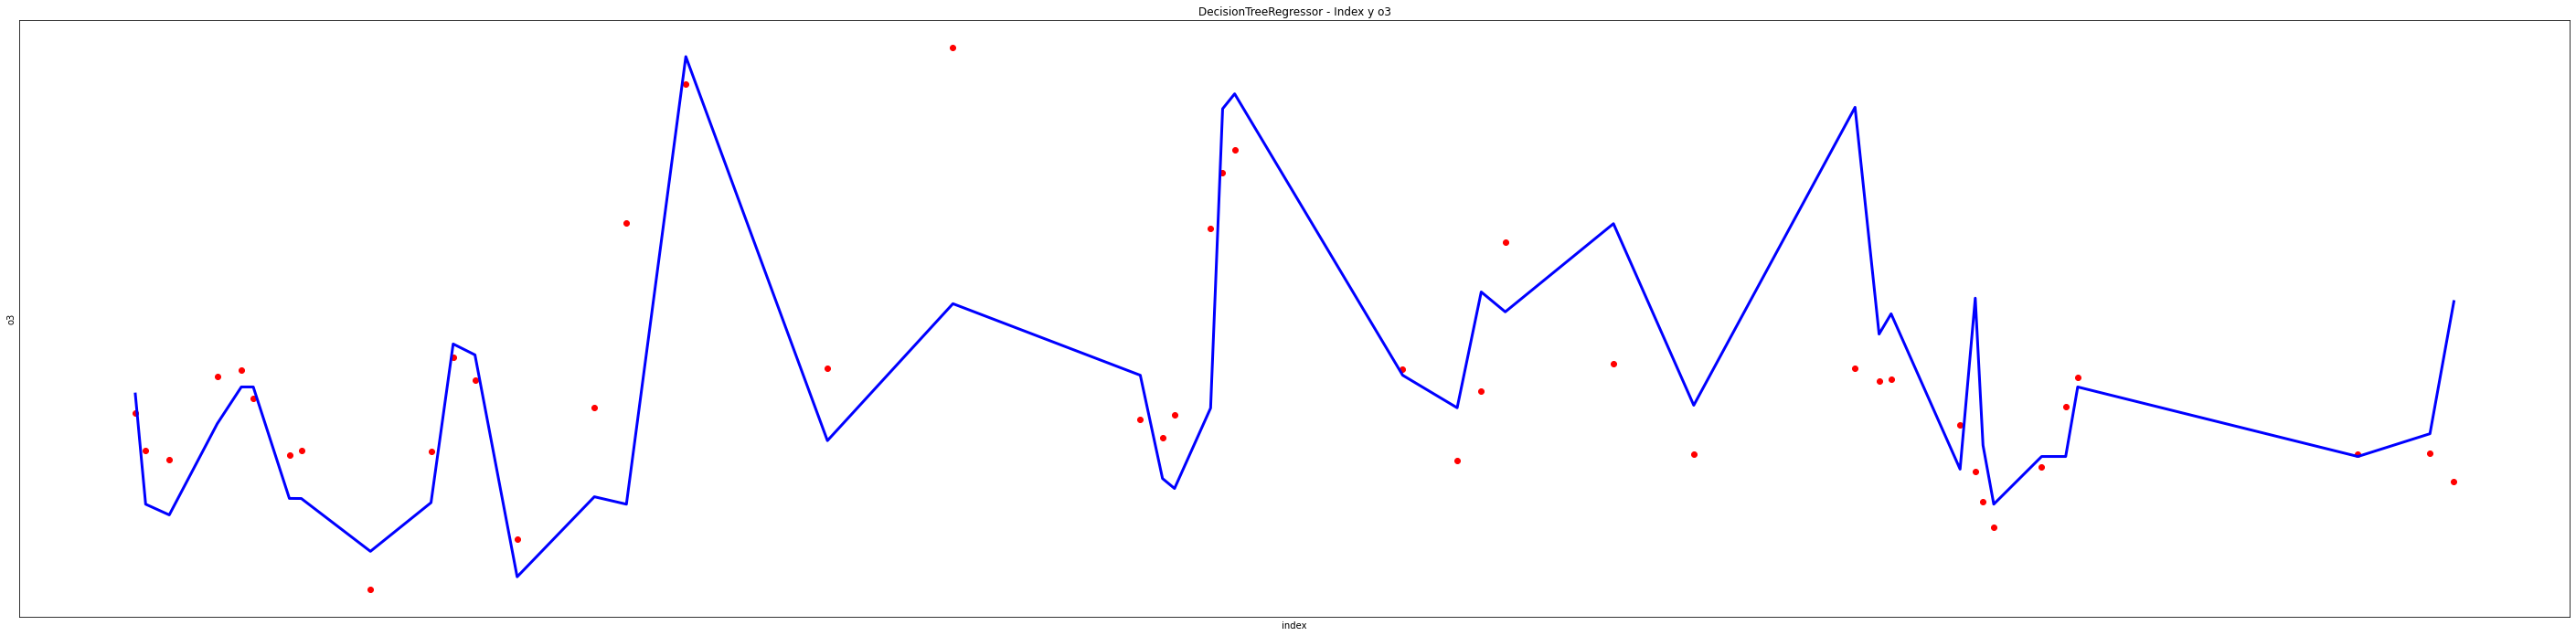

----------------------------------------------------MLPRegressor----------------------------------------------------
Mean squared error: 0.00077
Coefficient of determination: -6.15675


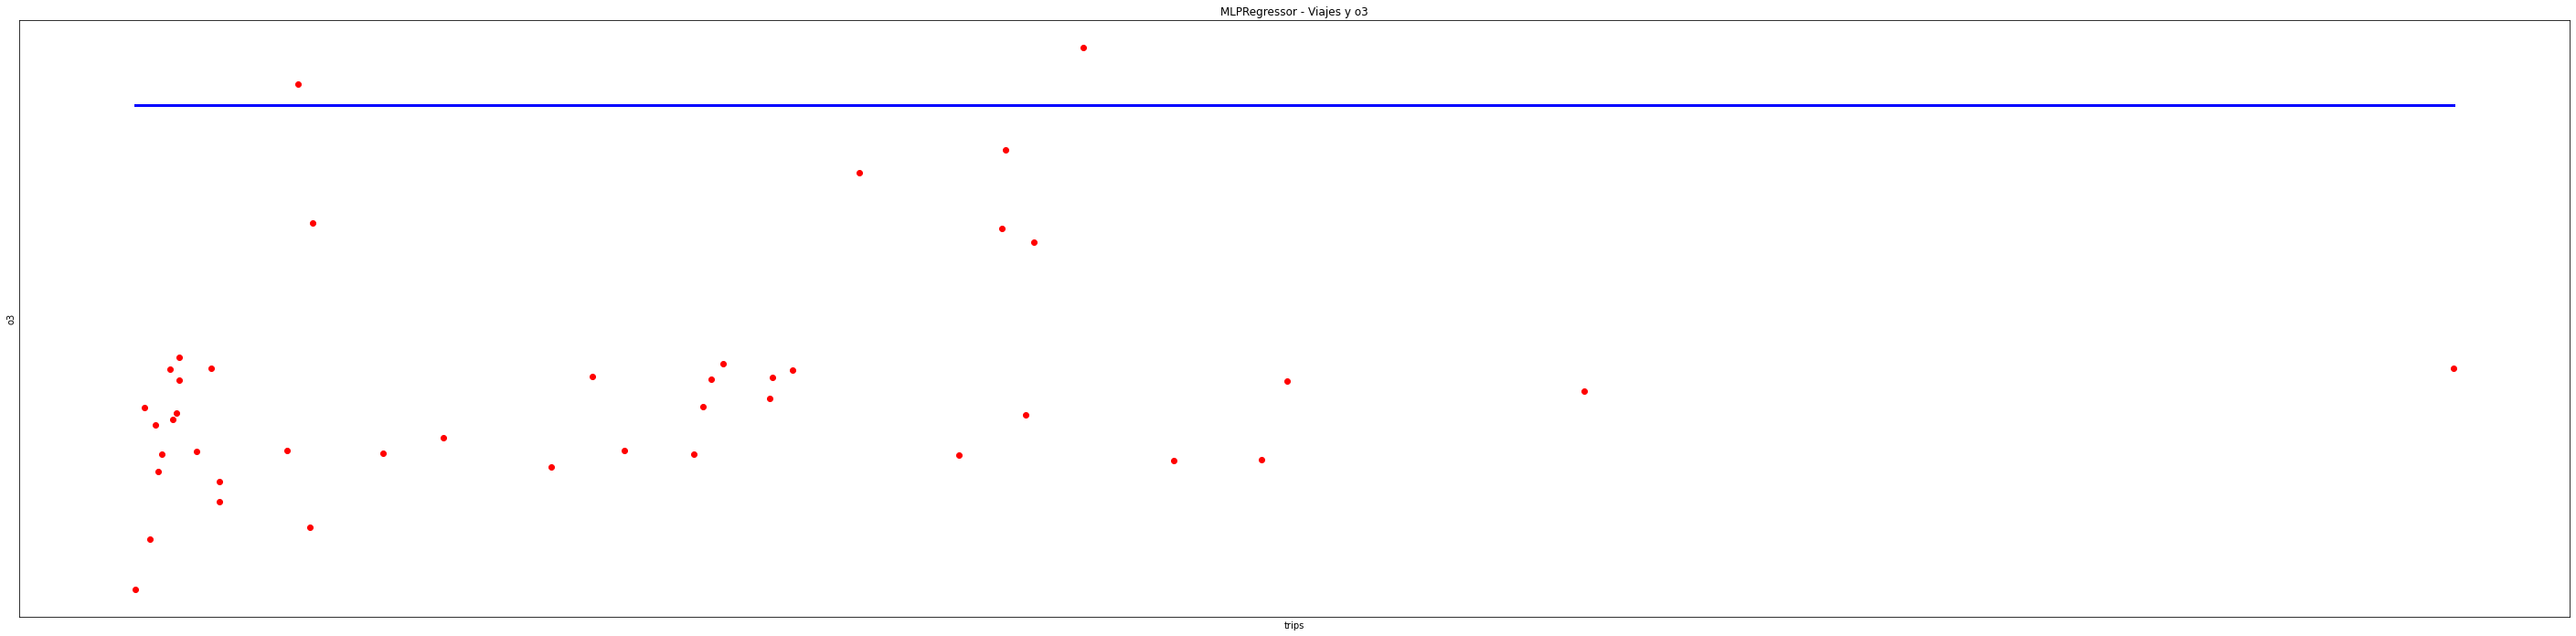

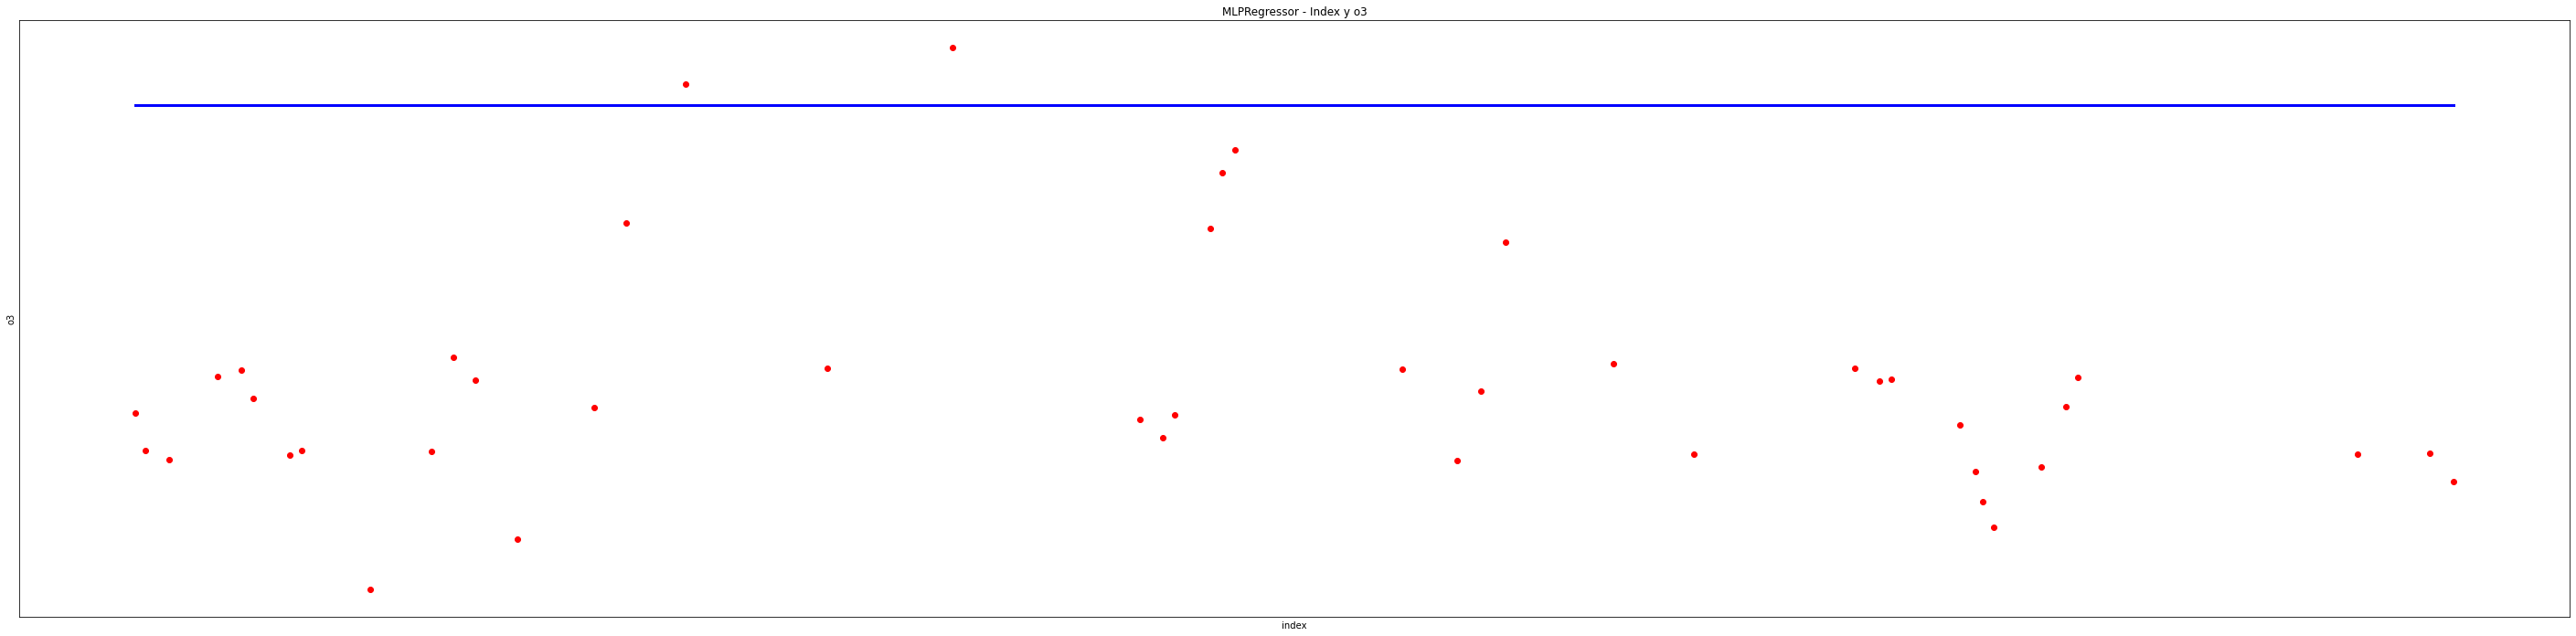

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


----------------------------------------------------MLPRegressor2----------------------------------------------------
Mean squared error: 0.98637
Coefficient of determination: -9129.56103


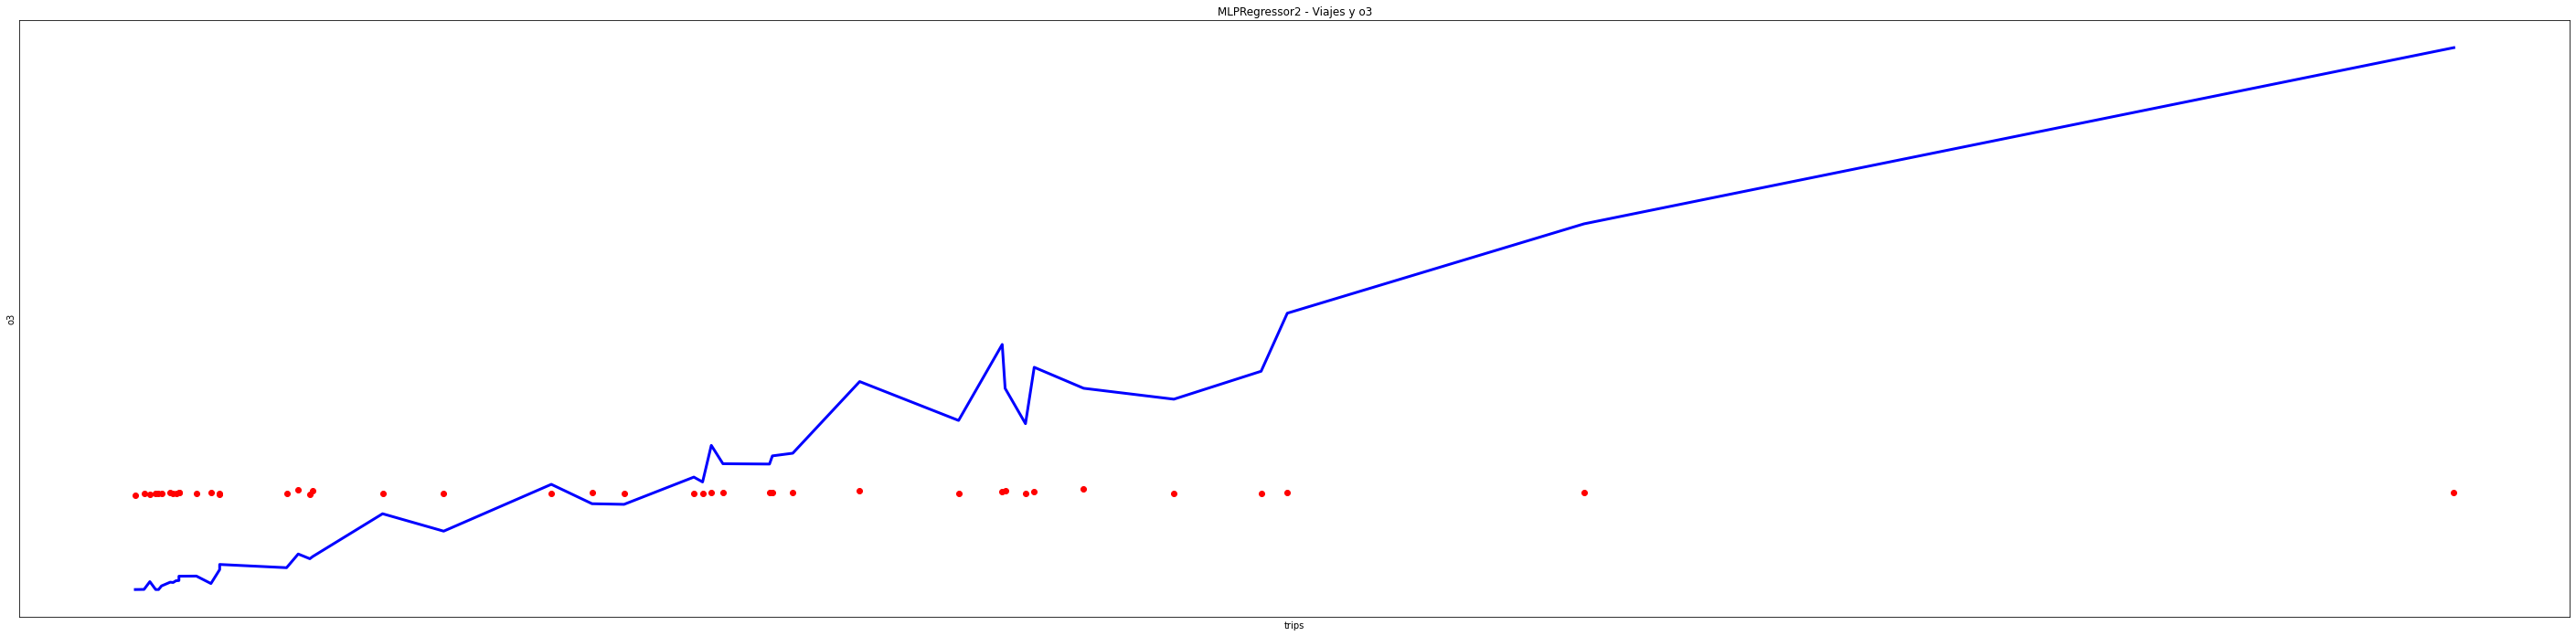

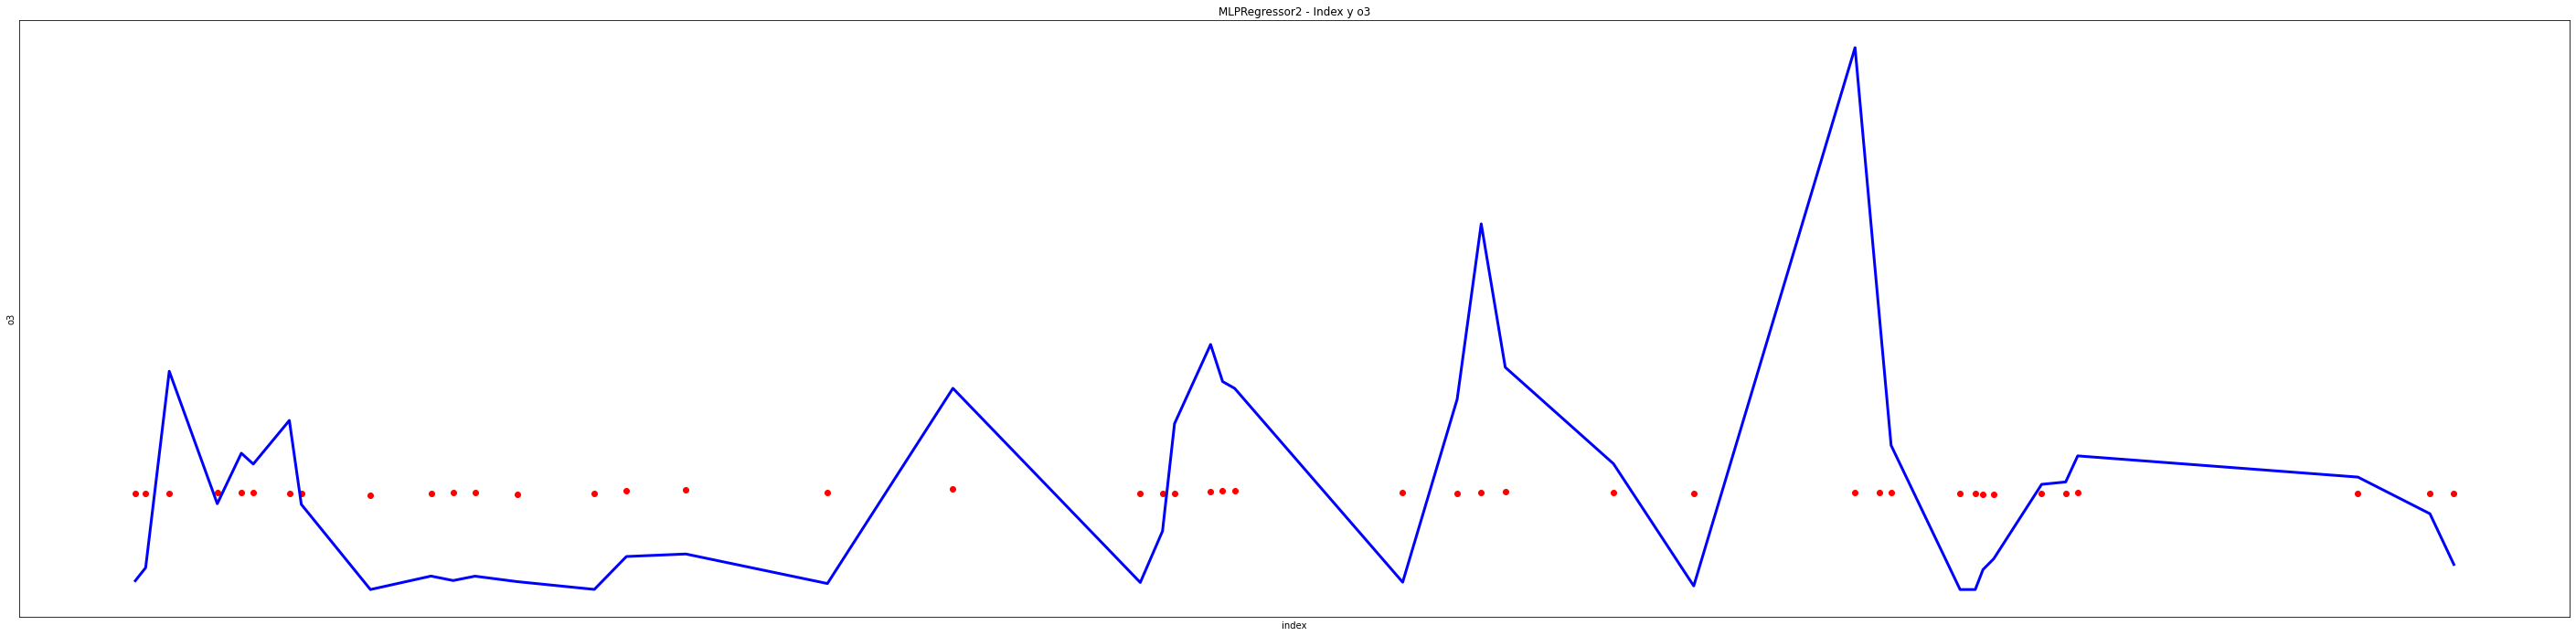

In [ ]:
train3141, test3141 = train_test_split(data_3141, test_size=0.2)

models3141 = []
models3141.append(('LinearRegression', linear_model.LinearRegression()))
models3141.append(('DecisionTreeRegressor', DecisionTreeRegressor(random_state=0)))

models3141.append(('MLPRegressor', MLPRegressor(hidden_layer_sizes=(4, 4, 4, 4,), learning_rate='constant', 
                                                solver='sgd', batch_size=50, learning_rate_init=0.001, random_state=1, max_iter=5000)))

models3141.append(('MLPRegressor2', MLPRegressor(hidden_layer_sizes=(4, 4, 4, 4,), learning_rate='constant', 
                                                solver='adam', batch_size=50, learning_rate_init=0.002, random_state=1, max_iter=500)))

for name, model in models3141:
    test3141.sort_values(by='trips', ascending=True, inplace=True)
    model.fit(train3141.drop('o3', axis=1), train3141['o3'])
    y_pred = model.predict(test3141.drop('o3', axis=1))

    print(f'----------------------------------------------------{name}----------------------------------------------------')
    if(name == 'LinearRegression'):
      print('Coefficients: \n', model.coef_)
    print('Mean squared error: %.5f'
          % mean_squared_error(test3141['o3'], y_pred))
    print('Coefficient of determination: %.5f'
          % r2_score(test3141['o3'], y_pred))
    
    plt.scatter(test3141['trips'], test3141['o3'],  color='red')
    plt.plot(test3141['trips'], y_pred , color='blue', linewidth=3)

    plt.xticks(())
    plt.yticks(())
    plt.xlabel('trips')
    plt.ylabel('o3')
    plt.title(name + ' - Viajes y o3')
    plt.rcParams["figure.figsize"] = (50,12)
    plt.show()

    test3141 = test3141.sort_index(axis = 0) 
    y_pred = model.predict(test3141.drop('o3', axis=1))
    # Plot outputs
    plt.scatter(test3141.index, test3141['o3'],  color='red')
    plt.plot(test3141.index, y_pred , color='blue', linewidth=3)

    plt.xticks(())
    plt.yticks(())
    plt.xlabel('index')
    plt.ylabel('o3')
    plt.title(name + ' - Index y o3')
    plt.rcParams["figure.figsize"] = (50,12)
    plt.show()

### Ordenamiento por fecha


In [ ]:
data_3141_sorted= data.query('startstationid == 3141')
data_3141_sorted.sort_values(by='starttime', ascending=True, inplace=True)
#data_3141_sorted['starttime'] = data_3141_sorted.starttime.apply(lambda time: int(time[4:13].replace('-','').replace(' ','')))
#data_3141_sorted['starttime'] = data_3141_sorted.starttime.apply(lambda time: get_order())
#data_3141_sorted = data_3141_sorted[['hour', 'trips', 'tripdistance', 'tripduration', 'o3']]
data_3141_sorted.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


hour  startstationid  trips  ...  tripduration            starttime        o3
5        0            3141      9  ...          5302  2019-01-01 00:00:00  0.014778
154      1            3141      8  ...          6277  2019-01-01 01:00:00  0.014500
724      6            3141     54  ...         35257  2019-01-01 06:00:00  0.016278
890      7            3141    178  ...        115060  2019-01-01 07:00:00  0.014388
1060     8            3141    389  ...        299627  2019-01-01 08:00:00  0.015375

[5 rows x 7 columns]

In [ ]:
data_3141_sorted.groupby('starttime').size()

starttime
10100     1
10101     1
10106     1
10107     1
10108     1
         ..
120301    1
120303    1
120305    1
120323    1
120604    1
Length: 214, dtype: int64

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


----------------------------------------------------LinearRegression----------------------------------------------------
Coefficients: 
 [ 2.91666160e-04  6.85959575e-05 -2.47986993e-05  2.62562542e-08]
Mean squared error: 0.00012
Coefficient of determination: -0.06742


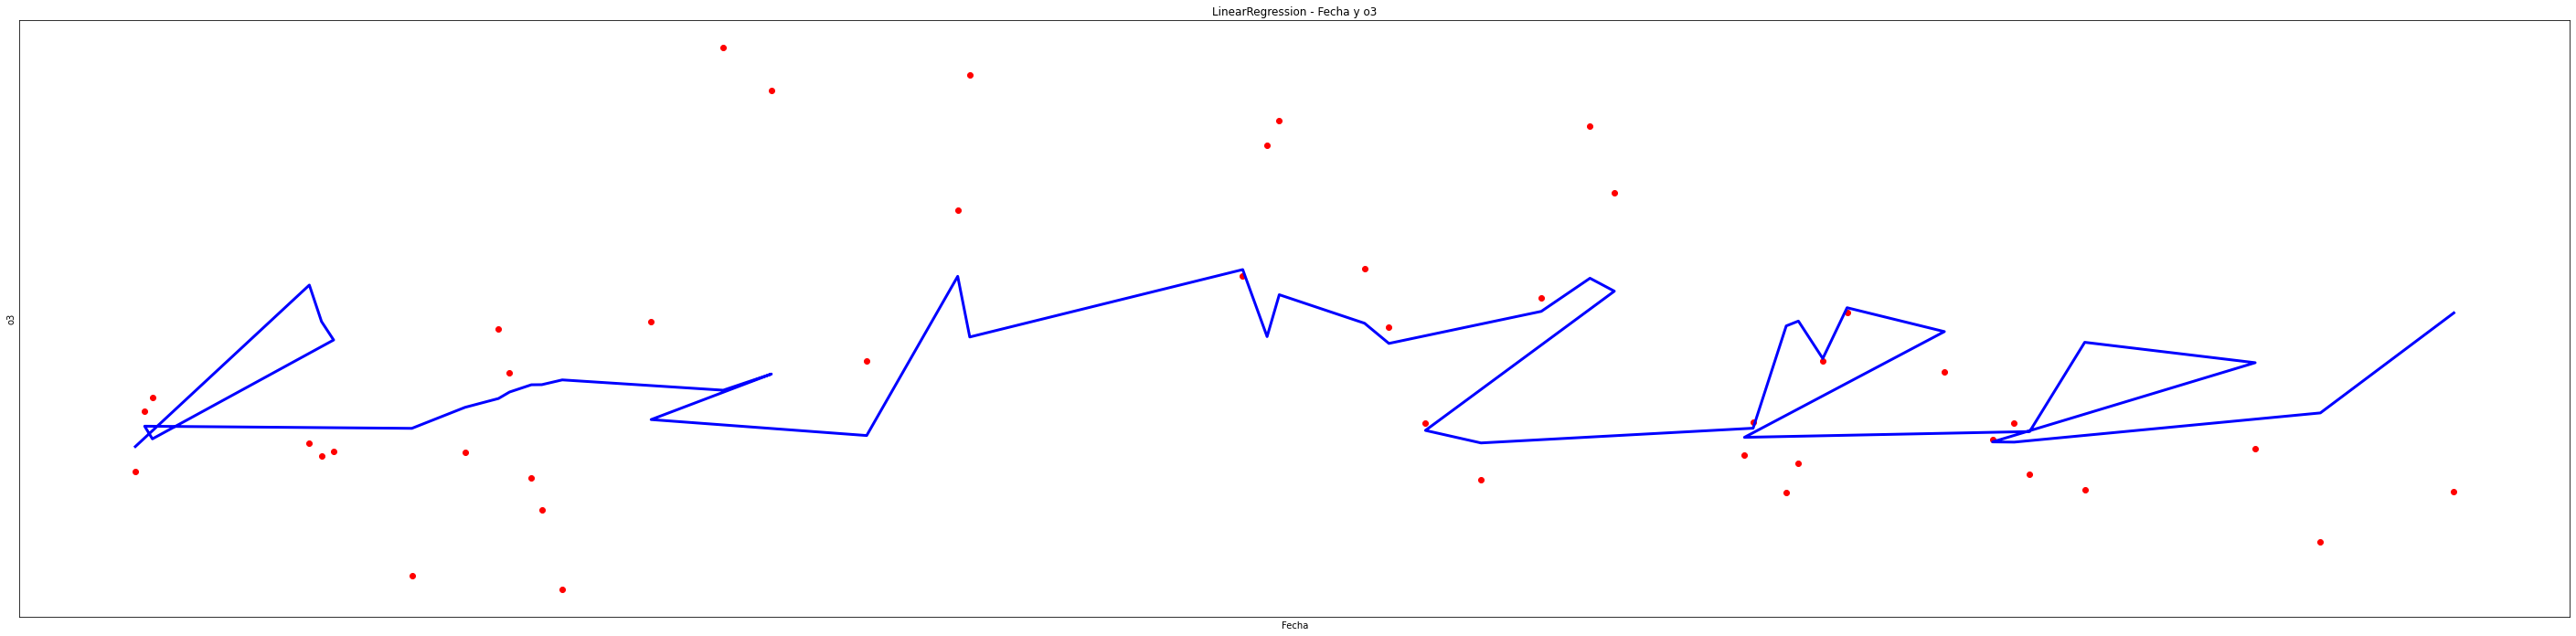

----------------------------------------------------DecisionTreeRegressor----------------------------------------------------
Mean squared error: 0.00027
Coefficient of determination: -1.52796


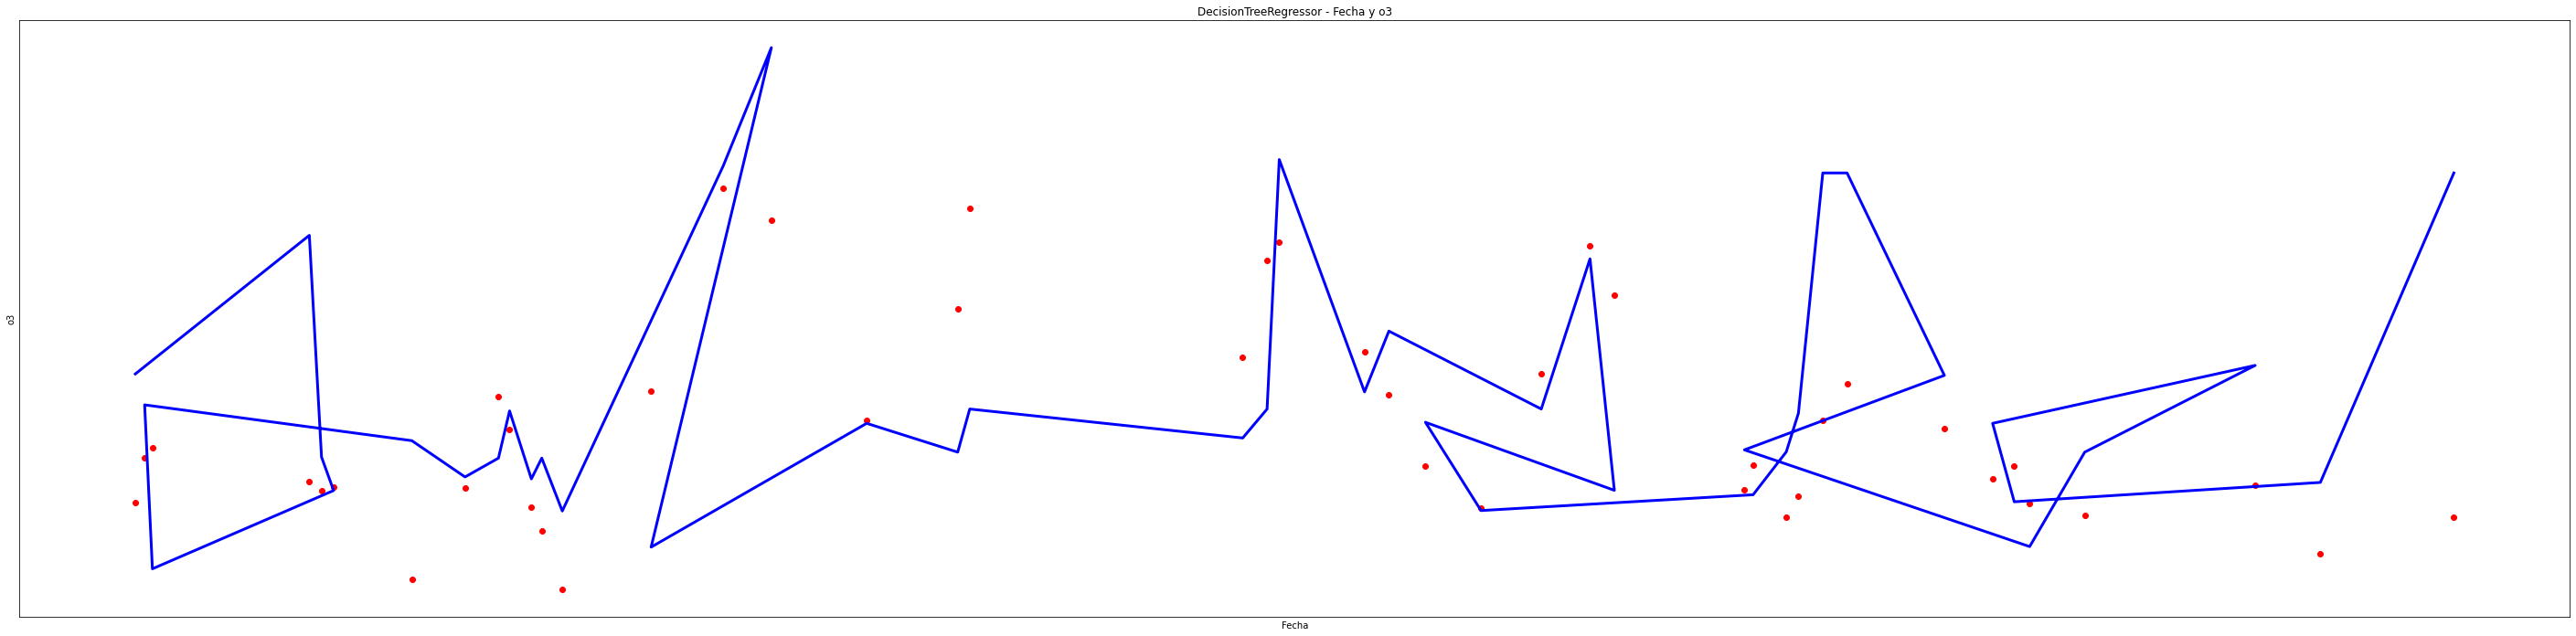

----------------------------------------------------MLPRegressor----------------------------------------------------
Mean squared error: 670882.81382
Coefficient of determination: -6210151843.59355


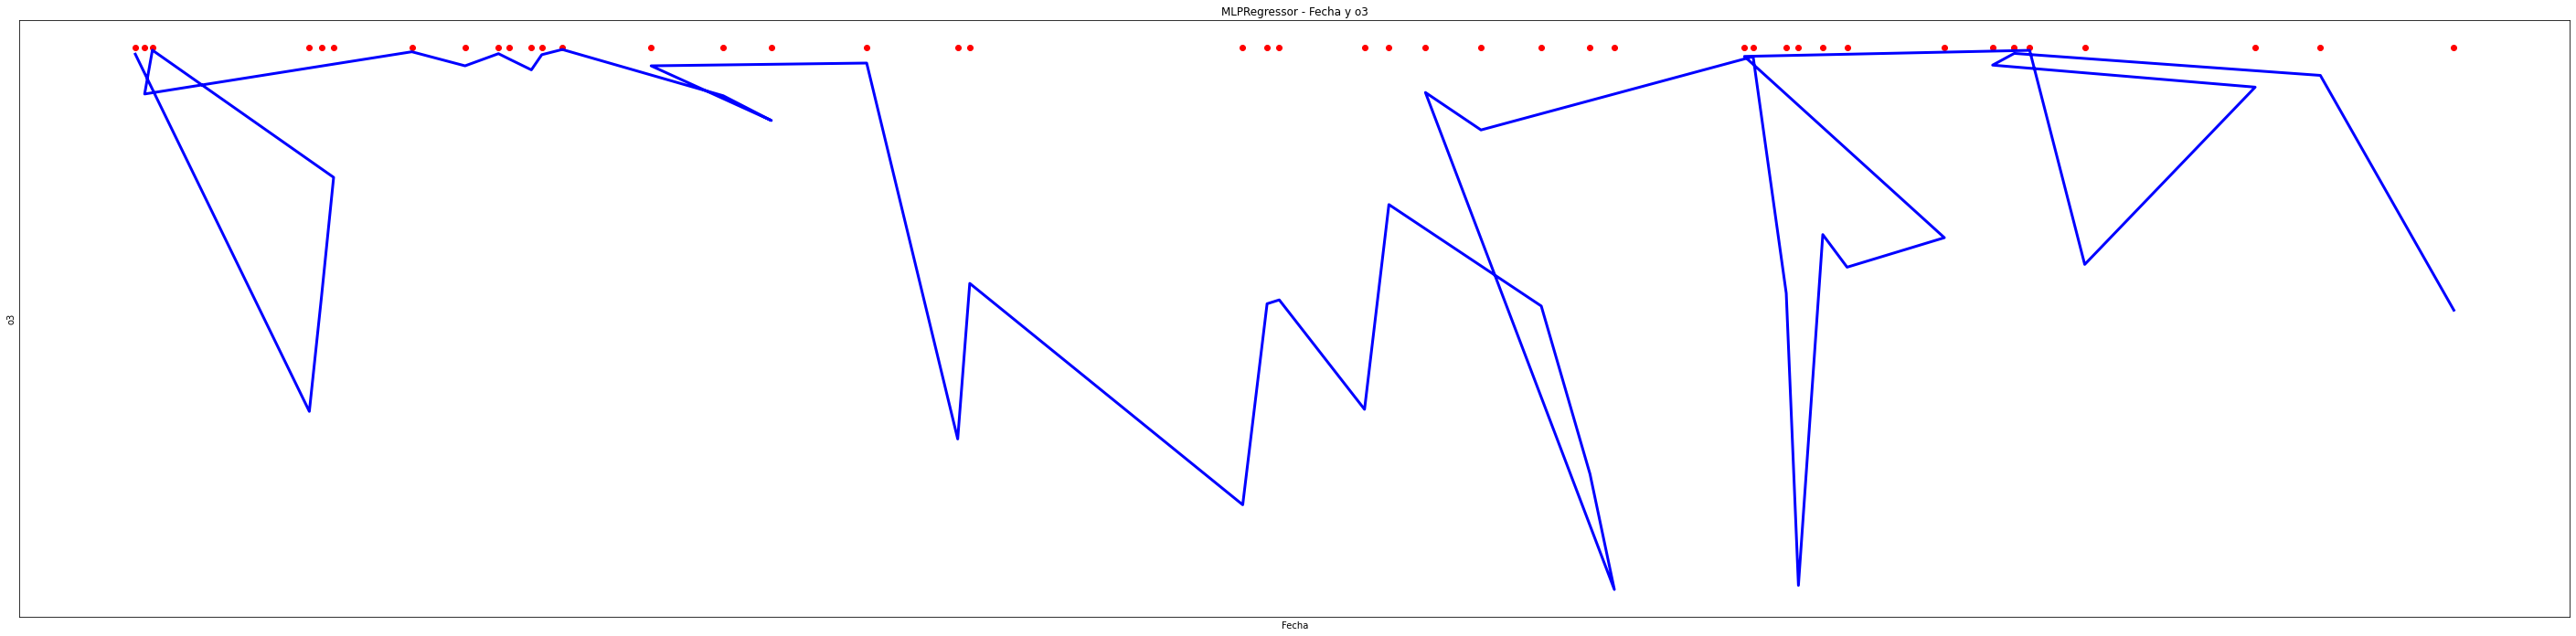

In [ ]:
train3141_sorted, test3141_sorted = train_test_split(data_3141_sorted, test_size=0.2)

test3141_sorted.sort_values(by='starttime', ascending=True, inplace=True)

trainS = train3141_sorted[['hour', 'trips', 'tripdistance', 'tripduration', 'o3']]
testS = test3141_sorted[['hour', 'trips', 'tripdistance', 'tripduration', 'o3']]

models3141_sorted = []
models3141_sorted.append(('LinearRegression', linear_model.LinearRegression()))
models3141_sorted.append(('DecisionTreeRegressor', DecisionTreeRegressor(random_state=0)))
models3141_sorted.append(('MLPRegressor', MLPRegressor(random_state=1, max_iter=5000)))

for name, model in models3141_sorted:
    model.fit(trainS.drop('o3', axis=1), trainS['o3'])
    y_pred = model.predict(testS.drop('o3', axis=1))

    print(f'----------------------------------------------------{name}----------------------------------------------------')
    if(name == 'LinearRegression'):
      print('Coefficients: \n', model.coef_)
    print('Mean squared error: %.5f'
          % mean_squared_error(test3141['o3'], y_pred))
    print('Coefficient of determination: %.5f'
          % r2_score(test3141['o3'], y_pred))
    
    plt.scatter(testS.index, testS['o3'],  color='red')
    plt.plot(testS.index, y_pred , color='blue', linewidth=3)

    plt.xticks(())
    plt.yticks(())
    plt.xlabel('Fecha')
    plt.ylabel('o3')
    plt.title(name + ' - Fecha y o3')
    plt.rcParams["figure.figsize"] = (50,12)
    plt.show()

## Estacion 3285


### Preparacion

In [ ]:
#Experiment with station 3285
data_3285 = data.query('startstationid == 3285')
data_3285 = data_3285[['hour', 'trips', 'tripdistance', 'tripduration', 'o3']]
data_3285.head()

hour  trips  tripdistance  tripduration        o3
40      0      3        4.6252          5870  0.016000
182     1      2        3.6419          1140  0.007000
315     2      2       15.8038          2369  0.022500
415     3     11       77.8570         10867  0.021818
495     4      6       28.3342          4374  0.025333

In [ ]:
data_3285.shape

(214, 5)

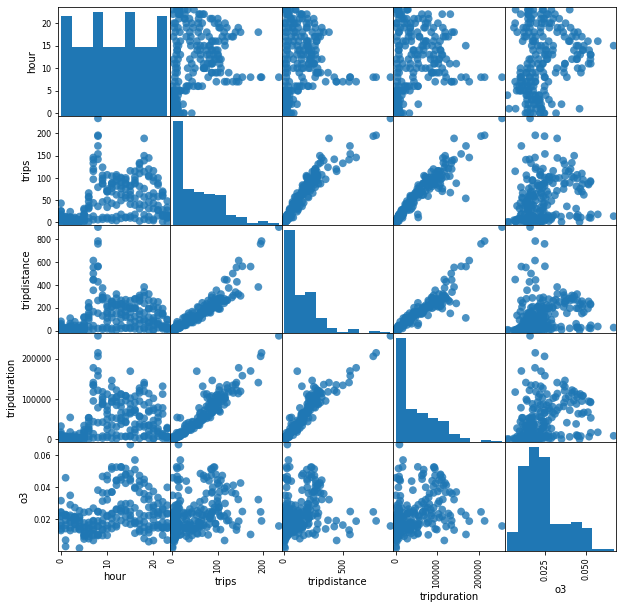

In [ ]:
pd.plotting.scatter_matrix(data_3285, figsize=(10,10), marker = 'o', hist_kwds = {'bins': 10}, s = 60, alpha = 0.8)
plt.show()

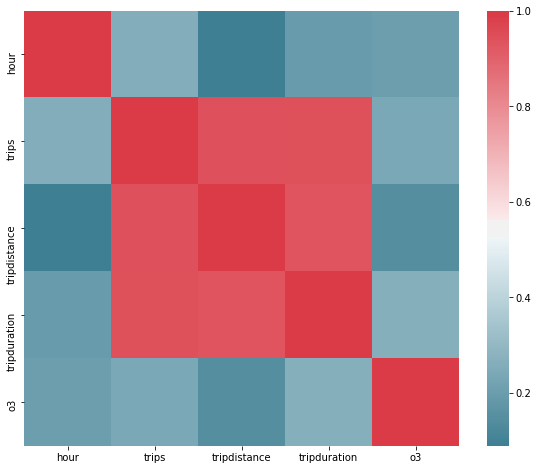

In [ ]:
f, ax = plt.subplots(figsize=(10, 8))
corr = data_3285.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)


In [ ]:
#data_3285.query('tripduration < 18000').tripduration.hist()
print(data_3285.query('tripduration < 18000').shape)
print(data_3285.shape)
#data_3131 = data_3131.query('tripduration < 18000')

(87, 5)
(214, 5)


###Experimentacion


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


----------------------------------------------------LinearRegression----------------------------------------------------
Coefficients: 
 [ 9.26301114e-06  8.45301818e-05 -7.56857136e-05  1.93251919e-07]
Mean squared error: 0.00017
Coefficient of determination: 0.20534


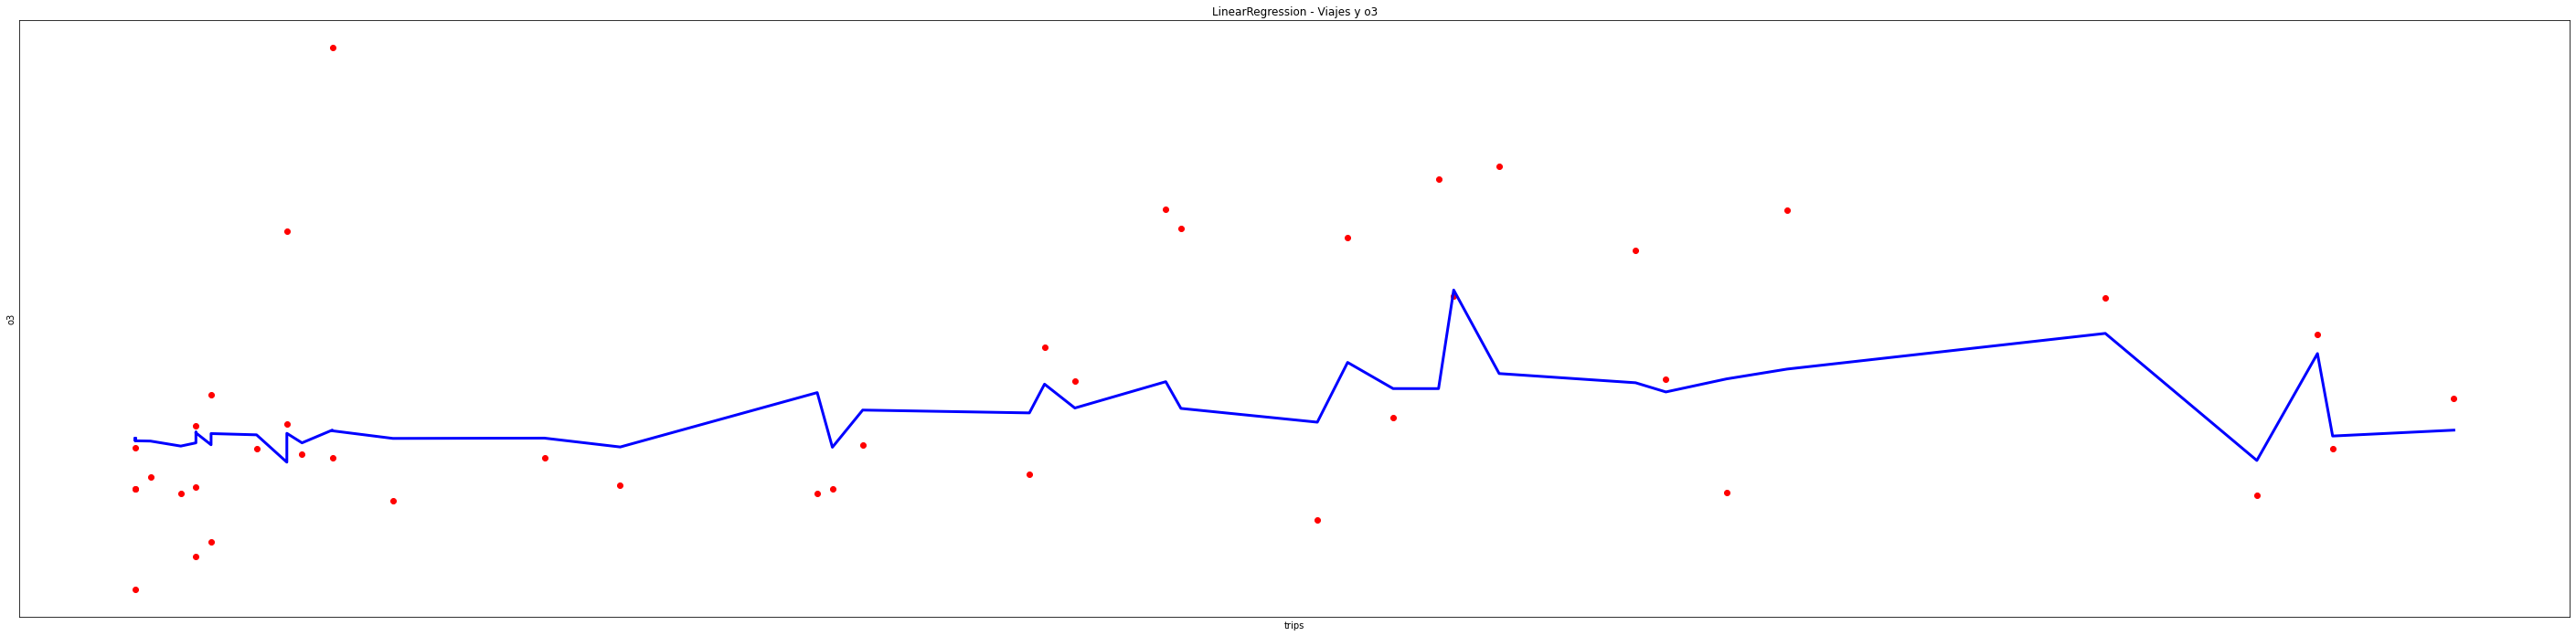

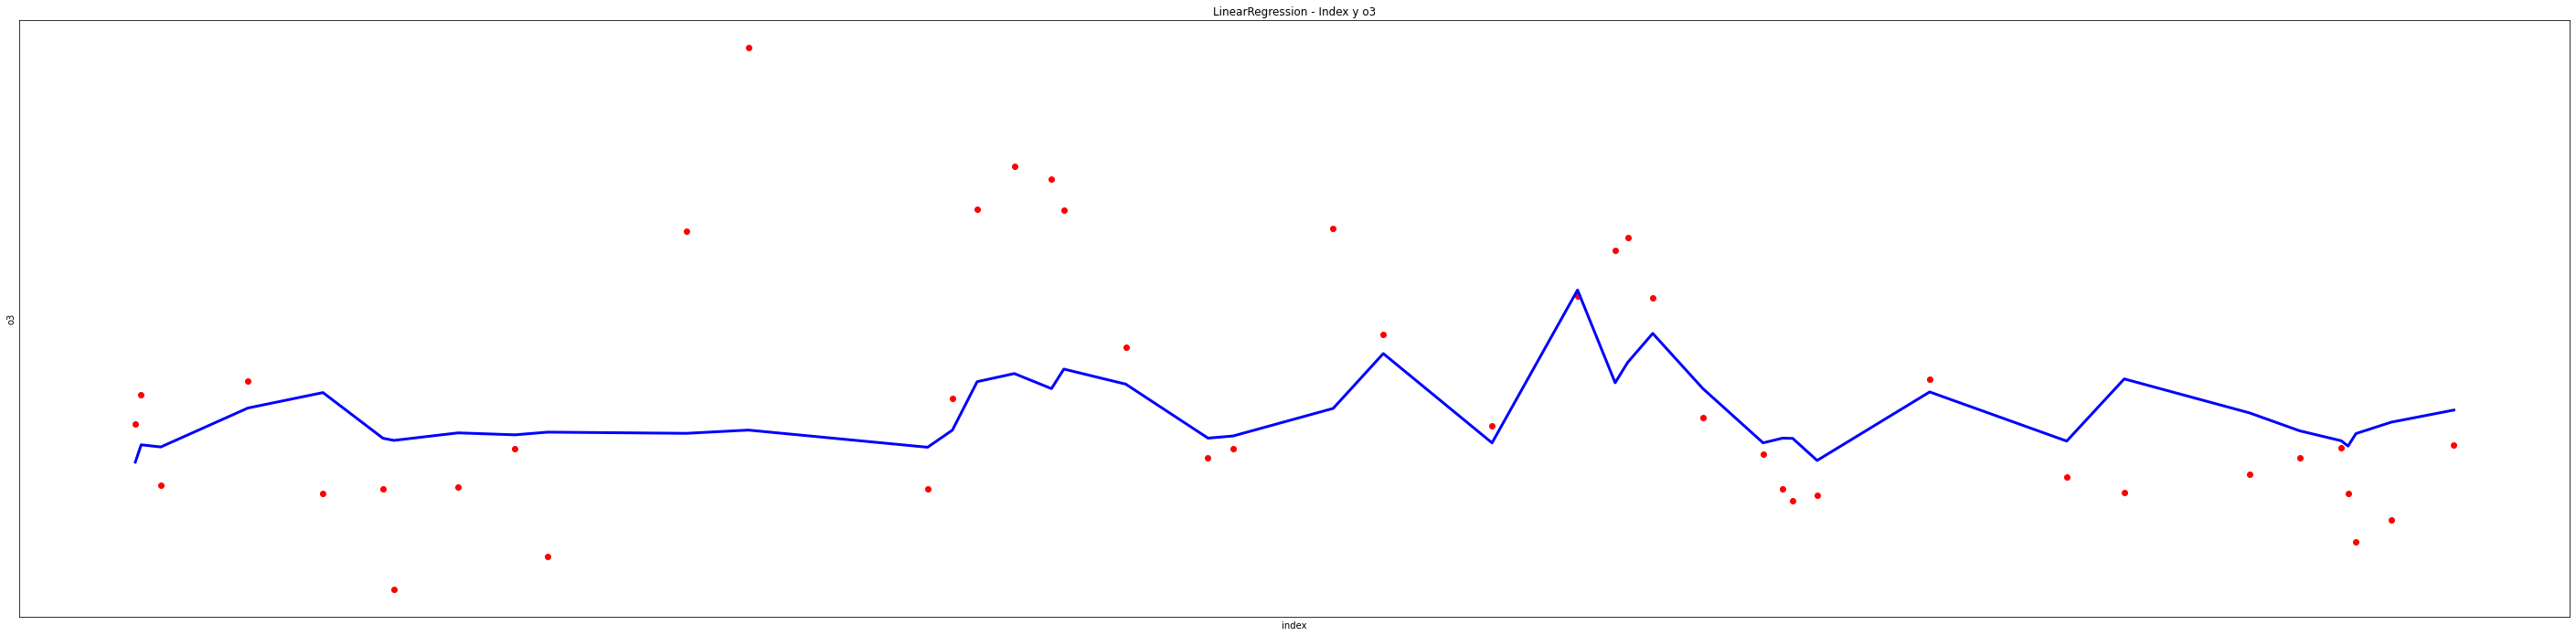

----------------------------------------------------DecisionTreeRegressor----------------------------------------------------
Mean squared error: 0.00016
Coefficient of determination: 0.24760


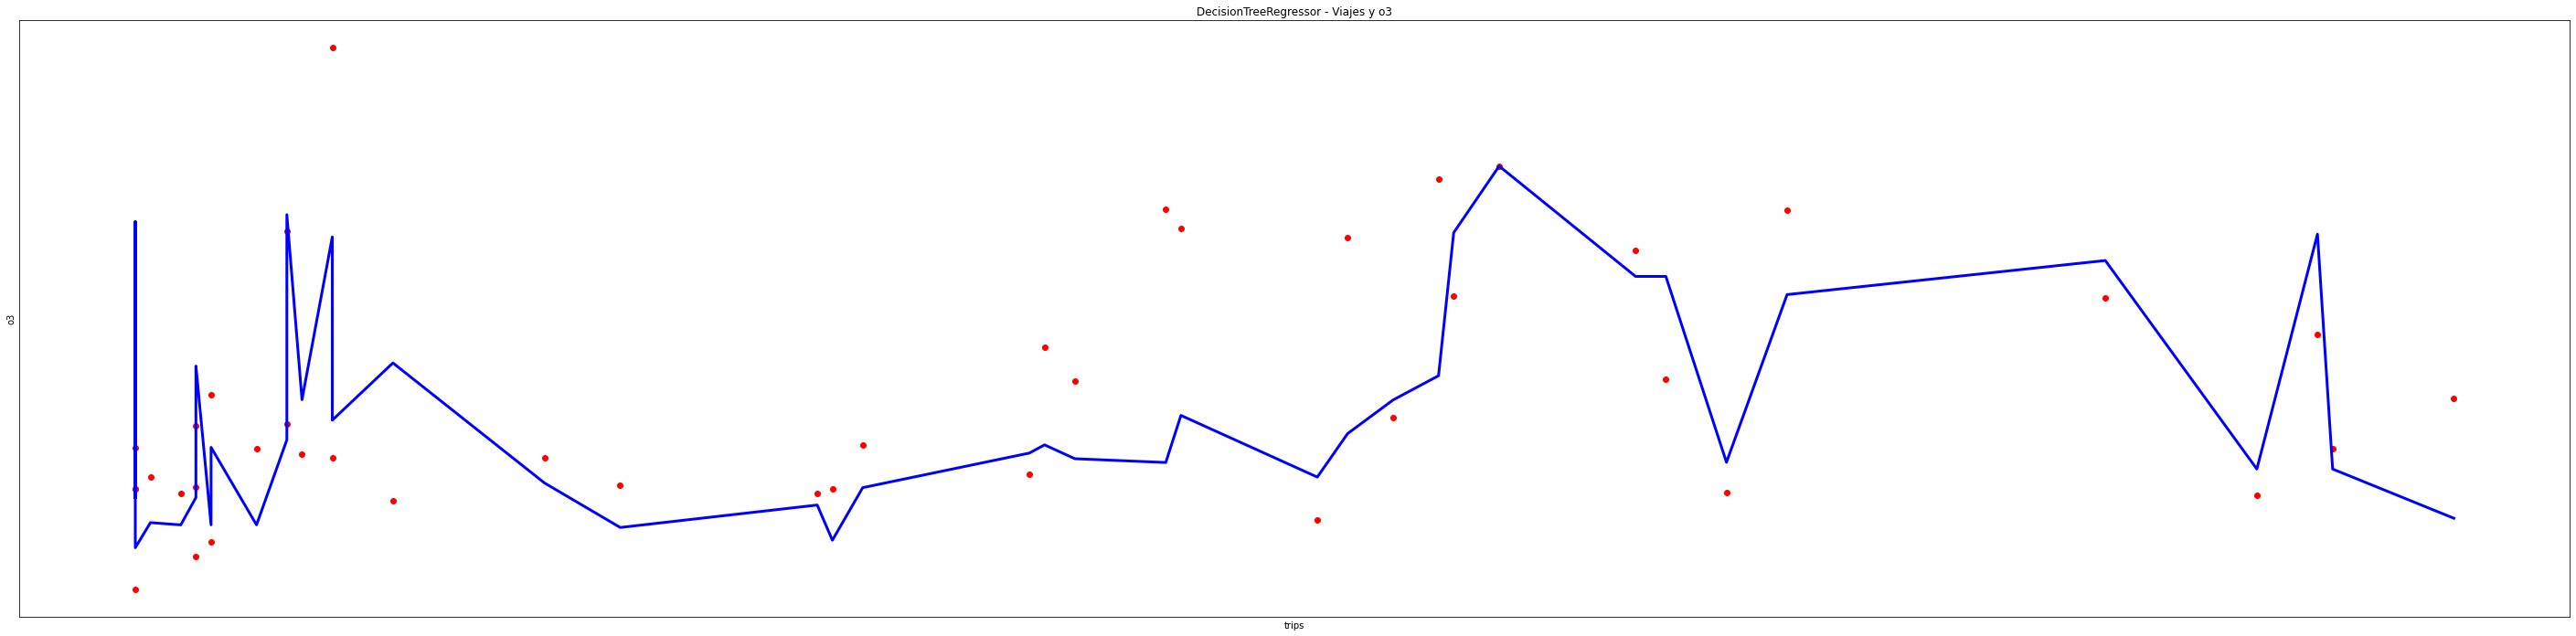

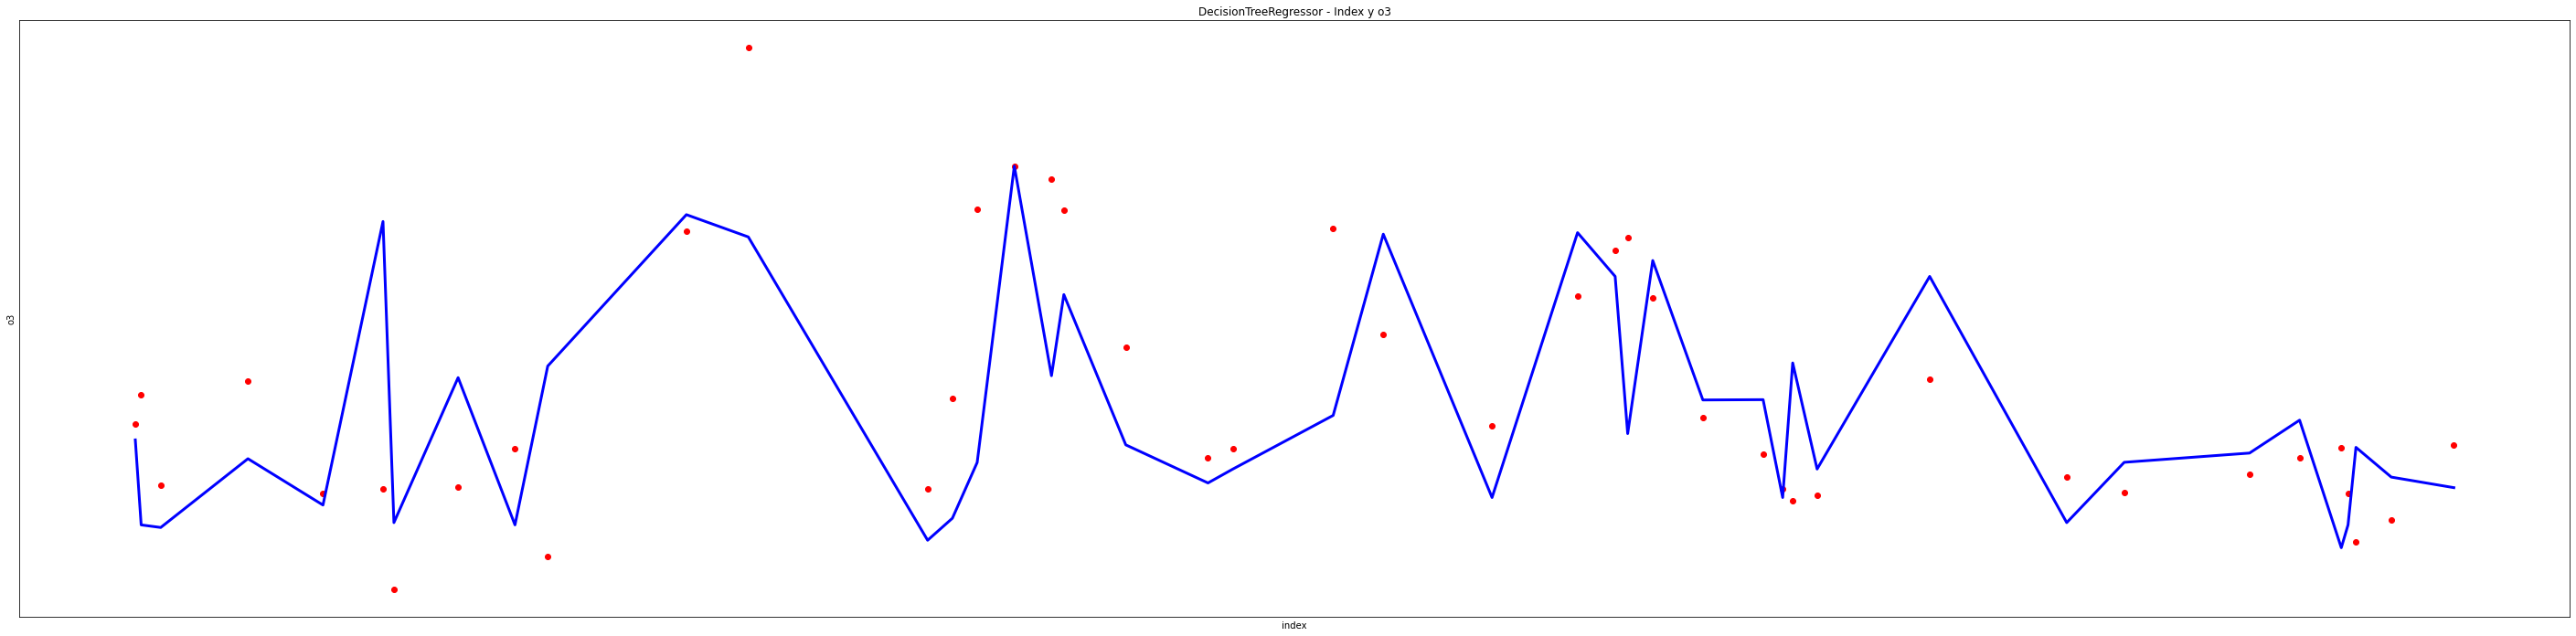

----------------------------------------------------MLPRegressor----------------------------------------------------
Mean squared error: 65739.47589
Coefficient of determination: -305993584.28957


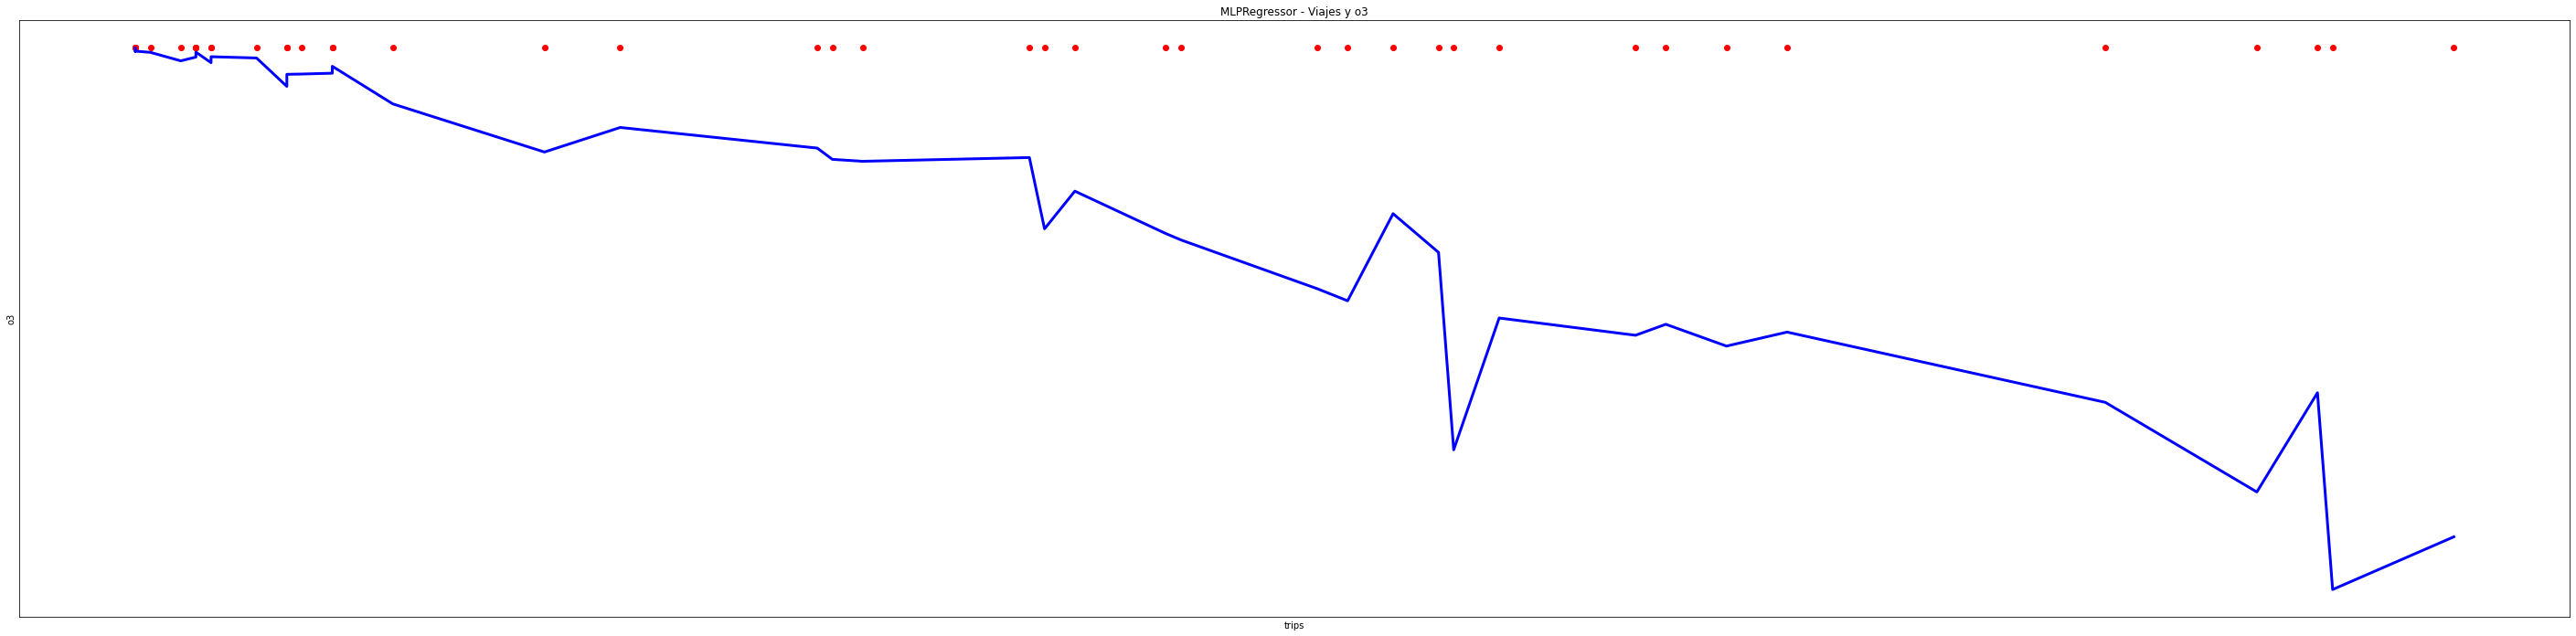

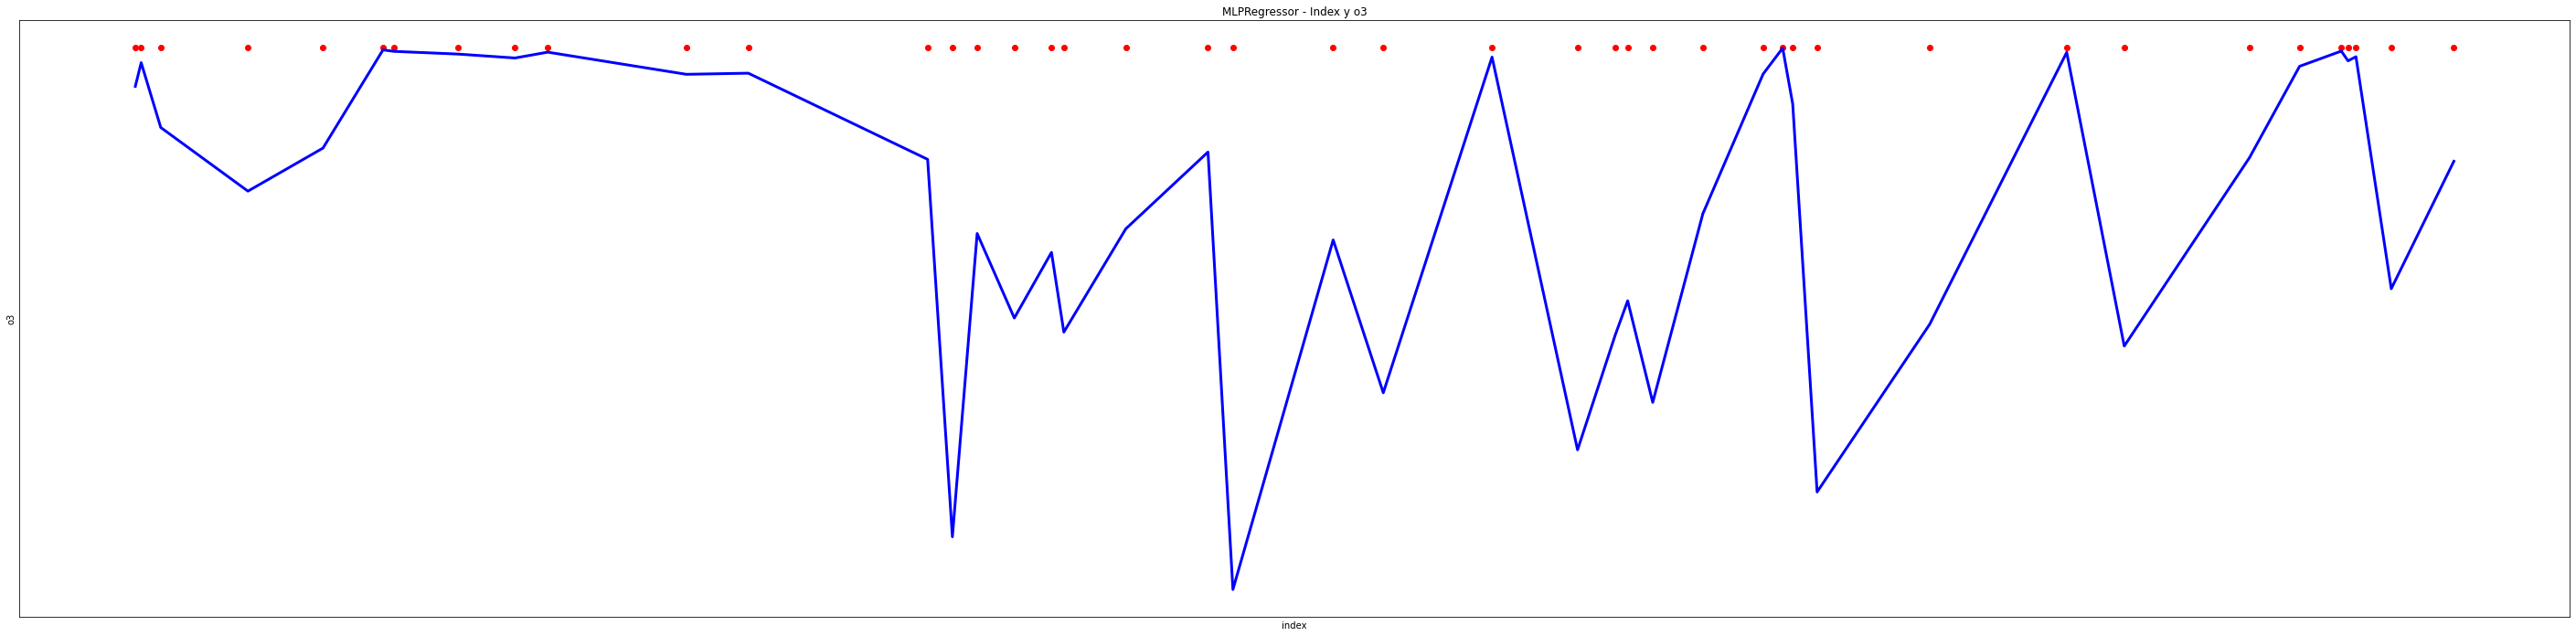

In [ ]:
train3285, test3285, = train_test_split(data_3285, test_size=0.2)

models3285 = []
models3285.append(('LinearRegression', linear_model.LinearRegression()))
models3285.append(('DecisionTreeRegressor', DecisionTreeRegressor(random_state=0)))
models3285.append(('MLPRegressor', MLPRegressor(random_state=1, max_iter=500)))

for name, model in models3285:
    test3285.sort_values(by='trips', ascending=True, inplace=True)
    model.fit(train3285.drop('o3', axis=1), train3285['o3'])
    y_pred = model.predict(test3285.drop('o3', axis=1))

    print(f'----------------------------------------------------{name}----------------------------------------------------')
    if(name == 'LinearRegression'):
      print('Coefficients: \n', model.coef_)
    print('Mean squared error: %.5f'
          % mean_squared_error(test3285['o3'], y_pred))
    print('Coefficient of determination: %.5f'
          % r2_score(test3285['o3'], y_pred))
    plt.scatter(test3285['trips'], test3285['o3'],  color='red')
    plt.plot(test3285['trips'], y_pred , color='blue', linewidth=3)

    plt.xticks(())
    plt.yticks(())
    plt.xlabel('trips')
    plt.ylabel('o3')
    plt.title(name + ' - Viajes y o3')
    plt.rcParams["figure.figsize"] = (50,12)
    plt.show()

    test3285 = test3285.sort_index(axis = 0) 
    y_pred = model.predict(test3285.drop('o3', axis=1))
    # Plot outputs
    plt.scatter(test3285.index, test3285['o3'],  color='red')
    plt.plot(test3285.index, y_pred , color='blue', linewidth=3)

    plt.xticks(())
    plt.yticks(())
    plt.xlabel('index')
    plt.ylabel('o3')
    plt.title(name + ' - Index y o3')
    plt.rcParams["figure.figsize"] = (50,12)
    plt.show()

## Estacion 3167

###Preparacion

In [ ]:
#Experiment with station 3167
data_3167 = data.query('startstationid == 3167')
data_3167 = data_3167[['hour', 'trips', 'tripdistance', 'tripduration', 'o3']]
data_3167.head()

hour  trips  tripdistance  tripduration        o3
26      0     13       22.7819          5989  0.017692
171     1      5        4.1956          1519  0.019600
302     2      5        8.2206          1766  0.009000
409     3      2        0.0000          3511  0.009000
485     4      8       25.7689          6892  0.022625

In [ ]:
data_3167.shape

(213, 5)

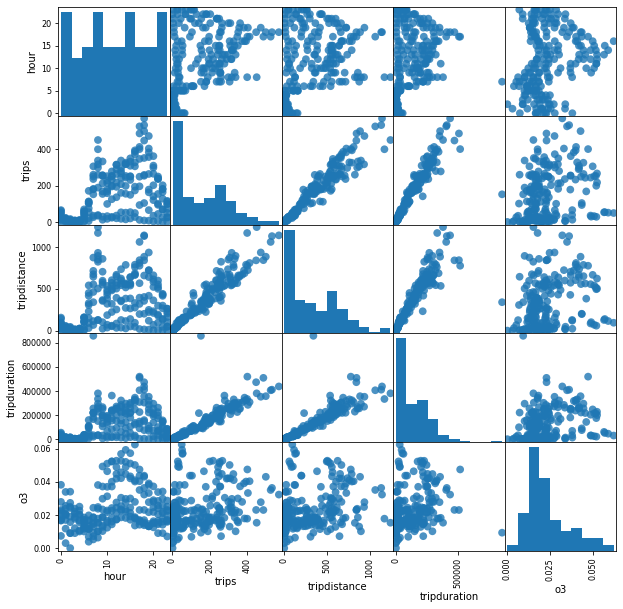

In [ ]:
pd.plotting.scatter_matrix(data_3167, figsize=(10,10), marker = 'o', hist_kwds = {'bins': 10}, s = 60, alpha = 0.8)
plt.show()

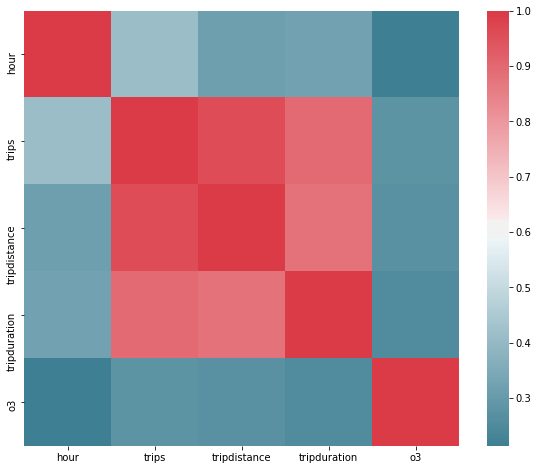

In [ ]:
f, ax = plt.subplots(figsize=(10, 8))
corr = data_3167.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [ ]:
#data_3131.query('tripduration < 18000').tripduration.hist()
print(data_3167.query('tripduration < 18000').shape)
print(data_3167.shape)
#data_3131 = data_3131.query('tripduration < 18000')

(55, 5)
(213, 5)


###Experimentacion

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


----------------------------------------------------LinearRegression----------------------------------------------------
Coefficients: 
 [ 2.31999509e-04 -3.88172804e-06  1.23120153e-05 -1.85377311e-09]
Mean squared error: 0.00014
Coefficient of determination: 0.03463


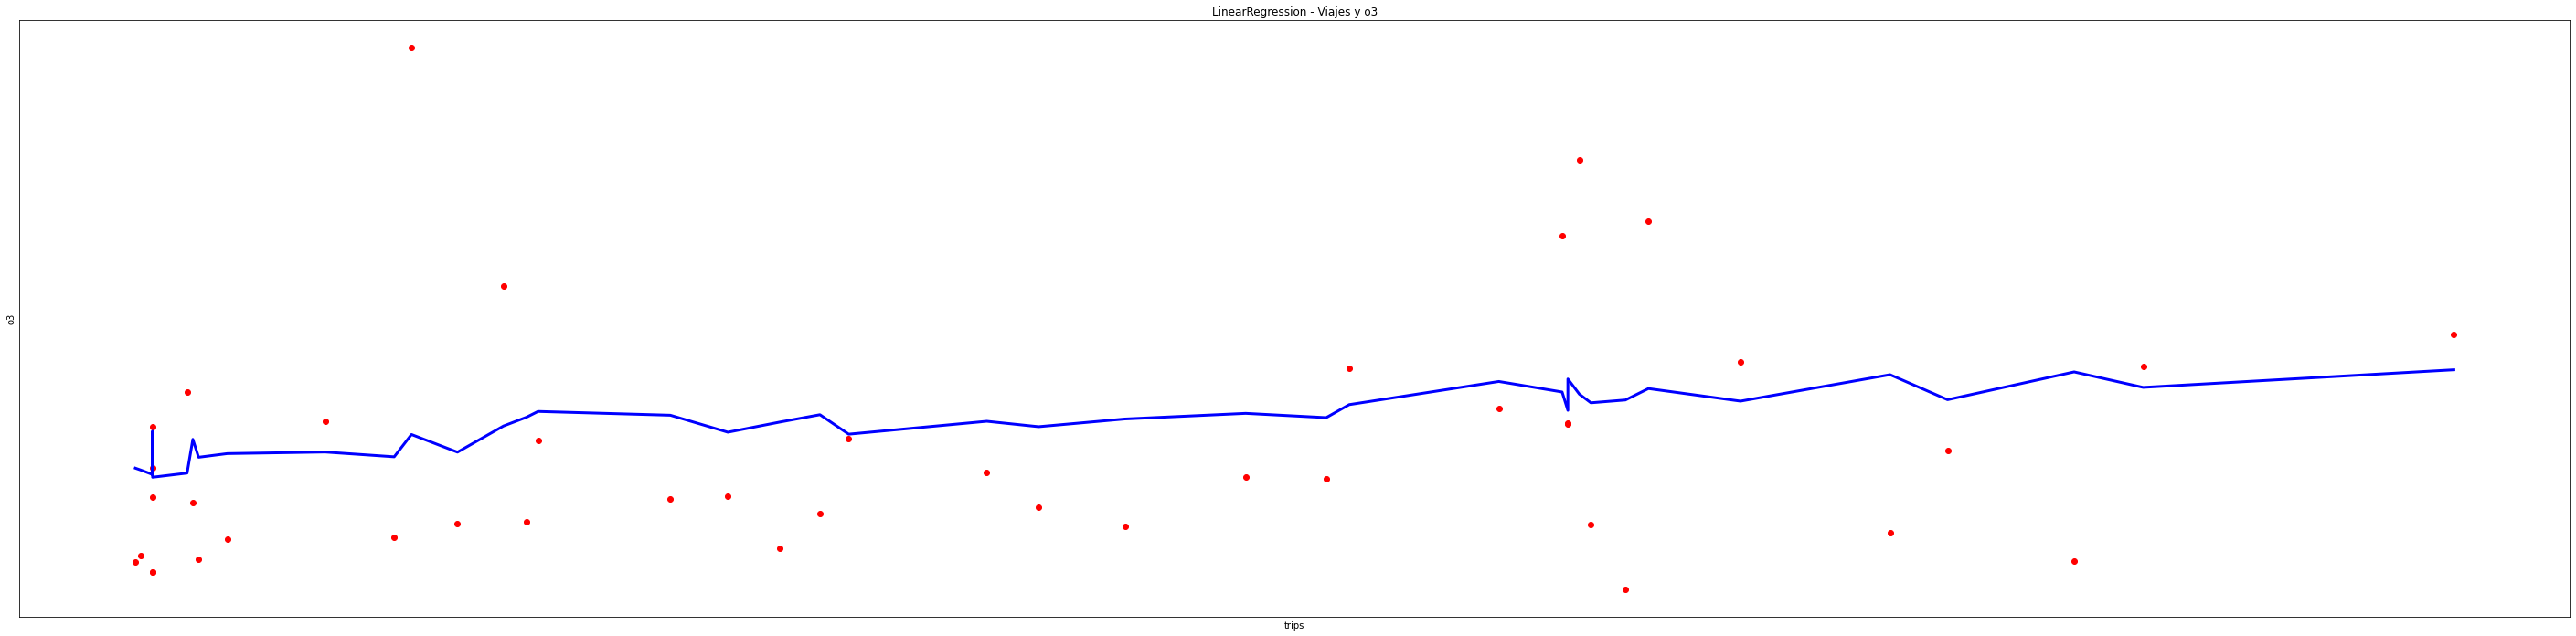

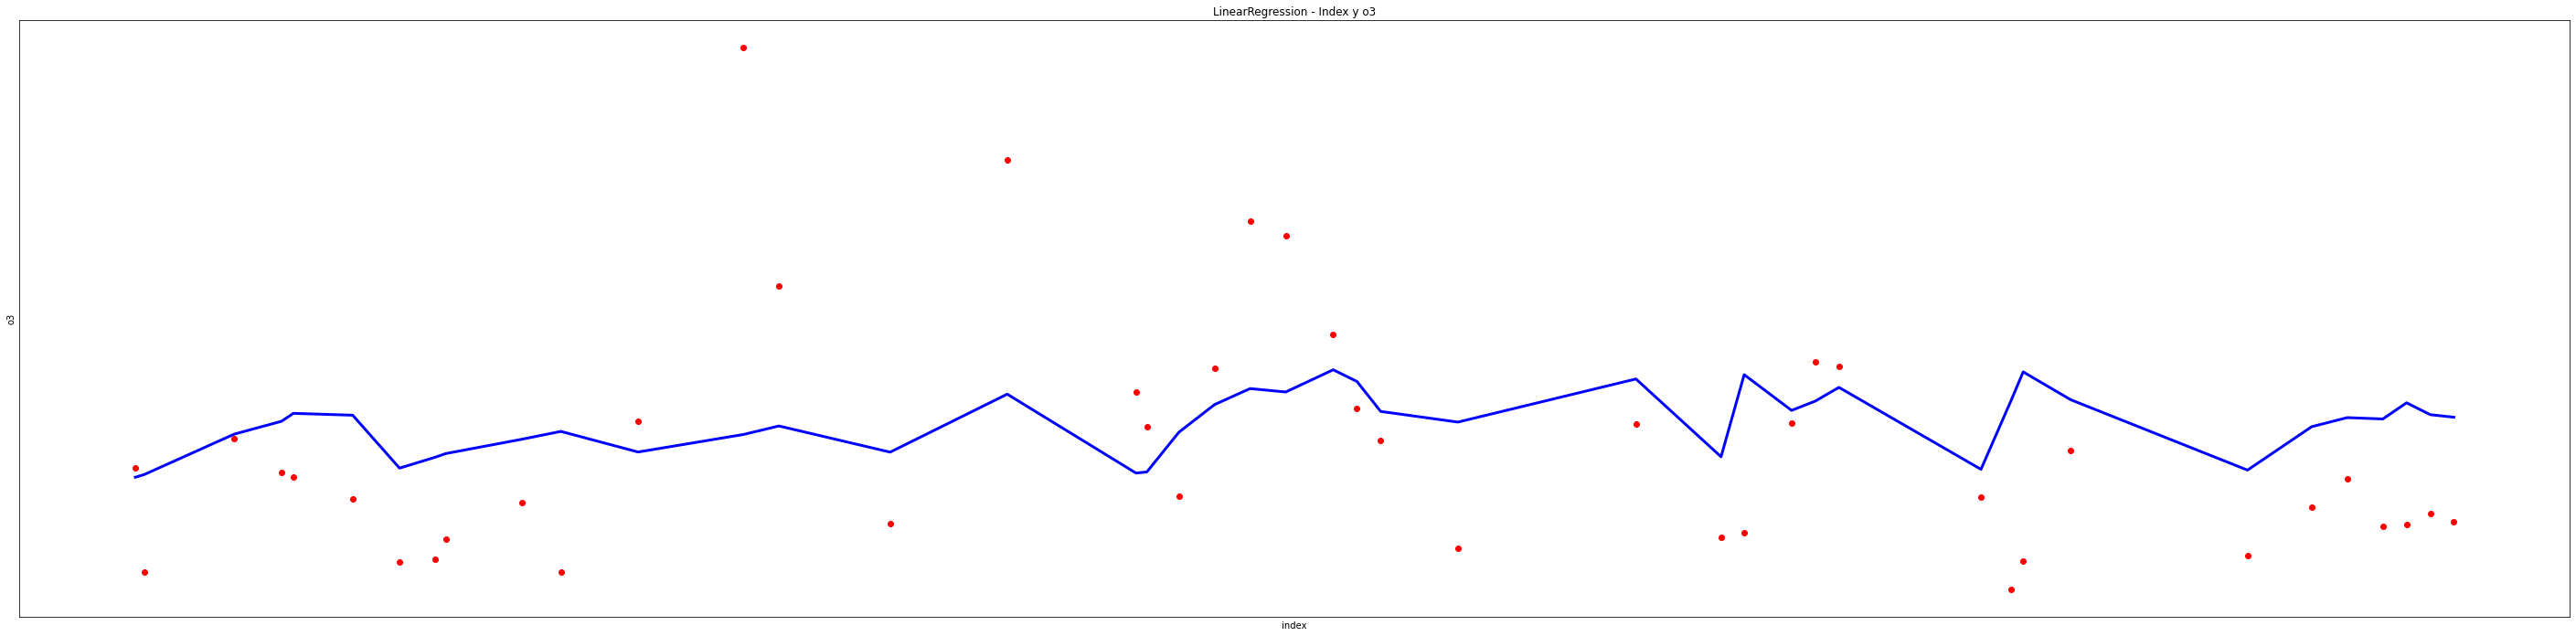

----------------------------------------------------DecisionTreeRegressor----------------------------------------------------
Mean squared error: 0.00009
Coefficient of determination: 0.35436


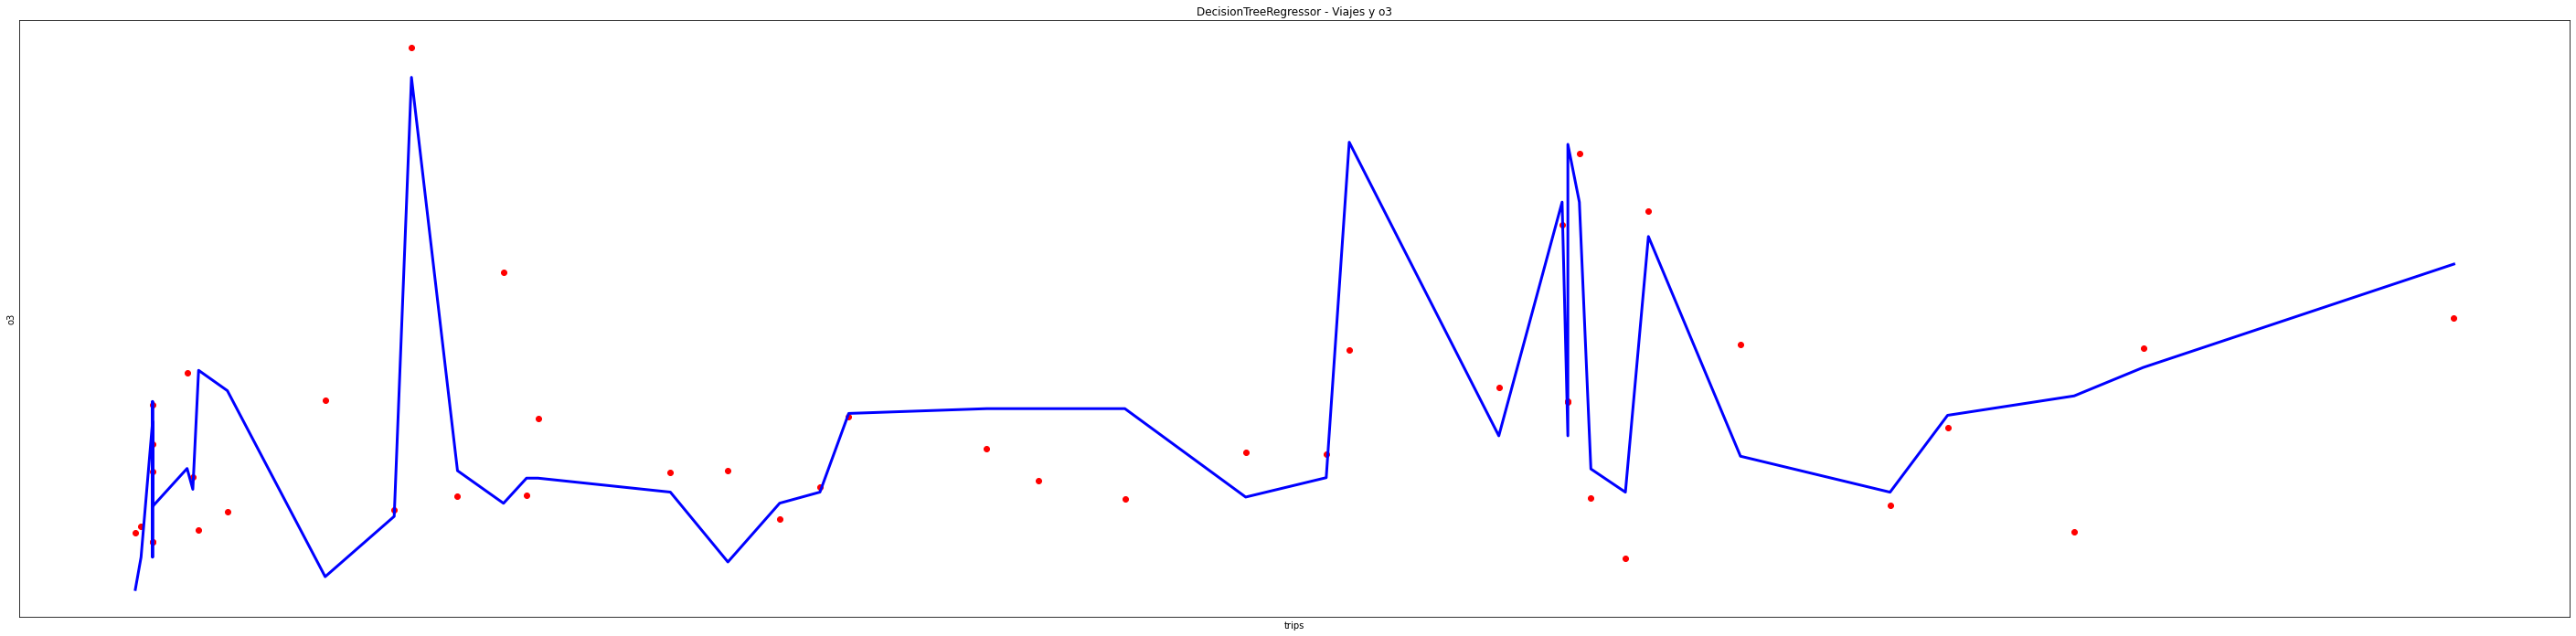

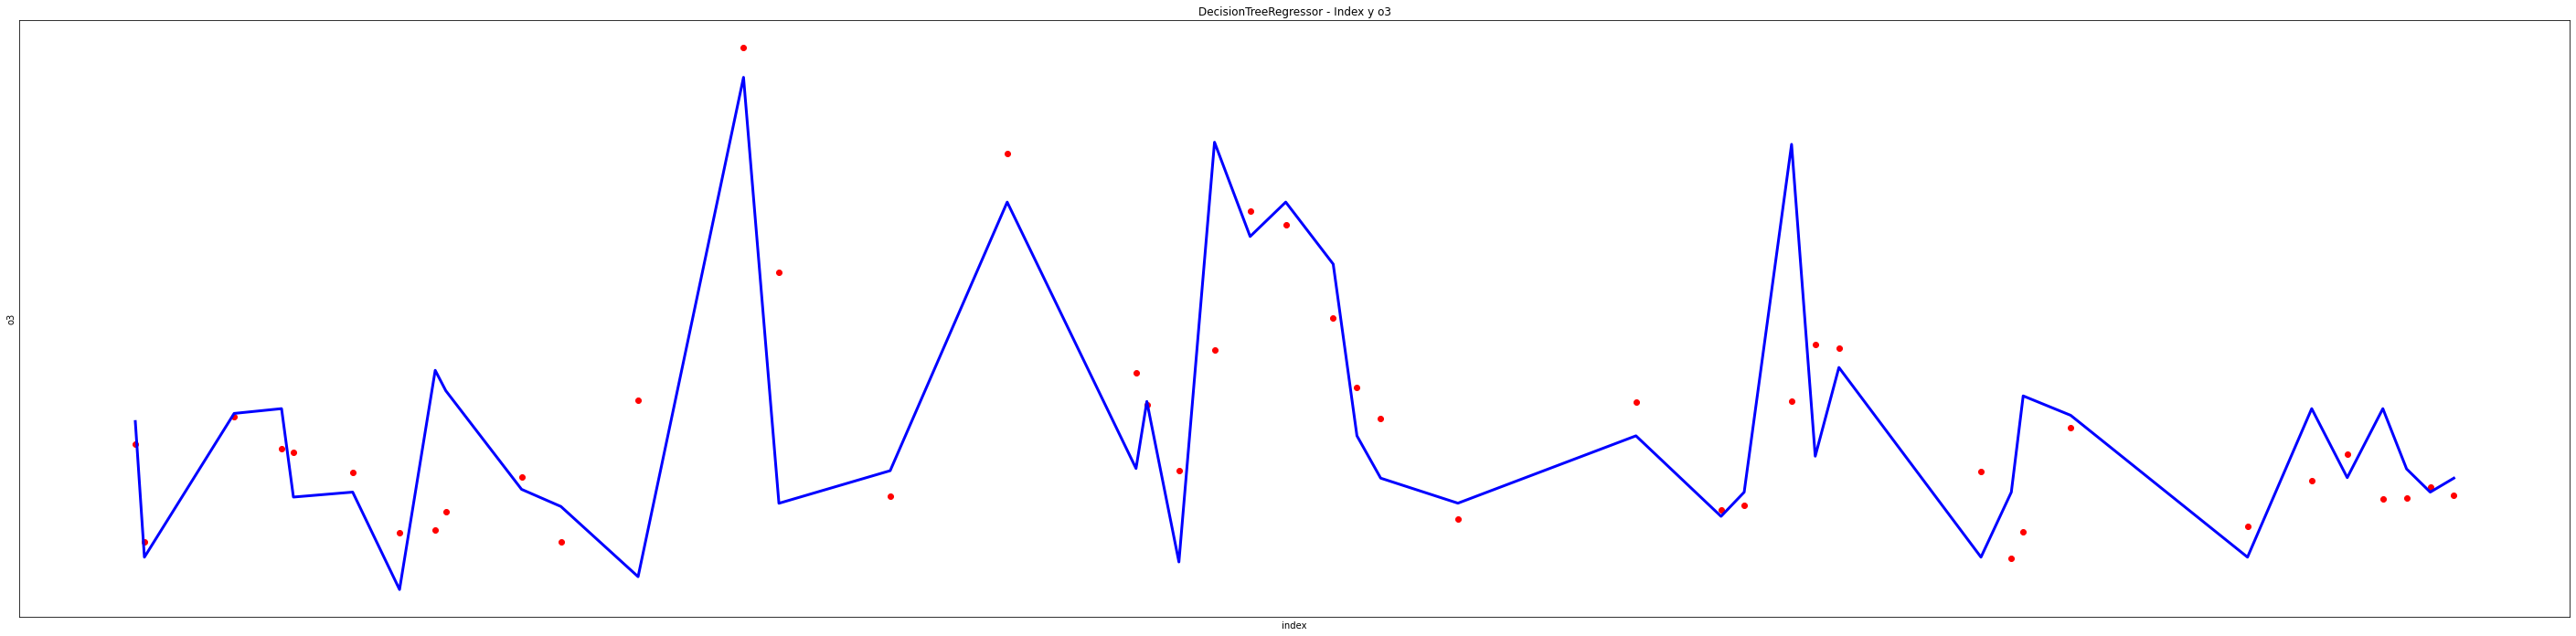

----------------------------------------------------MLPRegressor----------------------------------------------------
Mean squared error: 320549.37708
Coefficient of determination: -2269991862.27587


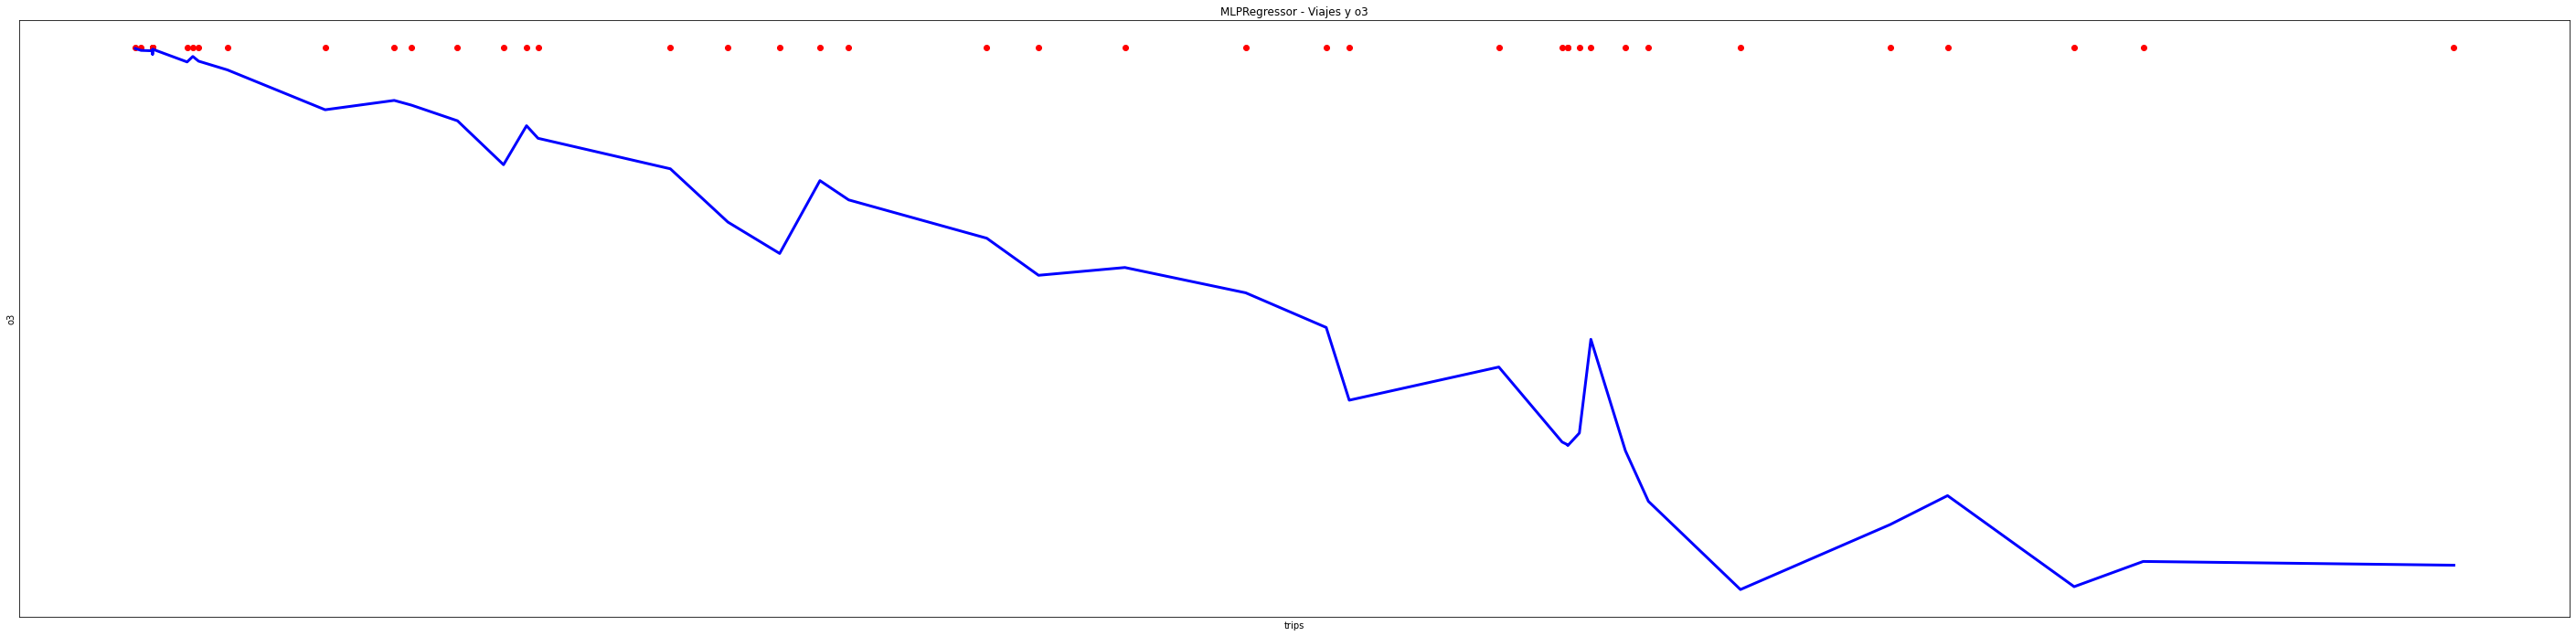

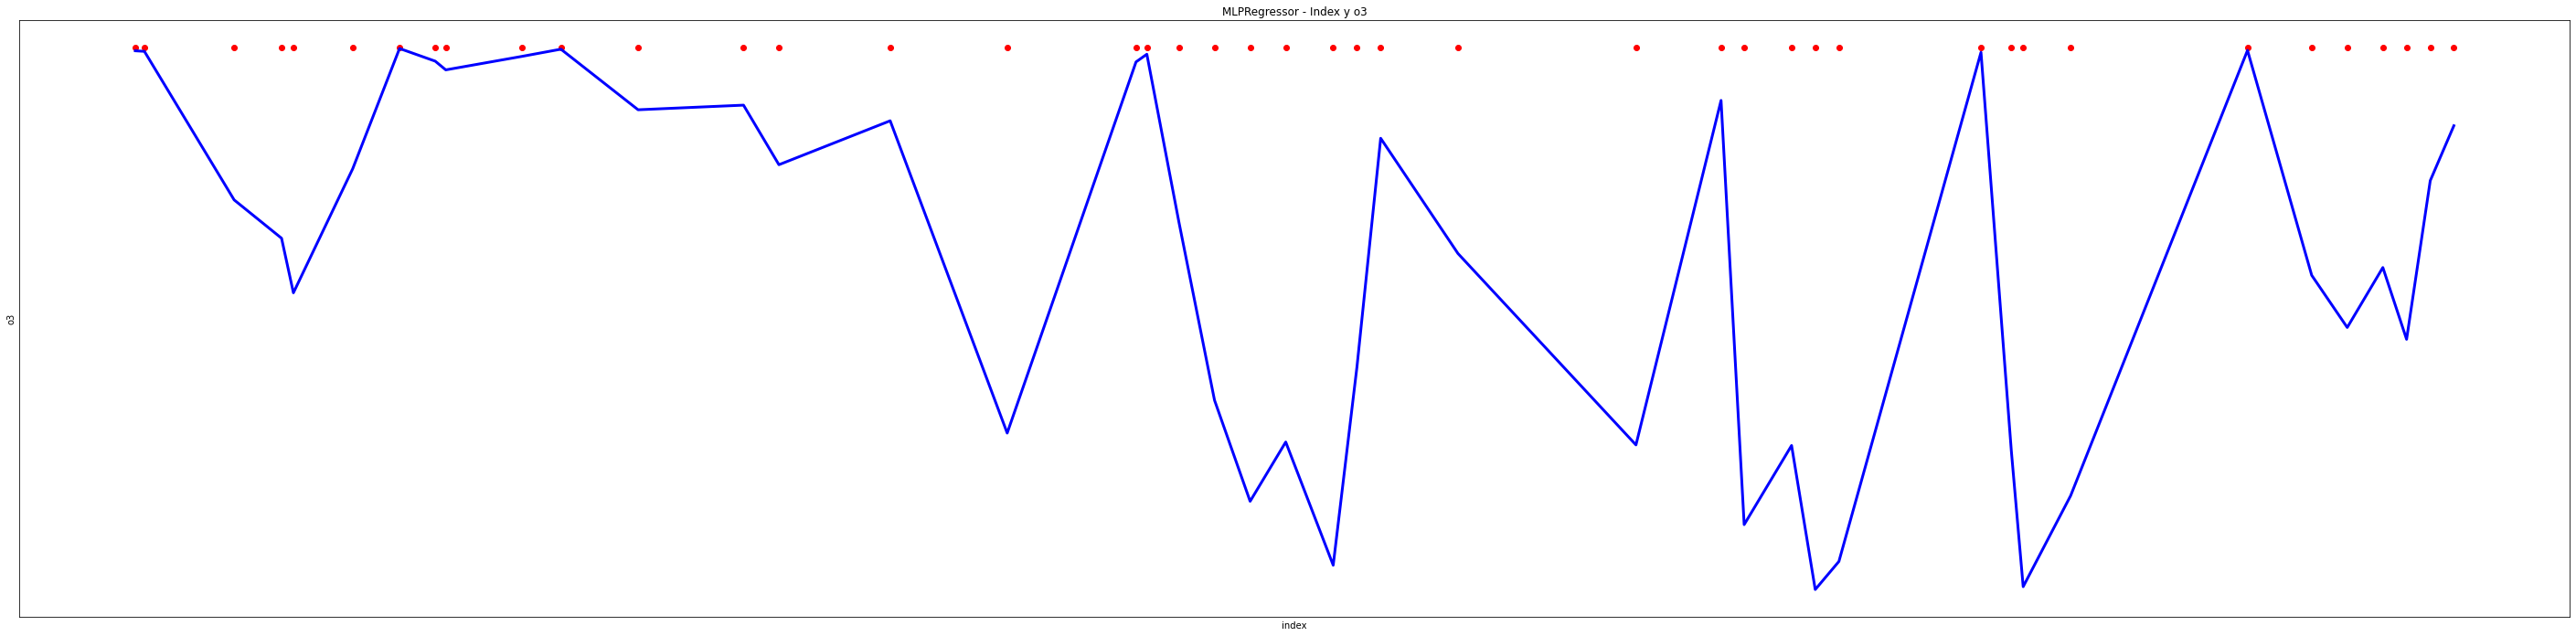

In [ ]:
train3167, test3167, = train_test_split(data_3167, test_size=0.2)

models3167 = []
models3167.append(('LinearRegression', linear_model.LinearRegression()))
models3167.append(('DecisionTreeRegressor', DecisionTreeRegressor(random_state=0)))
models3167.append(('MLPRegressor', MLPRegressor(random_state=1, max_iter=500)))

for name, model in models3167:
    test3167.sort_values(by='trips', ascending=True, inplace=True)
    model.fit(train3167.drop('o3', axis=1), train3167['o3'])
    y_pred = model.predict(test3167.drop('o3', axis=1))

    print(f'----------------------------------------------------{name}----------------------------------------------------')
    if(name == 'LinearRegression'):
      print('Coefficients: \n', model.coef_)
    print('Mean squared error: %.5f'
          % mean_squared_error(test3167['o3'], y_pred))
    print('Coefficient of determination: %.5f'
          % r2_score(test3167['o3'], y_pred))
    plt.scatter(test3167['trips'], test3167['o3'],  color='red')
    plt.plot(test3167['trips'], y_pred , color='blue', linewidth=3)

    plt.xticks(())
    plt.yticks(())
    plt.xlabel('trips')
    plt.ylabel('o3')
    plt.title(name + ' - Viajes y o3')
    plt.rcParams["figure.figsize"] = (50,12)
    plt.show()

    test3167 = test3167.sort_index(axis = 0) 
    y_pred = model.predict(test3167.drop('o3', axis=1))
    # Plot outputs
    plt.scatter(test3167.index, test3167['o3'],  color='red')
    plt.plot(test3167.index, y_pred , color='blue', linewidth=3)

    plt.xticks(())
    plt.yticks(())
    plt.xlabel('index')
    plt.ylabel('o3')
    plt.title(name + ' - Index y o3')
    plt.rcParams["figure.figsize"] = (50,12)
    plt.show()

## Estacion 3164

###Preparacion

In [ ]:
#Experiment with station 3164
data_3164 = data.query('startstationid == 3164')
data_3164 = data_3164[['hour', 'trips', 'tripdistance', 'tripduration', 'o3']]
data_3164.head()

hour  trips  tripdistance  tripduration       o3
23      0     25       34.8054         15402  0.01896
169     1      8       17.3071          6124  0.00950
300     2      5       15.9423          5626  0.00200
407     3      2        2.2483           469  0.01150
483     4      1        3.4150           489  0.00600

In [ ]:
data_3164.shape

(213, 5)

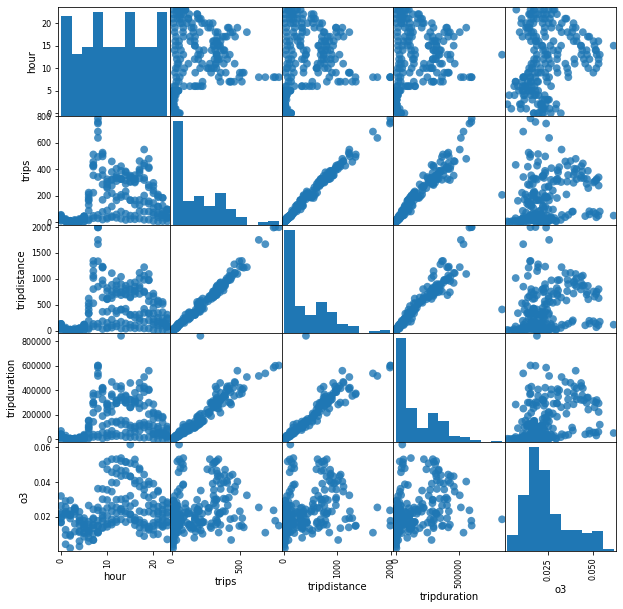

In [ ]:
pd.plotting.scatter_matrix(data_3164, figsize=(10,10), marker = 'o', hist_kwds = {'bins': 10}, s = 60, alpha = 0.8)
plt.show()

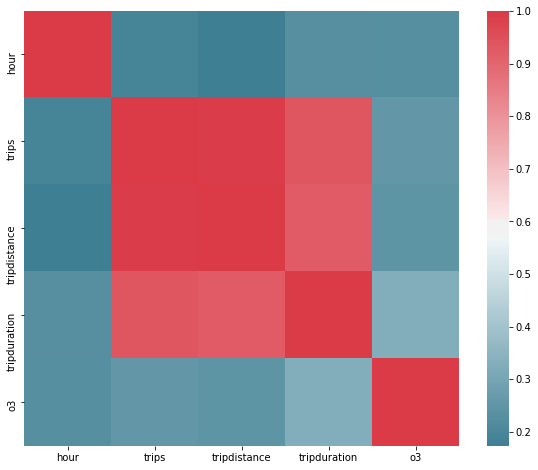

In [ ]:
f, ax = plt.subplots(figsize=(10, 8))
corr = data_3164.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [ ]:
#data_3131.query('tripduration < 18000').tripduration.hist()
print(data_3164.query('tripduration < 18000').shape)
print(data_3164.shape)
#data_3131 = data_3131.query('tripduration < 18000')

(51, 5)
(213, 5)


###Experimentacion

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


----------------------------------------------------LinearRegression----------------------------------------------------
Coefficients: 
 [ 1.30806370e-04 -9.14004494e-05 -6.82111403e-06  1.43865297e-07]
Mean squared error: 0.00037
Coefficient of determination: -1.18283


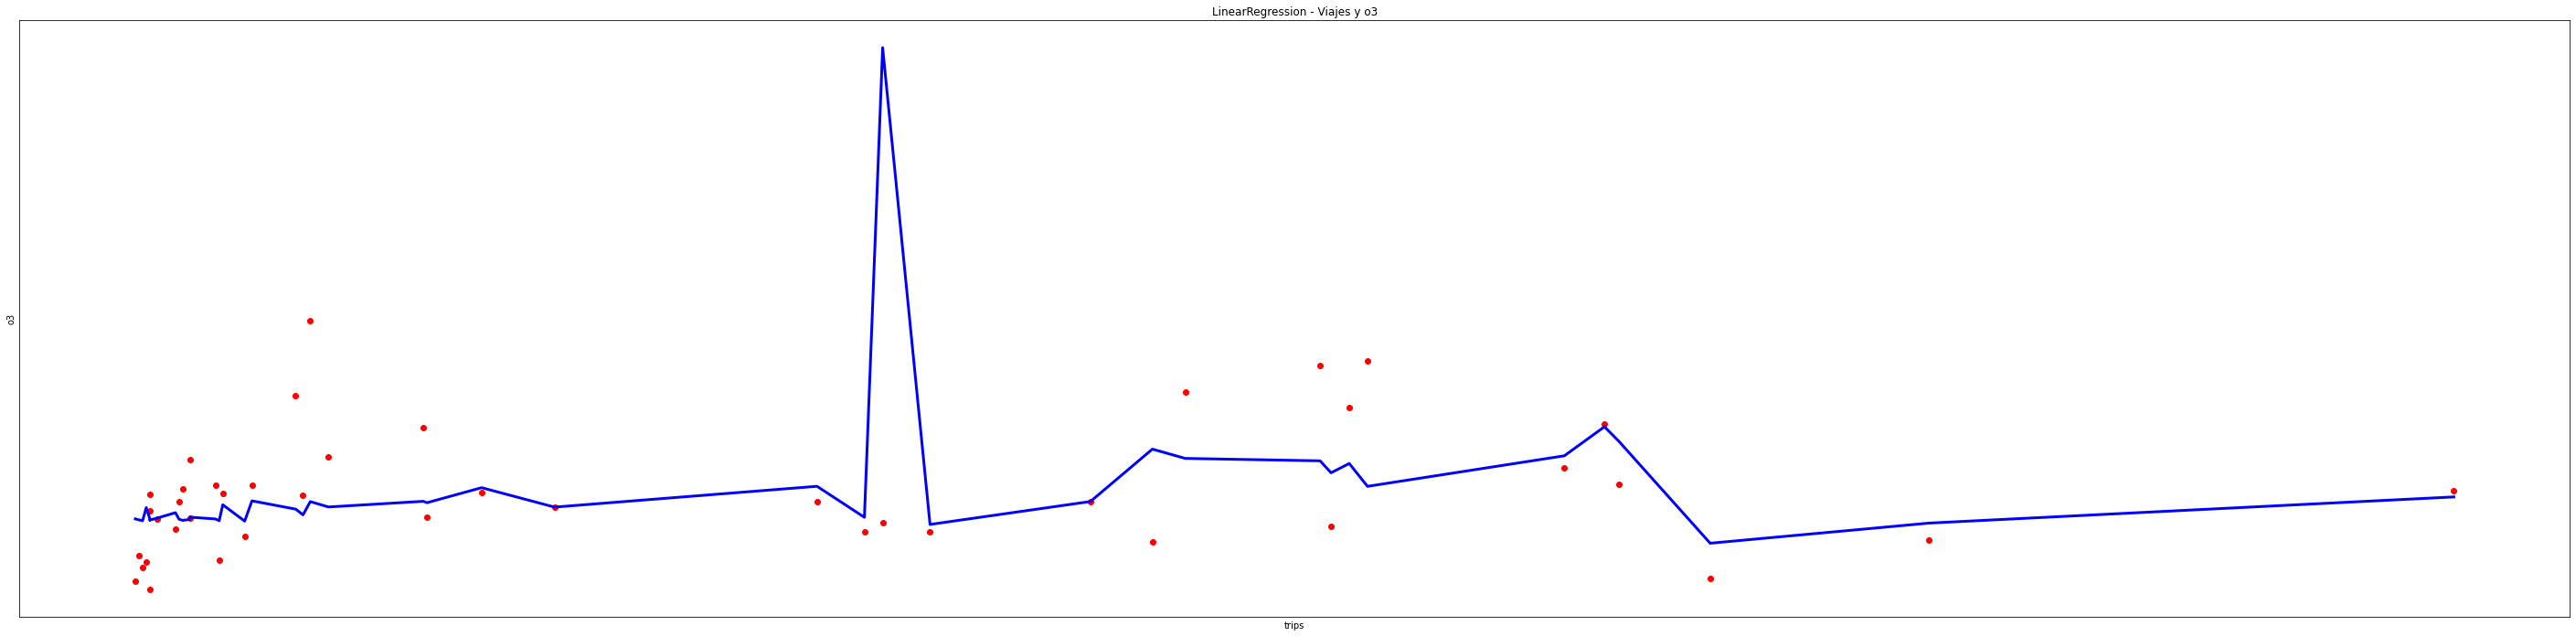

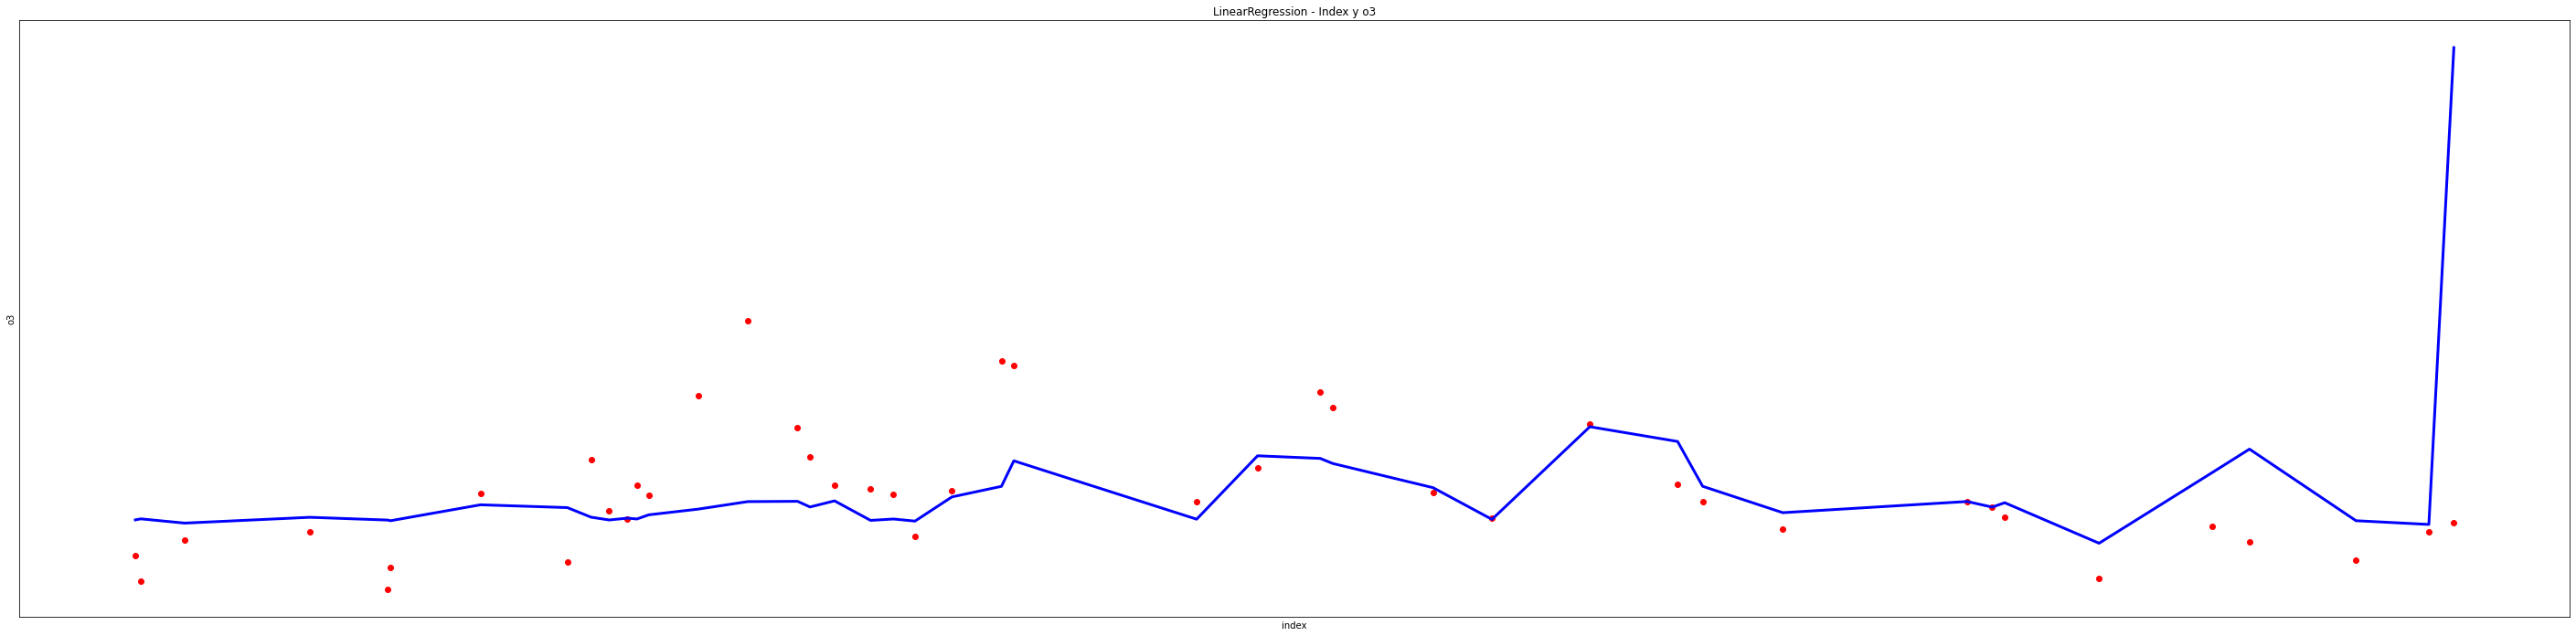

----------------------------------------------------DecisionTreeRegressor----------------------------------------------------
Mean squared error: 0.00020
Coefficient of determination: -0.15566


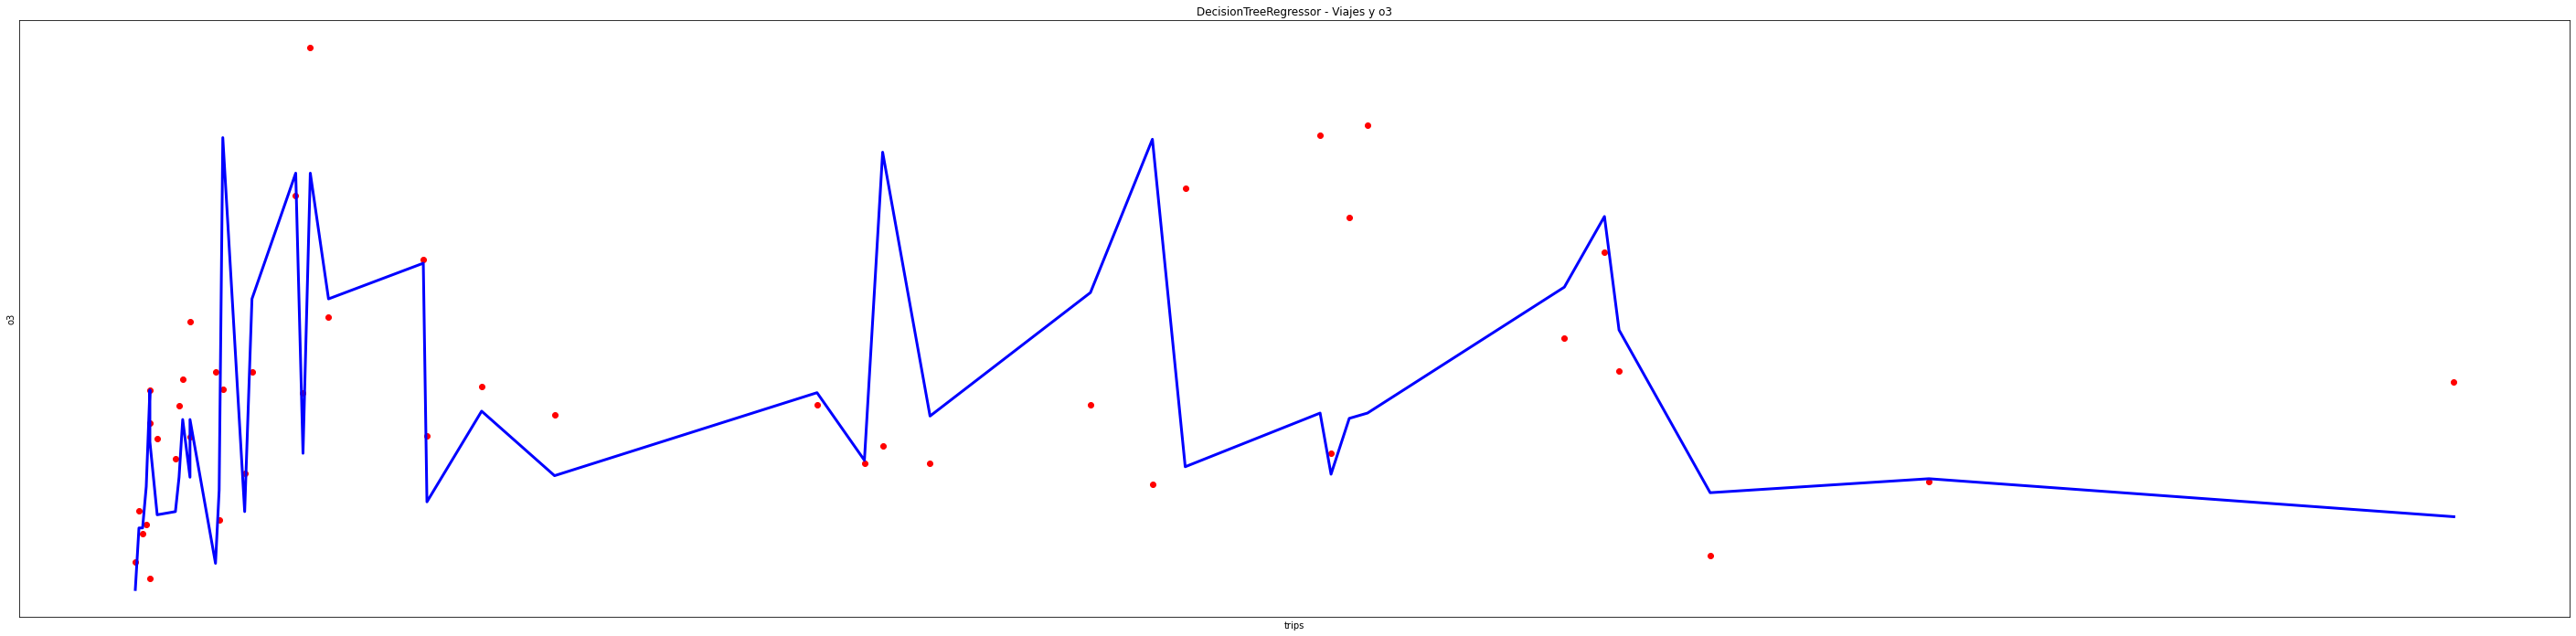

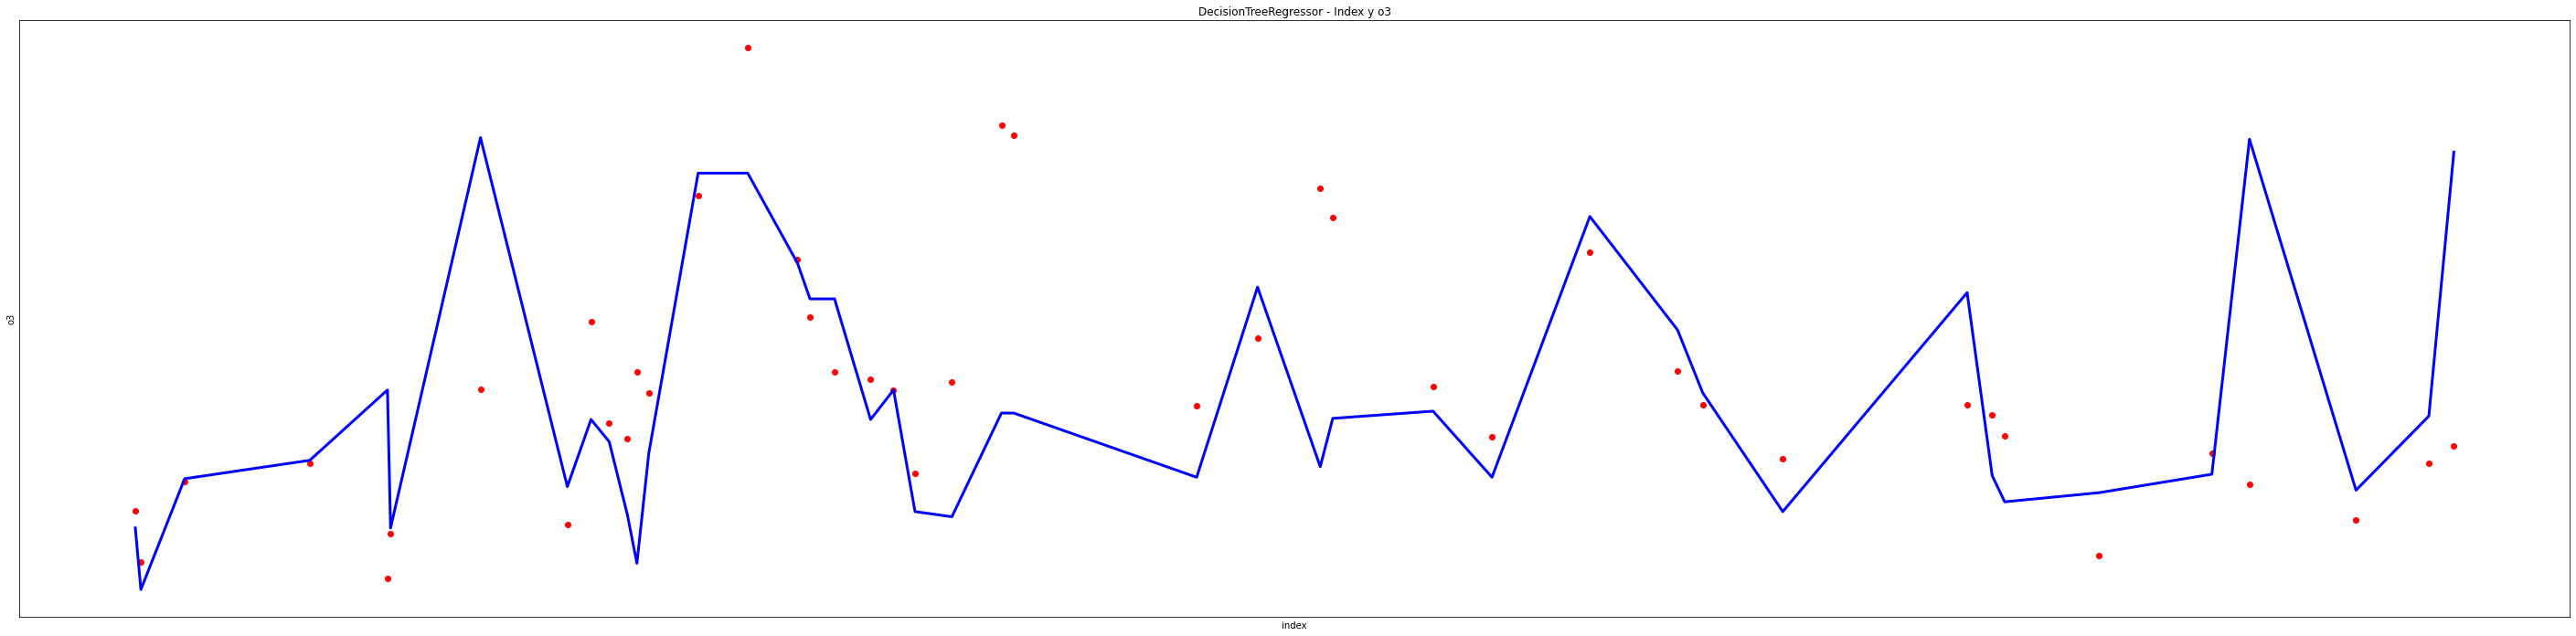

----------------------------------------------------MLPRegressor----------------------------------------------------
Mean squared error: 674970.80098
Coefficient of determination: -3937706587.61635


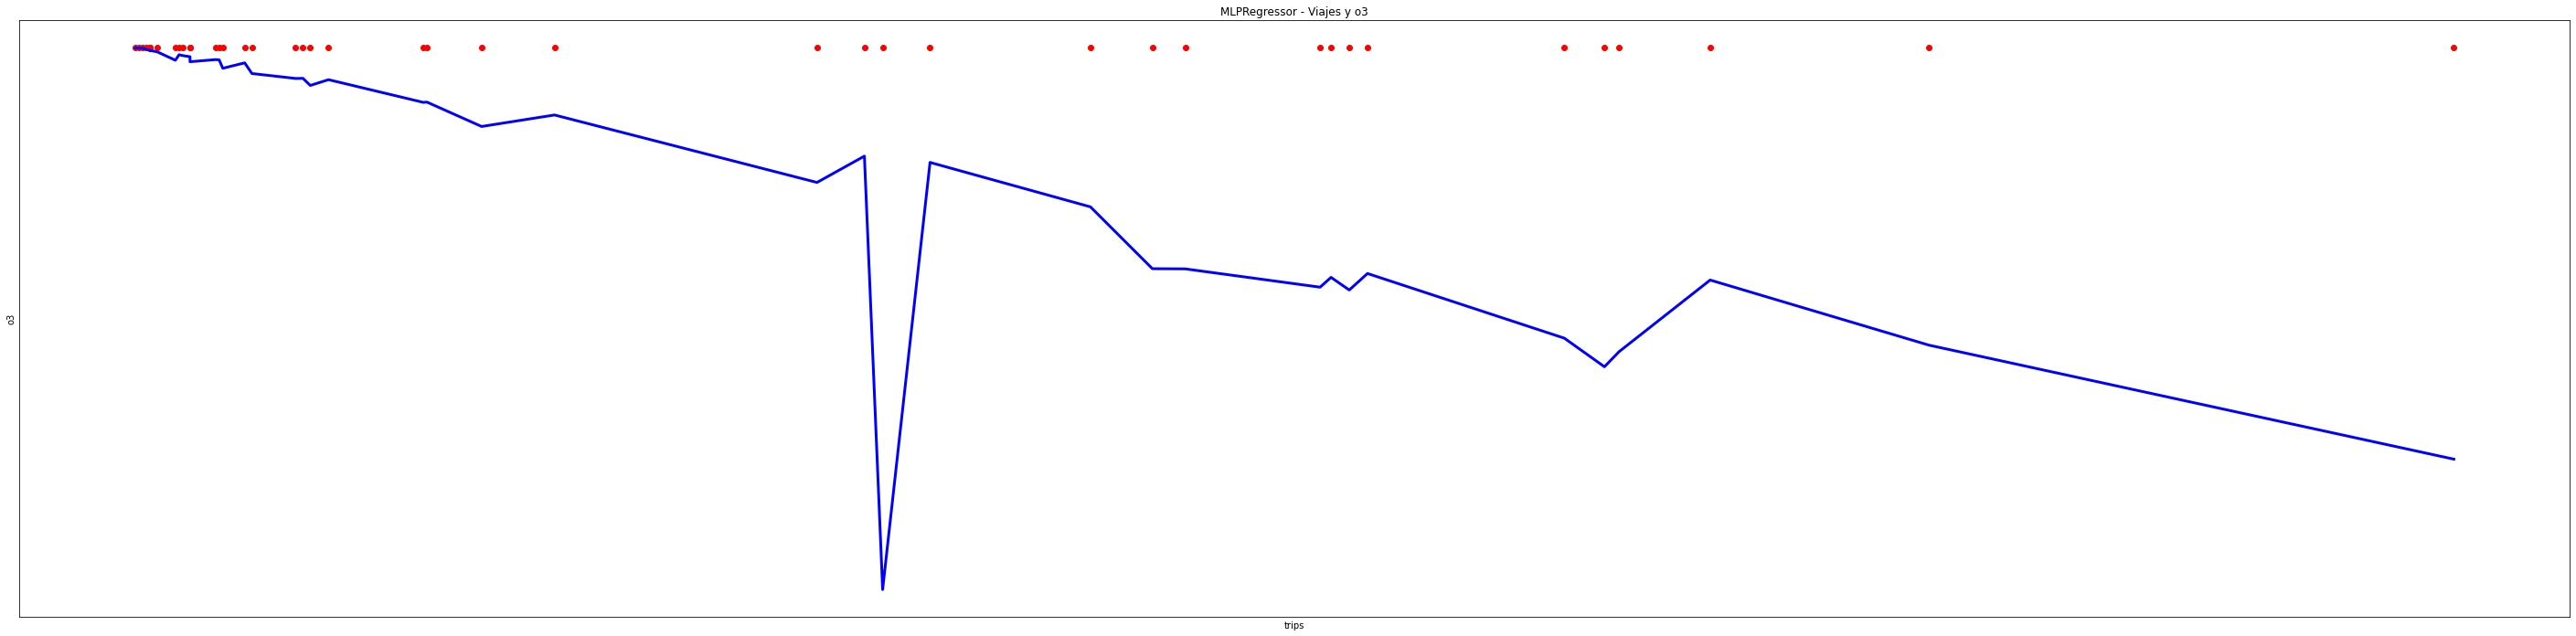

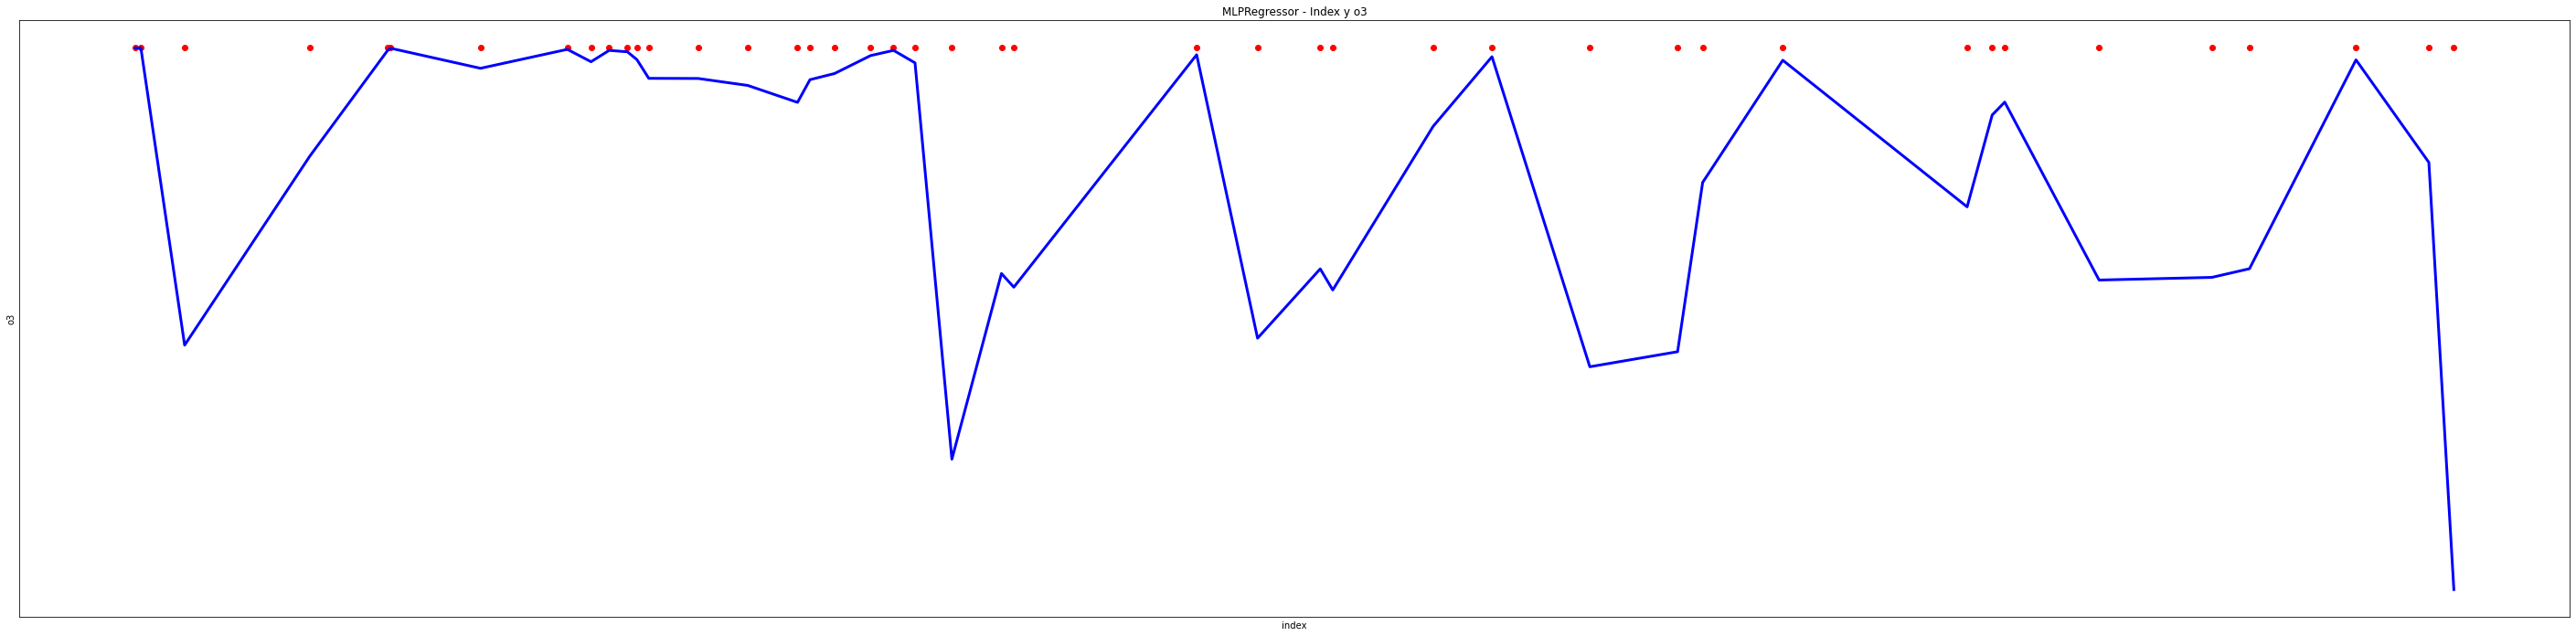

In [ ]:
train3164, test3164, = train_test_split(data_3164, test_size=0.2)

models3164 = []
models3164.append(('LinearRegression', linear_model.LinearRegression()))
models3164.append(('DecisionTreeRegressor', DecisionTreeRegressor(random_state=0)))
models3164.append(('MLPRegressor', MLPRegressor(random_state=1, max_iter=500)))

for name, model in models3164:
    test3164.sort_values(by='trips', ascending=True, inplace=True)
    model.fit(train3164.drop('o3', axis=1), train3164['o3'])
    y_pred = model.predict(test3164.drop('o3', axis=1))

    print(f'----------------------------------------------------{name}----------------------------------------------------')
    if(name == 'LinearRegression'):
      print('Coefficients: \n', model.coef_)
    print('Mean squared error: %.5f'
          % mean_squared_error(test3164['o3'], y_pred))
    print('Coefficient of determination: %.5f'
          % r2_score(test3164['o3'], y_pred))
    plt.scatter(test3164['trips'], test3164['o3'],  color='red')
    plt.plot(test3164['trips'], y_pred , color='blue', linewidth=3)

    plt.xticks(())
    plt.yticks(())
    plt.xlabel('trips')
    plt.ylabel('o3')
    plt.title(name + ' - Viajes y o3')
    plt.rcParams["figure.figsize"] = (50,12)
    plt.show()

    test3164 = test3164.sort_index(axis = 0) 
    y_pred = model.predict(test3164.drop('o3', axis=1))
    # Plot outputs
    plt.scatter(test3164.index, test3164['o3'],  color='red')
    plt.plot(test3164.index, y_pred , color='blue', linewidth=3)

    plt.xticks(())
    plt.yticks(())
    plt.xlabel('index')
    plt.ylabel('o3')
    plt.title(name + ' - Index y o3')
    plt.rcParams["figure.figsize"] = (50,12)
    plt.show()

## Estacion 3140

### Preparacion

In [ ]:
#Experiment with station 3140
data_3140 = data.query('startstationid == 3140')
data_3140 = data_3140[['hour', 'trips', 'tripdistance', 'tripduration', 'o3']]
data_3140.head()

hour  trips  tripdistance  tripduration        o3
4       0      8       16.5086          7130  0.017625
153     1      6       21.2786          5888  0.019000
284     2      1        1.2843           376  0.011000
393     3      2        4.1826           862  0.016500
471     4      7        9.2633          7800  0.022143

In [ ]:
data_3140.shape

(213, 5)

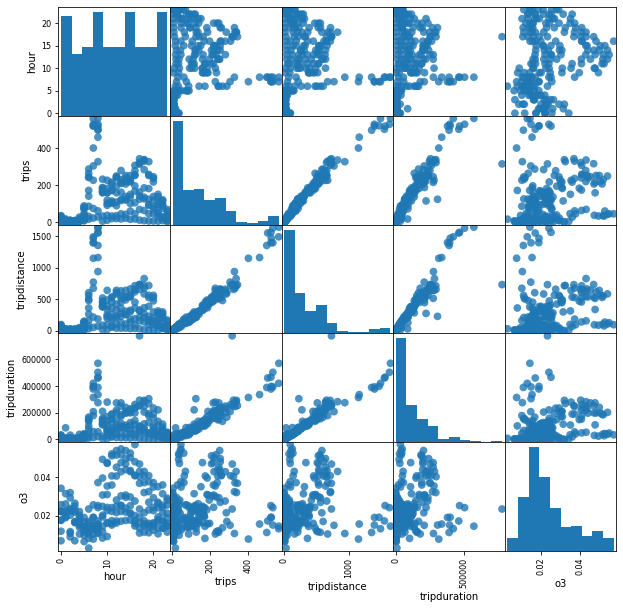

In [ ]:
pd.plotting.scatter_matrix(data_3140, figsize=(10,10), marker = 'o', hist_kwds = {'bins': 10}, s = 60, alpha = 0.8)
plt.show()

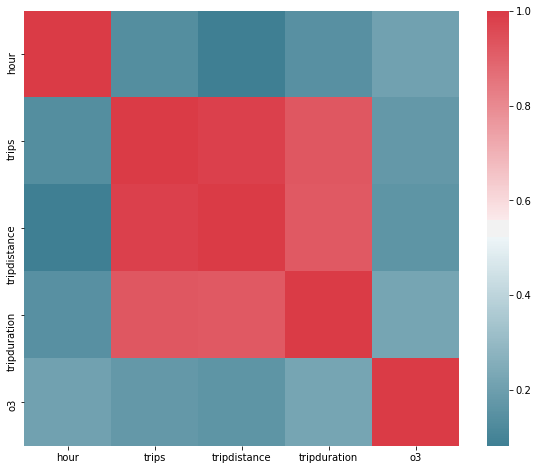

In [ ]:
f, ax = plt.subplots(figsize=(10, 8))
corr = data_3140.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [ ]:
#data_3131.query('tripduration < 18000').tripduration.hist()
print(data_3140.query('tripduration < 18000').shape)
print(data_3140.shape)
#data_3131 = data_3131.query('tripduration < 18000')

(62, 5)
(213, 5)


###Experimentación

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


----------------------------------------------------LinearRegression----------------------------------------------------
Coefficients: 
 [ 2.54796678e-04  1.26435863e-05 -1.19768365e-05  3.87082849e-08]
Mean squared error: 0.00011
Coefficient of determination: 0.10082


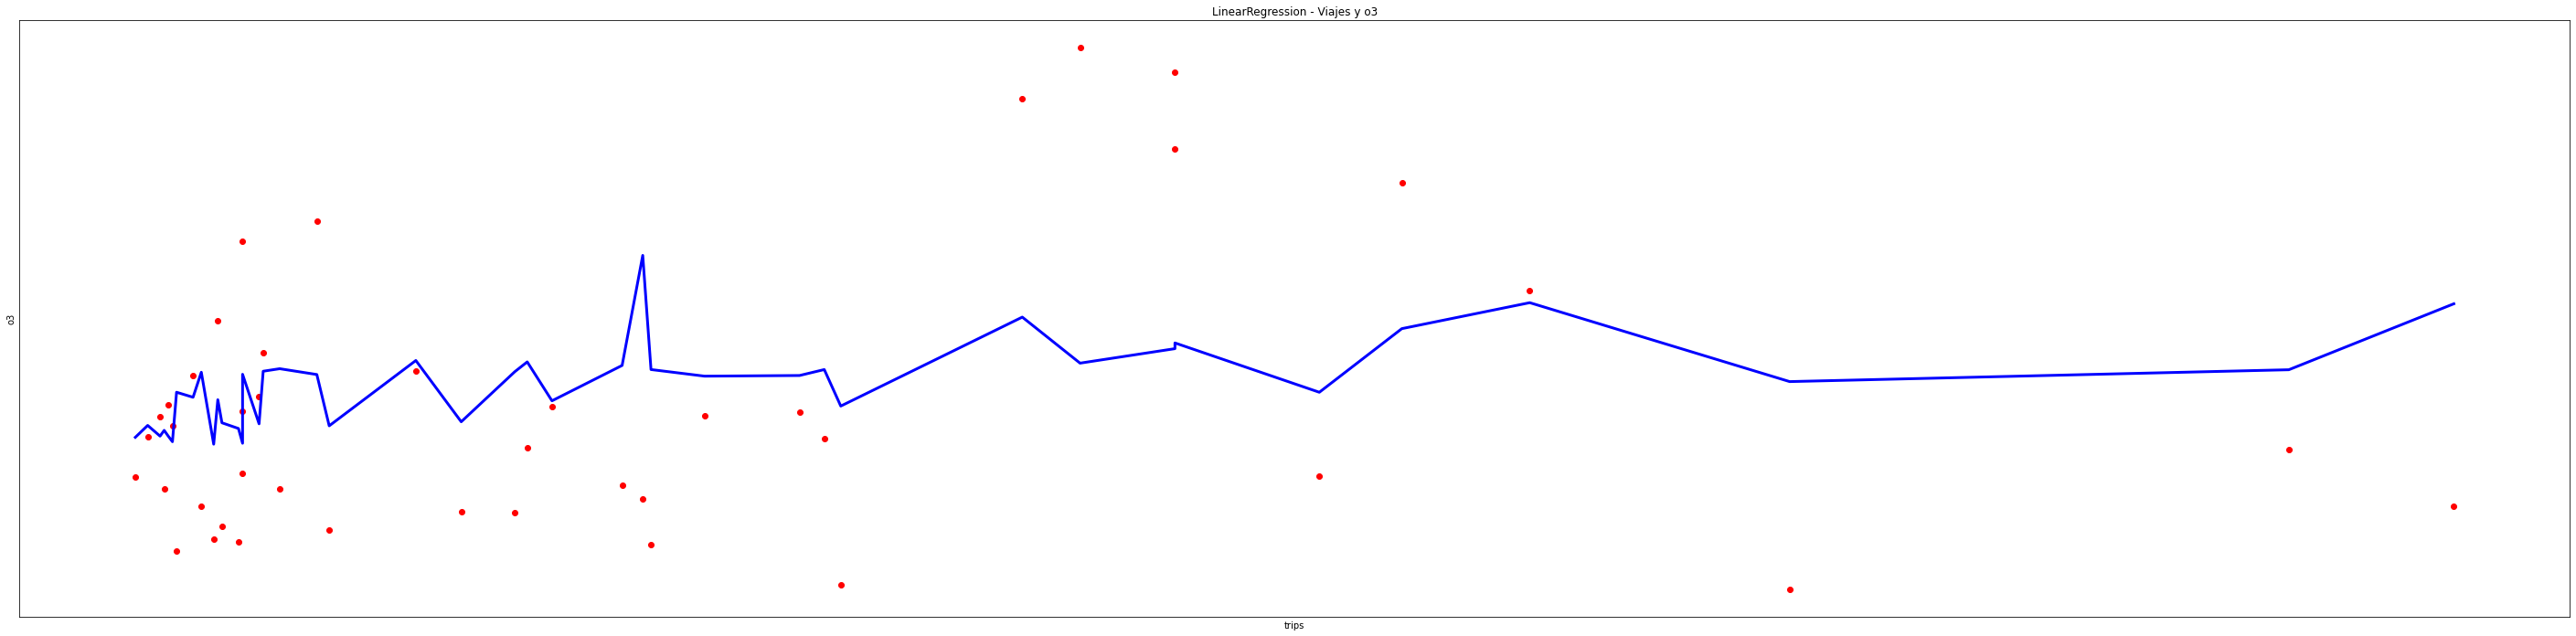

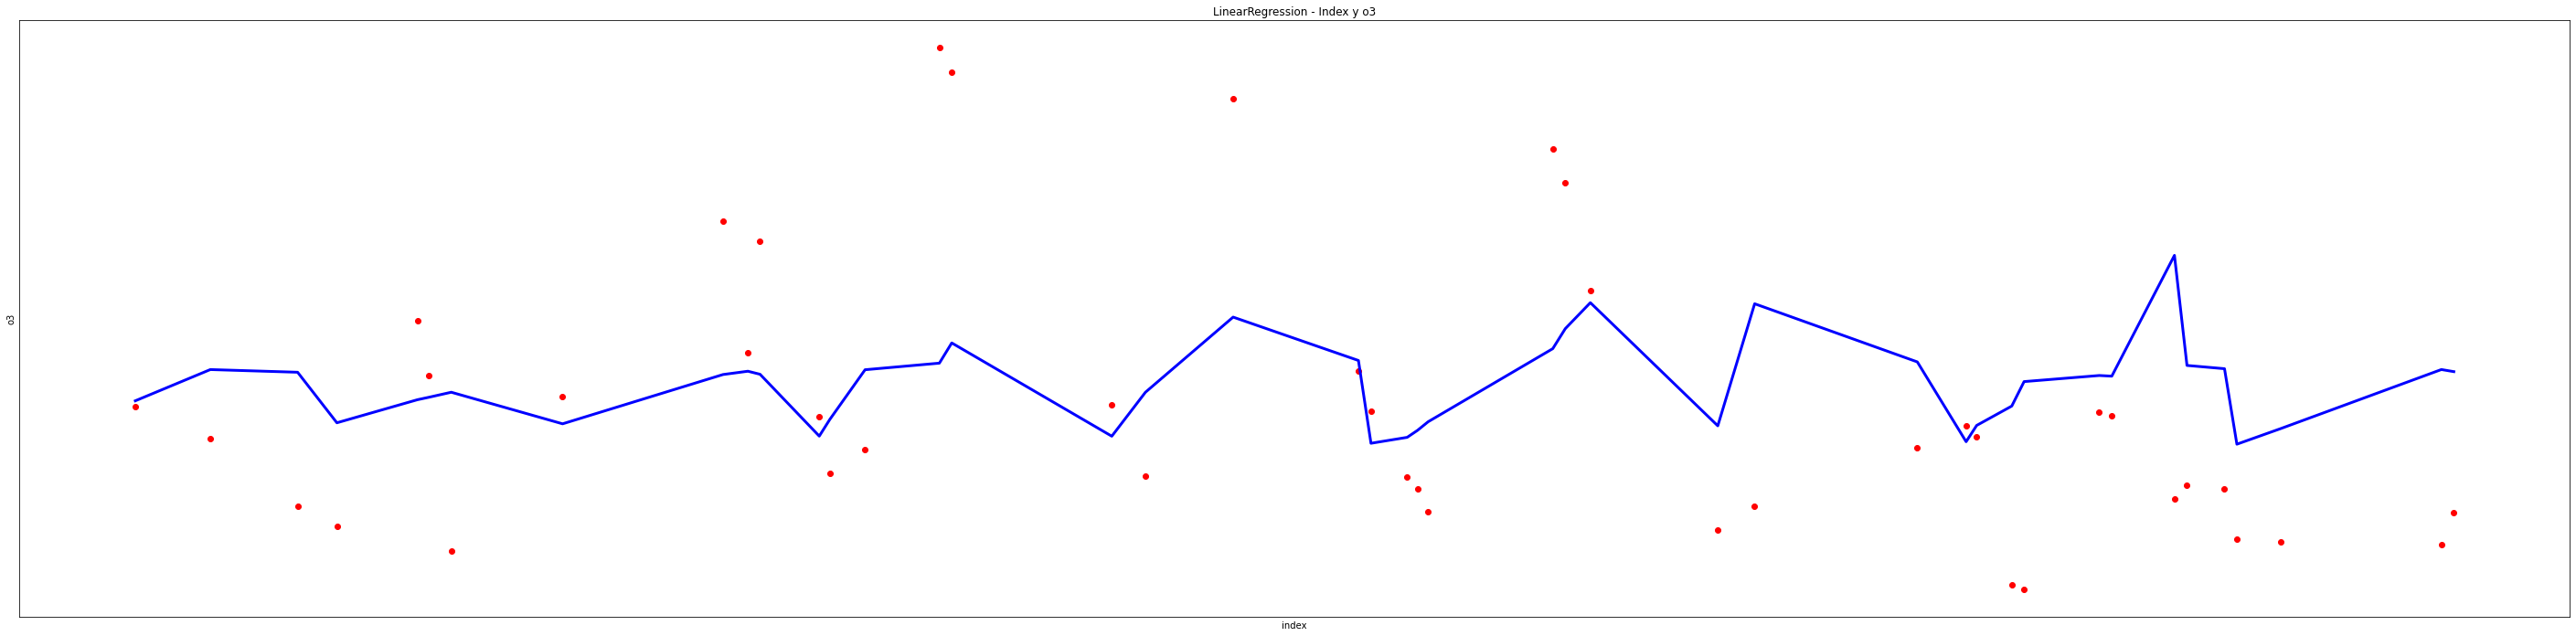

----------------------------------------------------DecisionTreeRegressor----------------------------------------------------
Mean squared error: 0.00007
Coefficient of determination: 0.43433


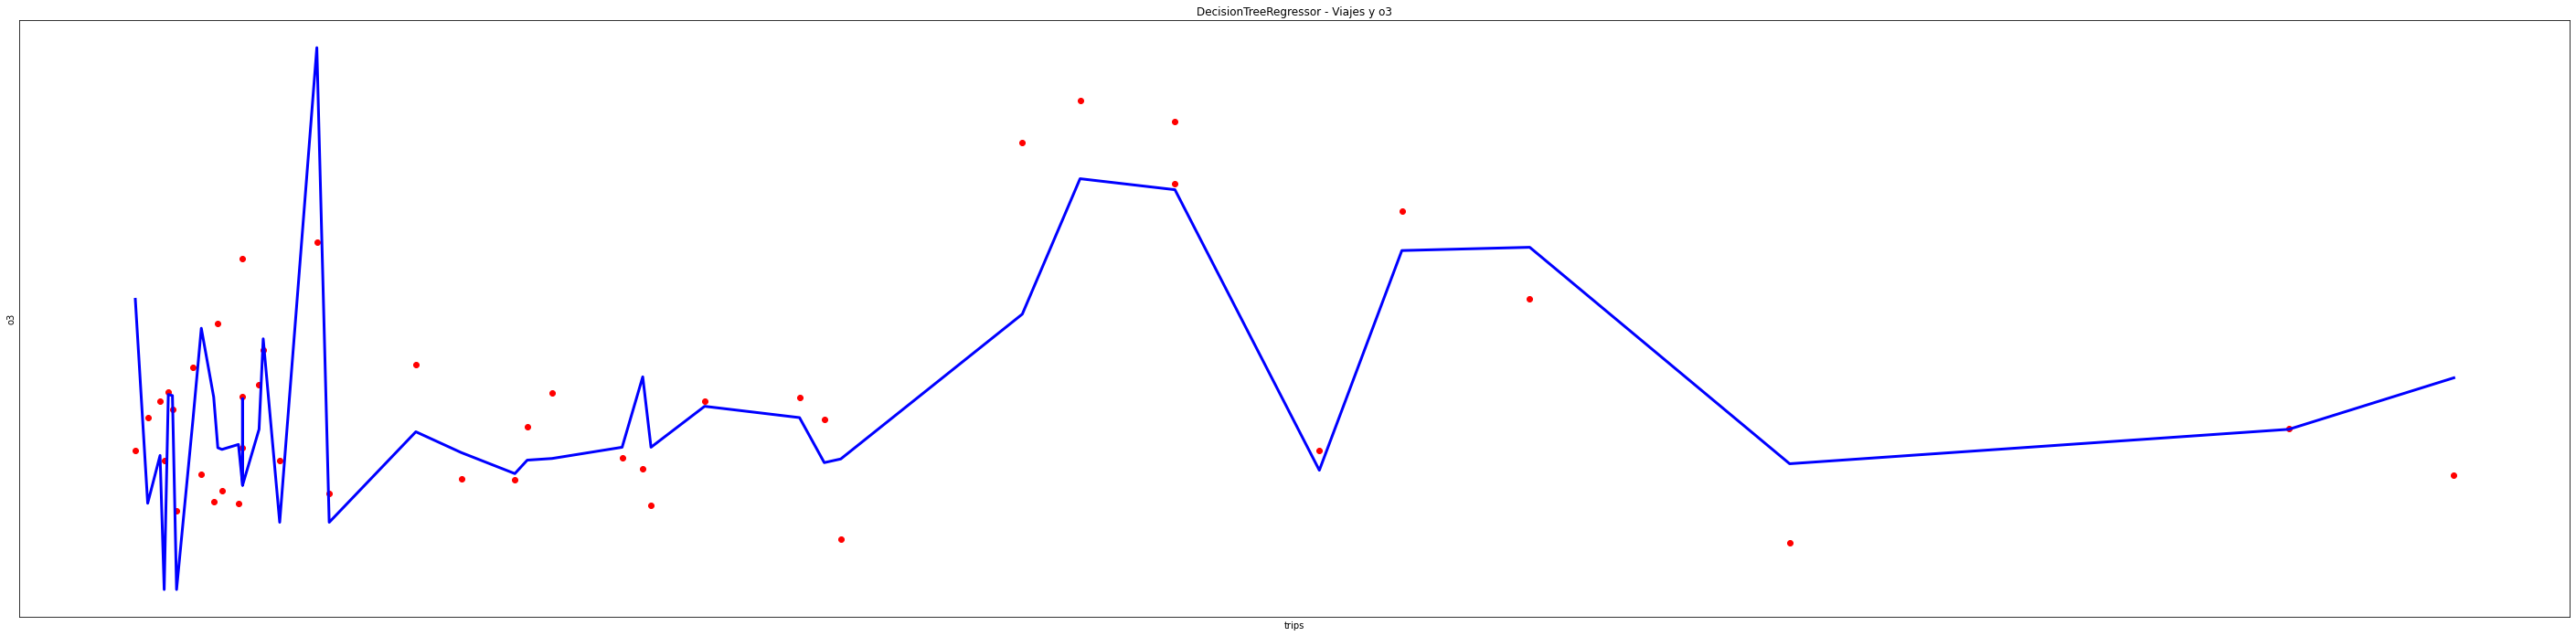

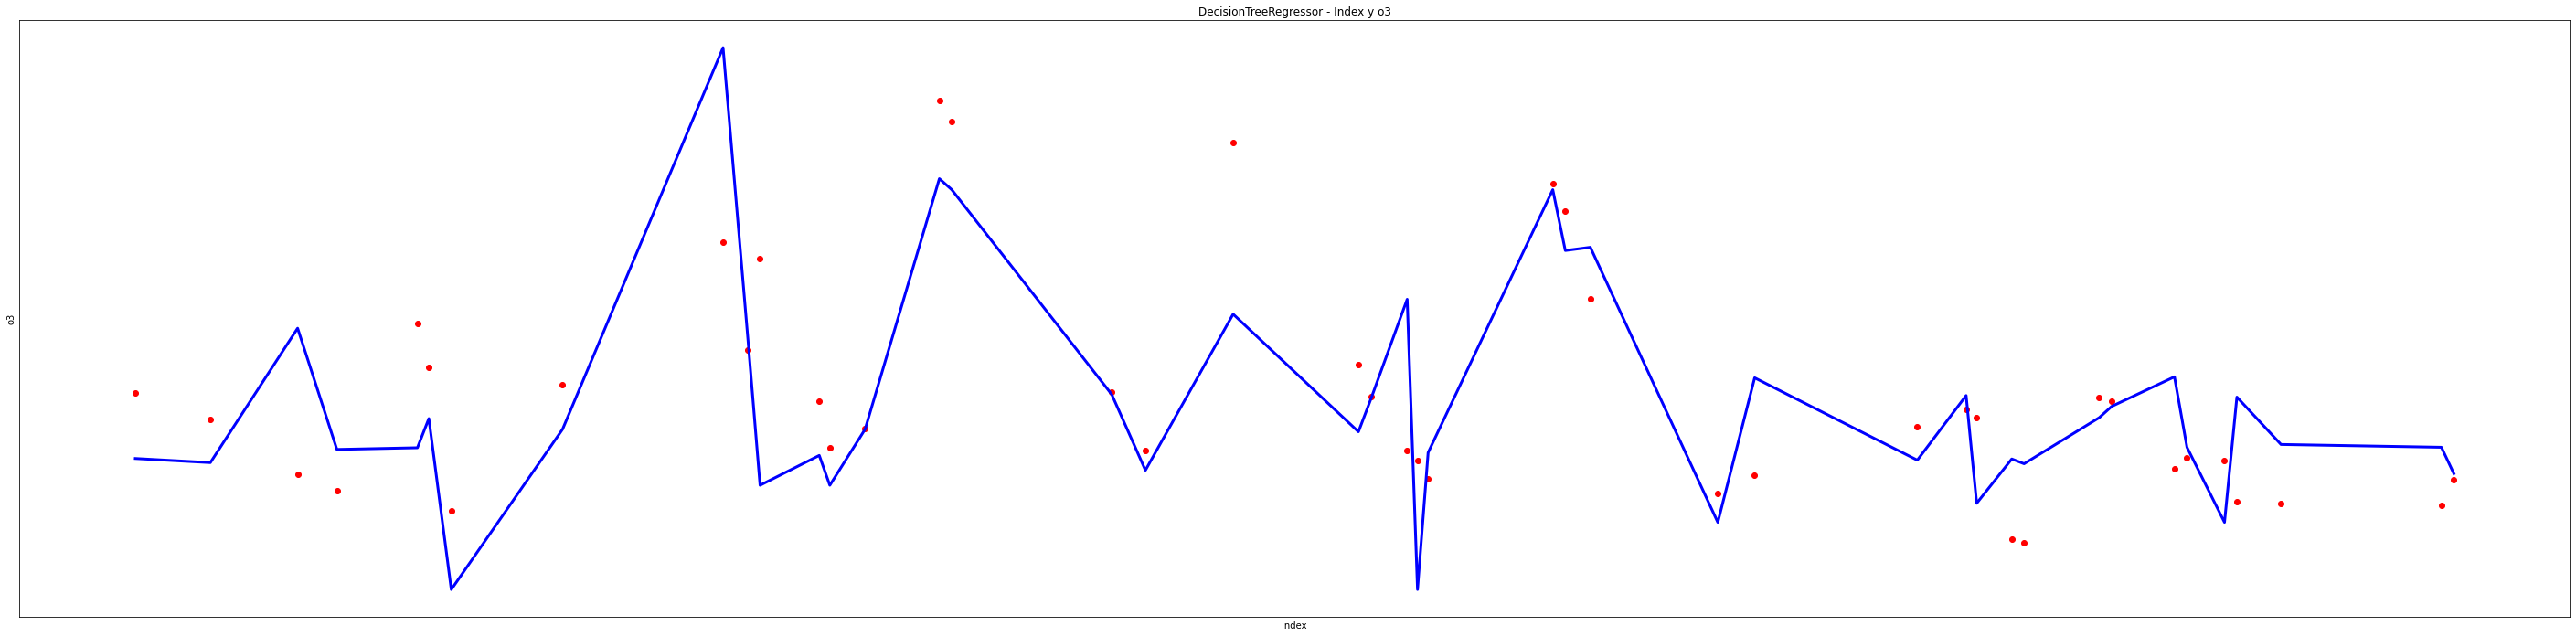

----------------------------------------------------MLPRegressor----------------------------------------------------
Mean squared error: 356049.85252
Coefficient of determination: -2924365034.22867


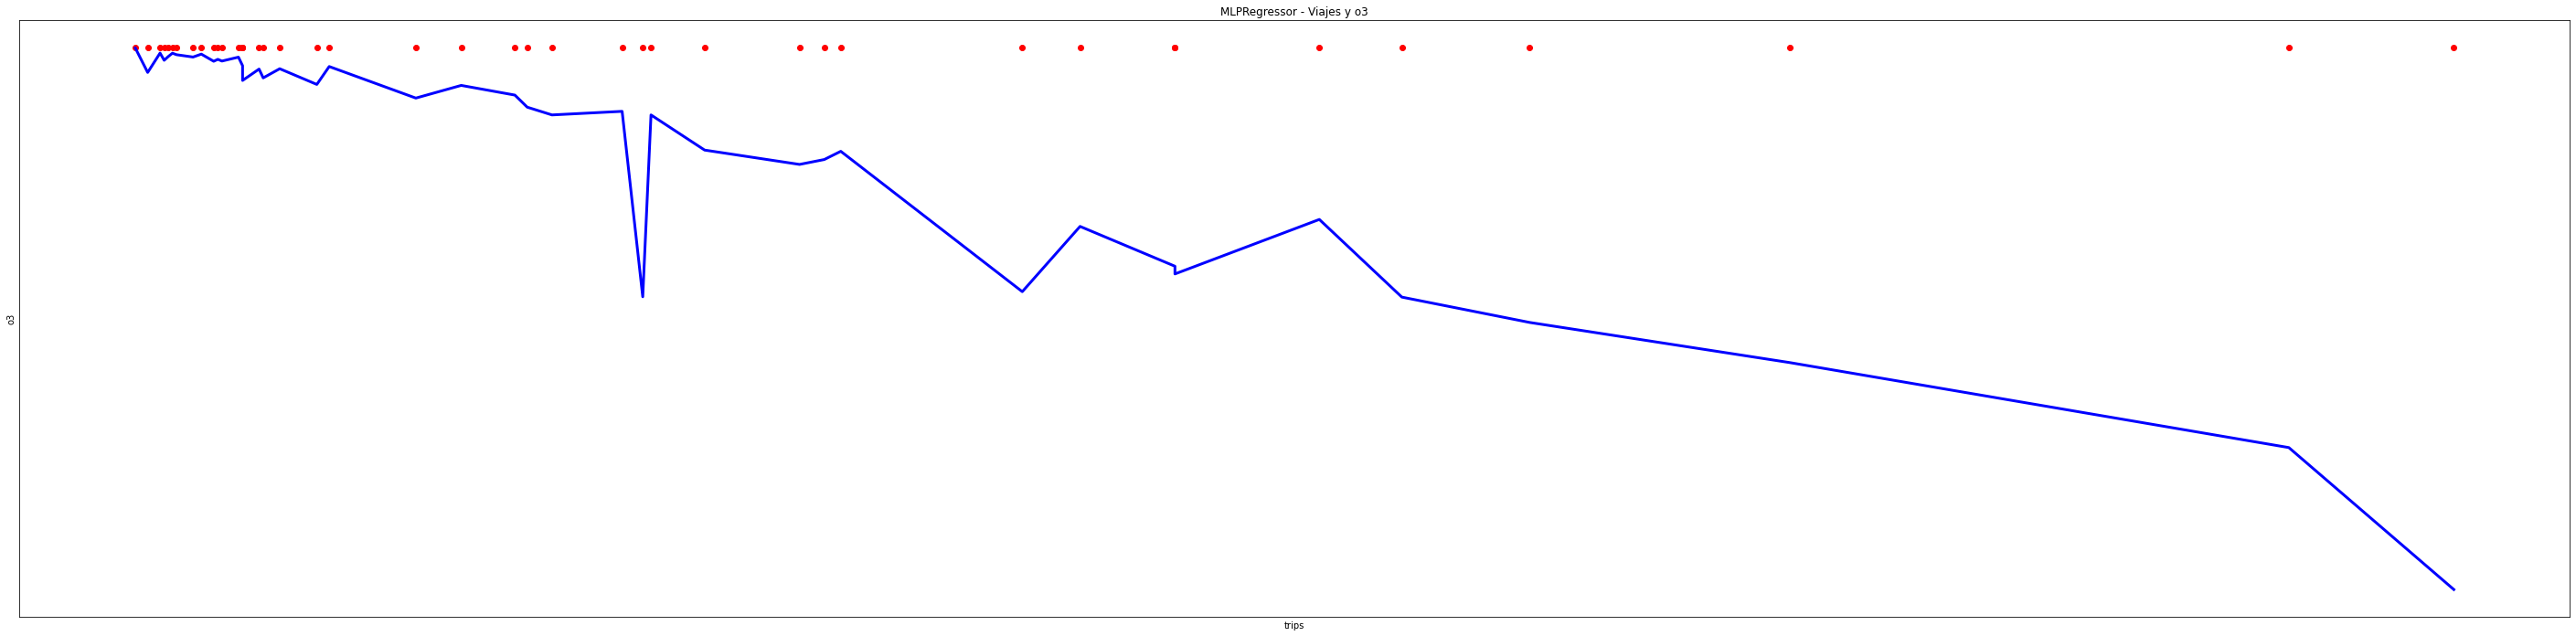

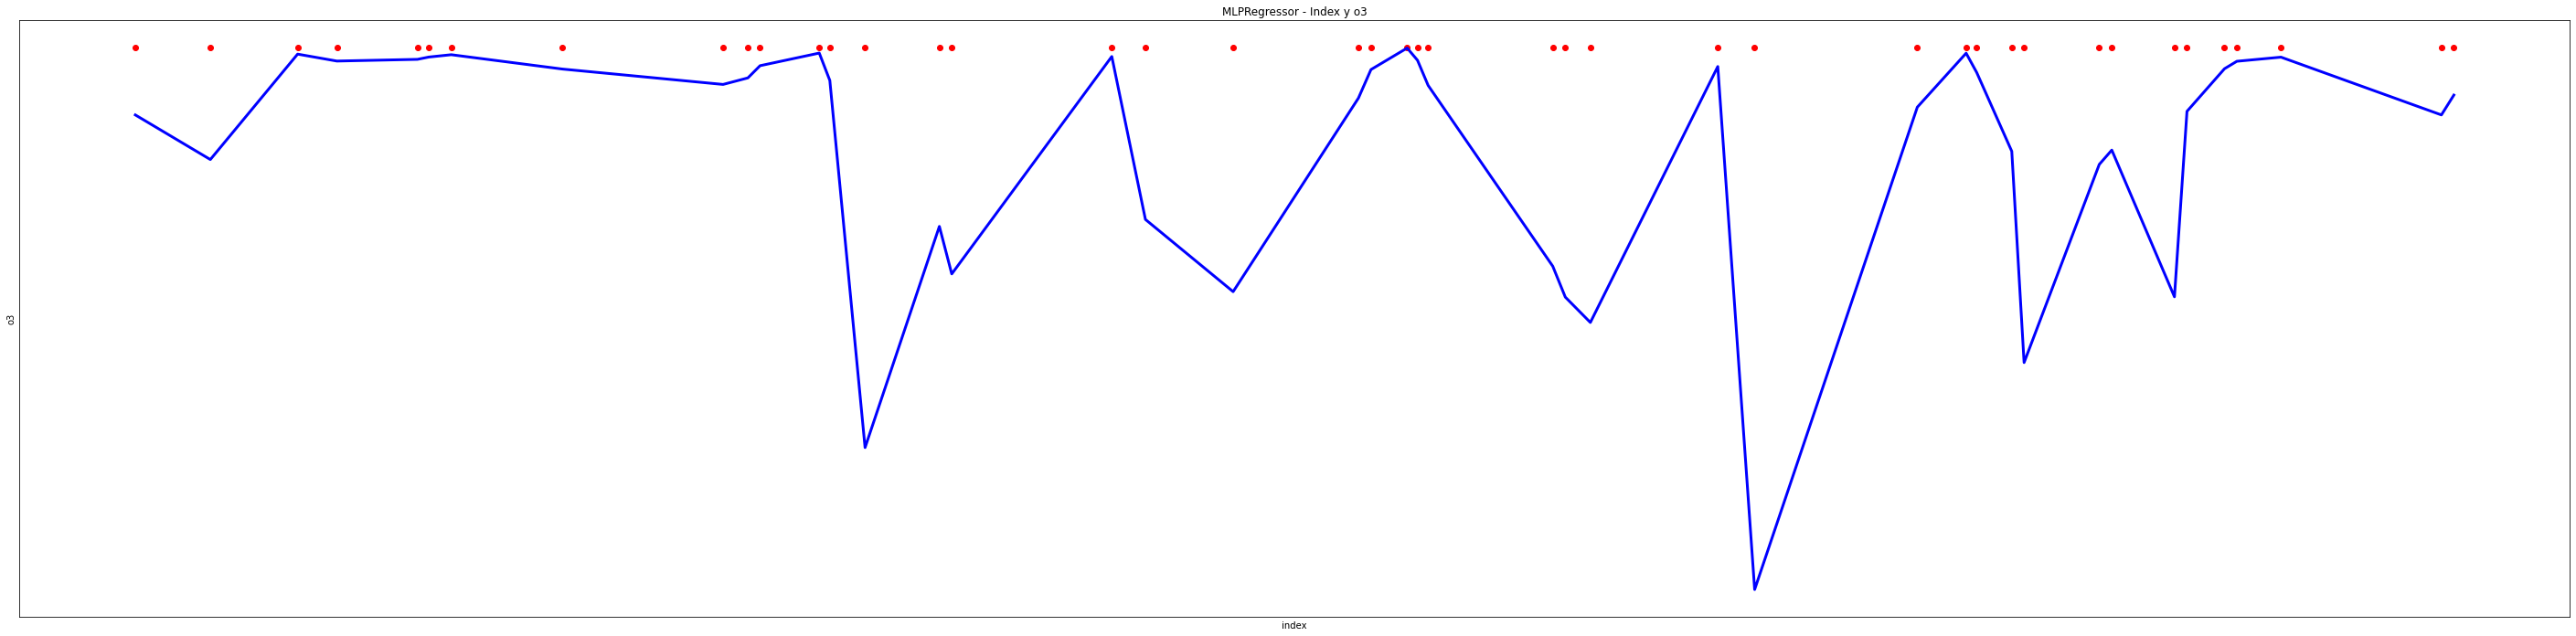

In [ ]:
train3140, test3140, = train_test_split(data_3140, test_size=0.2)

models3140 = []
models3140.append(('LinearRegression', linear_model.LinearRegression()))
models3140.append(('DecisionTreeRegressor', DecisionTreeRegressor(random_state=0)))
models3140.append(('MLPRegressor', MLPRegressor(random_state=1, max_iter=500)))

for name, model in models3140:
    test3140.sort_values(by='trips', ascending=True, inplace=True)
    model.fit(train3140.drop('o3', axis=1), train3140['o3'])
    y_pred = model.predict(test3140.drop('o3', axis=1))

    print(f'----------------------------------------------------{name}----------------------------------------------------')
    if(name == 'LinearRegression'):
      print('Coefficients: \n', model.coef_)
    print('Mean squared error: %.5f'
          % mean_squared_error(test3140['o3'], y_pred))
    print('Coefficient of determination: %.5f'
          % r2_score(test3140['o3'], y_pred))
    plt.scatter(test3140['trips'], test3140['o3'],  color='red')
    plt.plot(test3140['trips'], y_pred , color='blue', linewidth=3)

    plt.xticks(())
    plt.yticks(())
    plt.xlabel('trips')
    plt.ylabel('o3')
    plt.title(name + ' - Viajes y o3')
    plt.rcParams["figure.figsize"] = (50,12)
    plt.show()

    test3140 = test3140.sort_index(axis = 0) 
    y_pred = model.predict(test3140.drop('o3', axis=1))
    # Plot outputs
    plt.scatter(test3140.index, test3140['o3'],  color='red')
    plt.plot(test3140.index, y_pred , color='blue', linewidth=3)

    plt.xticks(())
    plt.yticks(())
    plt.xlabel('index')
    plt.ylabel('o3')
    plt.title(name + ' - Index y o3')
    plt.rcParams["figure.figsize"] = (50,12)
    plt.show()